# Data Analysis Project: Bike Sharing Dataset
- Name: Nisa Safitri Ulfiyani
- Email: nisasafitri78@gmail.com
- Id Dicoding:nisasafitri


###**Introduction**


**Overview**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic,
environmental and health issues.


Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

**Dataset**

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

## Define Business Questions



- What is the distribution from Monday to Sunday?
- What is the highest and lowest rental amount each month?








## Import all required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Load the Data**

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/nisasafitri/Bike-sharing-analysis/main/hour.csv")
hour_df.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

**Dataset Dictionary**

- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

:After looking at the top five rows of the dataframe, there are few things that need to be adjusted to make it easier to understand, such as:


1. Rename the columns
  * yr becomes year
  * min becomes month
  * hr becomes hour
  * cnt becomes count

2. Rename the value
  * season: replaced with the names of the seasons
  * year: replaced with 2011 and 2012
  * minth: changed to the names of the months

3. Returns the normalized value to the original value
  * temp = value * 41
  * atemp = value * 50
  * hum = value * 100
  * windspeed = value * 67

In [ ]:
#Rename some columns (yr, hr, cnt)
hour_df.rename(columns={"yr":"year", "mnth":"month", "hr":"hour", "cnt":"count"}, inplace=True)


### Assessing Data

In [ ]:
#Checking type of data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


The data type of dteday must be datetime

In [ ]:
#Checking The Missing Value

hour_df.isna().sum()

instant       0
dteday        0
season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There is no missing value

In [ ]:
#Checking Duplicate Data

print("number of duplications: ", hour_df.duplicated().sum())



number of duplications:  0


There is no duplicate data

In [ ]:
#Checking Statistical Summary

hour_df.describe(include="all")

instant      dteday        season          year         month  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2011-01-01           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                hour       holiday       weekday    workingday    weathersit  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       11.546752      0.028770      3.003683      0.682721      1.425283   
std         6.914405      0.167165      2.005771      0.465431      0.639357   
min         0.000000      0.000000      0.000000      0.000000      1.000000   
25%         6.000000      0.000000      1.000000      0.000000      1.000000   
50%        12.000000      0.000000      3.000000      1.000000      1.000000   
75%        18.000000      0.000000      5.000000      1.000000      2.000000   
max        23.000000      1.000000      6.000000      1.000000      4.000000   

                temp         atemp           hum     windspeed        casual  \
count   17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.496987      0.475775      0.627229      0.190098     35.676218   
std         0.192556      0.171850      0.192930      0.122340     49.305030   
min         0.020000      0.000000      0.000000      0.000000      0.000000   
25%         0.340000      0.333300      0.480000      0.104500      4.000000   
50%         0.500000      0.484800      0.630000      0.194000     17.000000   
75%         0.660000      0.621200      0.780000      0.253700     48.000000   
max         1.000000      1.000000      1.000000      0.850700    367.000000   

          registered         count  
count   17379.000000  17379.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean      153.786869    189.463088  
std       151.357286    181.387599  
min         0.000000      1.000000  
25%        34.000000     40.000000  
50%       115.000000    142.000000  
75%       220.000000    281.000000  
max       886.000000    977.000000

### Cleaning Data

**Fixing data type of dteday (from object to datetime)**

In [ ]:
#Define

hour_df.dteday.info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype 
--------------  ----- 
17379 non-null  object
dtypes: object(1)
memory usage: 135.9+ KB


In [ ]:
#Code
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])



In [ ]:
#Test
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

In [ ]:
#changing 0-6 to the names of the days

hour_df["weekday"] = hour_df["dteday"].dt.day_name()

In [ ]:
#changing 1-12 to the names of the months


hour_df["month"] = hour_df["dteday"].dt.month_name()

In [ ]:
#changing 0 and 1 to 2011 and 2012

hour_df["year"] = hour_df["dteday"].dt.year

In [ ]:
#changing 1-4 to the names of the seasons

def find_season(season):
    season_string = {1:"Winter", 2:"Spring", 3:"Summer", 4:"Fall"}
    return season_string.get(season)

season_list = []

for season in hour_df["season"]:
    season = find_season(season)
    season_list.append(season)

hour_df["season"] = season_list

In [ ]:
#Returns the normalized value to the original value

hour_df["temp"] = hour_df["temp"]*41
hour_df["atemp"] = hour_df["atemp"]*50
hour_df["hum"] = hour_df["hum"]*100
hour_df["windspeed"] = hour_df["windspeed"]*67

In [ ]:
#Check the cleaned data
hour_df.sample(5)

instant     dteday  season  year      month  hour  holiday   weekday  \
7037      7038 2011-10-25    Fall  2011    October    20        0   Tuesday   
11137    11138 2012-04-14  Spring  2012      April     6        0  Saturday   
15207    15208 2012-09-30    Fall  2012  September    20        0    Sunday   
9286      9287 2012-01-27  Winter  2012    January    20        0    Friday   
1188      1189 2011-02-22  Winter  2011   February    13        0   Tuesday   

       workingday  weathersit   temp   atemp   hum  windspeed  casual  \
7037            1           1  18.86  22.725  67.0     7.0015      40   
11137           0           1  13.94  16.665  76.0    11.0014       2   
15207           0           3  20.50  24.240  72.0     8.9981      31   
9286            1           1  13.94  15.150  53.0    23.9994       6   
1188            1           1   9.02  11.365  55.0    11.0014       3   

       registered  count  
7037          208    248  
11137          19     21  
15207         163    194  
9286          153    159  
1188           52     55

In [ ]:
#Check the data type
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   year        17379 non-null  int64         
 4   month       17379 non-null  object        
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

## Exploratory Data Analysis (EDA)

**Univariate Analysis**


In [ ]:
#Create table include float data type only

float_df = hour_df.select_dtypes(include="float")

float_df

temp   atemp   hum  windspeed
0       9.84  14.395  81.0     0.0000
1       9.02  13.635  80.0     0.0000
2       9.02  13.635  80.0     0.0000
3       9.84  14.395  75.0     0.0000
4       9.84  14.395  75.0     0.0000
...      ...     ...   ...        ...
17374  10.66  12.880  60.0    11.0014
17375  10.66  12.880  60.0    11.0014
17376  10.66  12.880  60.0    11.0014
17377  10.66  13.635  56.0     8.9981
17378  10.66  13.635  65.0     8.9981

[17379 rows x 4 columns]

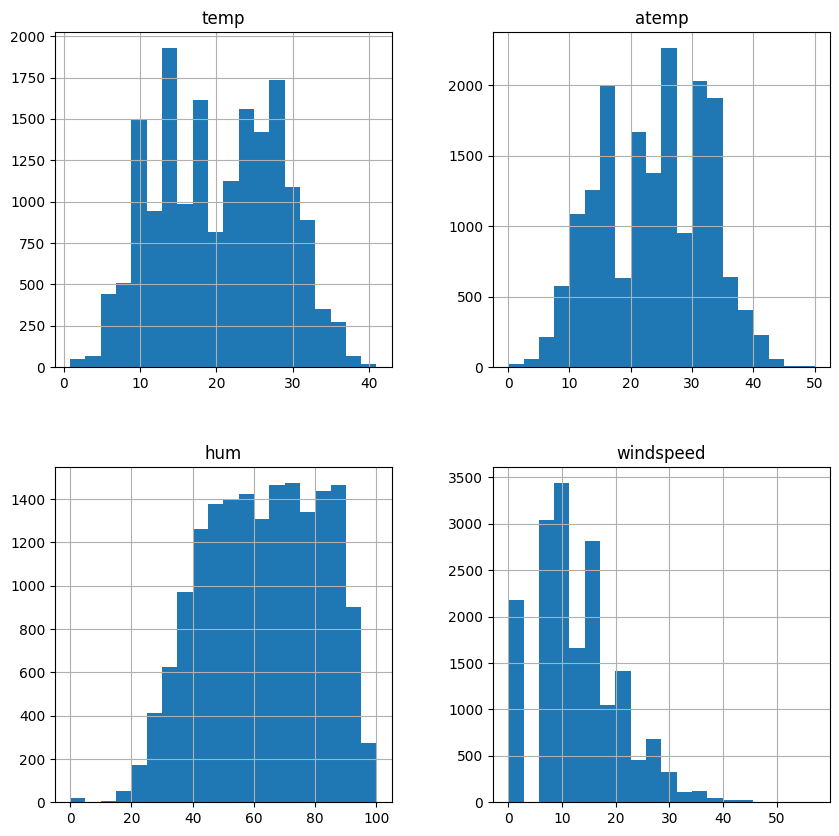

In [ ]:
float_df.hist(bins=20, figsize=(10, 10))
plt.show()

Interpretation:

Temperatures: values ​​reaching a thousand are concentrated from approximately 10 to 30.

Apparent temperature: values reaching a thousand are concentrated from approximately 10 to 35.

Humidity: values reaching a thousand are concentrated from approximately 40 to 90.

Windspeed: values reaching a thousand are concentrated from approximately 0 to 22.

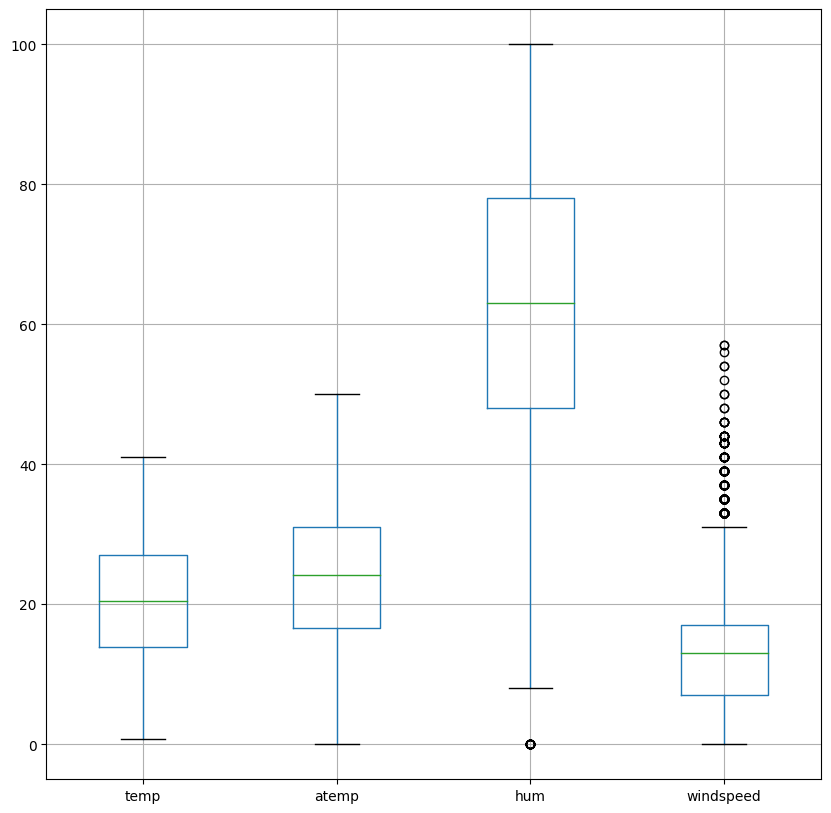

In [ ]:
float_df.boxplot( figsize=(10, 10))
plt.show()

In [ ]:
float_df.describe()

temp         atemp           hum     windspeed
count  17379.000000  17379.000000  17379.000000  17379.000000
mean      20.376474     23.788755     62.722884     12.736540
std        7.894801      8.592511     19.292983      8.196795
min        0.820000      0.000000      0.000000      0.000000
25%       13.940000     16.665000     48.000000      7.001500
50%       20.500000     24.240000     63.000000     12.998000
75%       27.060000     31.060000     78.000000     16.997900
max       41.000000     50.000000    100.000000     56.996900

Interpretation

Both Iris humidity and windspeed have outliers, but windspeed has more outliers.

<Axes: >

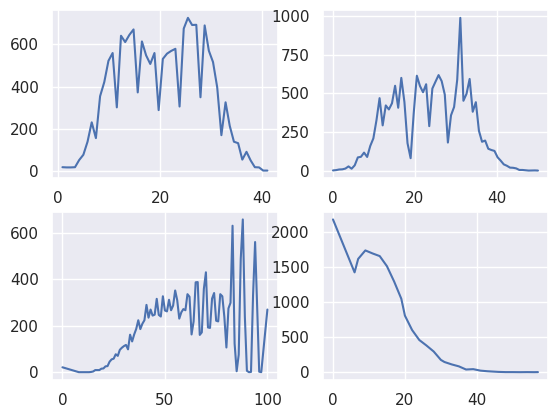

In [ ]:
#set seaborn plotting
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create line plot in each subplot

float_df.temp.value_counts().sort_index().plot.line(ax=axes[0,0])
float_df.atemp.value_counts().sort_index().plot.line(ax=axes[0,1])
float_df.hum.value_counts().sort_index().plot.line(ax=axes[1,0])
float_df.windspeed.value_counts().sort_index().plot.line(ax=axes[1,1])

**Bivariate Analysis**


**Compare number of rental in 2011 and 2012**




In [ ]:
#Create table Number of rentals in 2011 and 2012
yearly_number_df = hour_df.groupby(by="year").agg({
    "count": "sum"
})
yearly_number_df.sort_values("count", ascending=False, inplace=True)


In [ ]:
#Reset index
yearly_number_df = yearly_number_df.reset_index()
yearly_number_df

year    count
0  2012  2049576
1  2011  1243103

Interpretation:
The number of rentals in 2012 was more than in 2011. From 2011 to 2012 there was an increase of 806.473 (around 64 %)

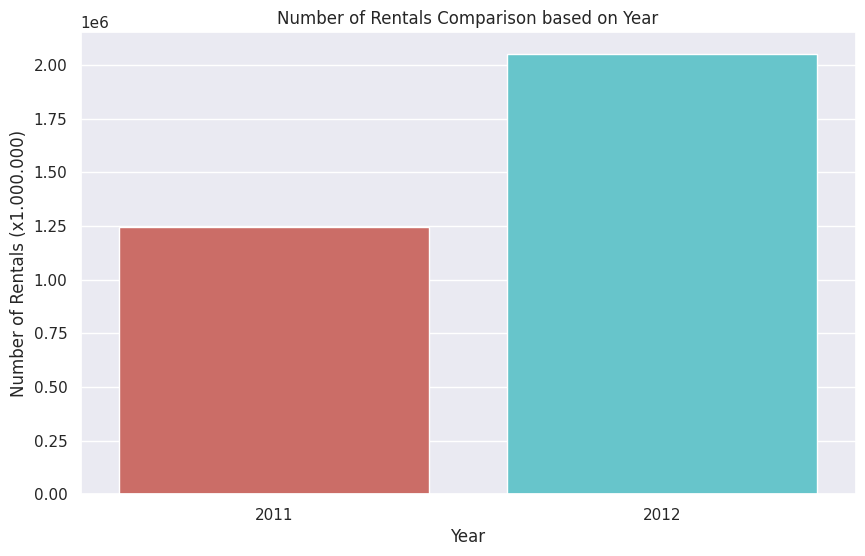

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="year", y="count", data=yearly_number_df, color = "blue", palette = "hls")

plt.xlabel("Year")
plt.ylabel("Number of Rentals (x1.000.000)")
plt.title("Number of Rentals Comparison based on Year")

plt.show()

**Compare the number of rentals in each season**

In [ ]:
#Create table Number of rentals in each season
season_df = hour_df.groupby(by="season").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()

season_df

season    count
0  Summer  1061129
1  Spring   918589
2    Fall   841613
3  Winter   471348

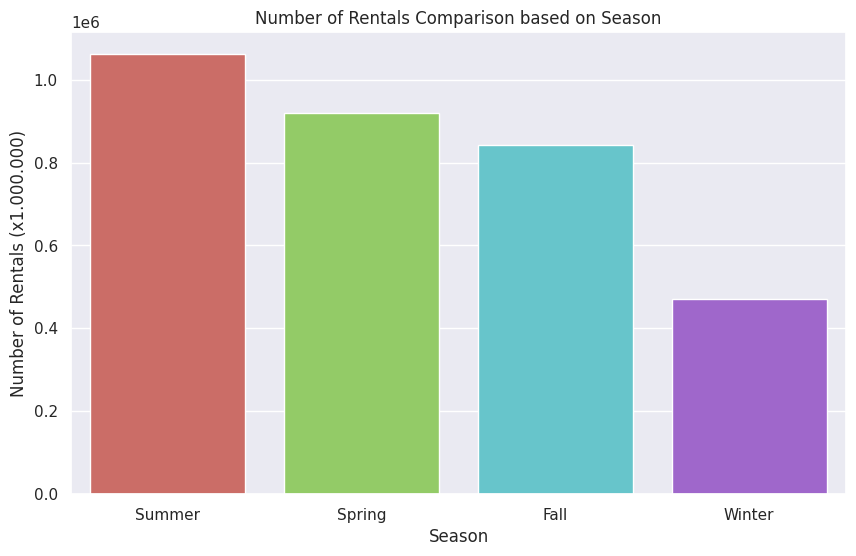

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="count", data=season_df, color = "blue", palette = "hls")

plt.xlabel("Season")
plt.ylabel("Number of Rentals (x1.000.000)")
plt.title("Number of Rentals Comparison based on Season")

plt.show()

Interpretation: The number of rentals in summer was more than in other seasons.

**Compare the number of rental in 24 hour**

In [ ]:
#Create Number of Rentals in 24 Hours
hourly_rental_df = hour_df.groupby(by="hour").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()

hourly_rental_df

hour   count
0     17  336860
1     18  309772
2      8  261001
3     16  227748
4     19  226789
5     13  184919
6     12  184414
7     15  183149
8     14  175652
9     20  164550
10     9  159438
11     7  154171
12    11  151320
13    10  126257
14    21  125445
15    22   95612
16    23   63941
17     6   55132
18     0   39130
19     1   24164
20     2   16352
21     5   14261
22     3    8174
23     4    4428

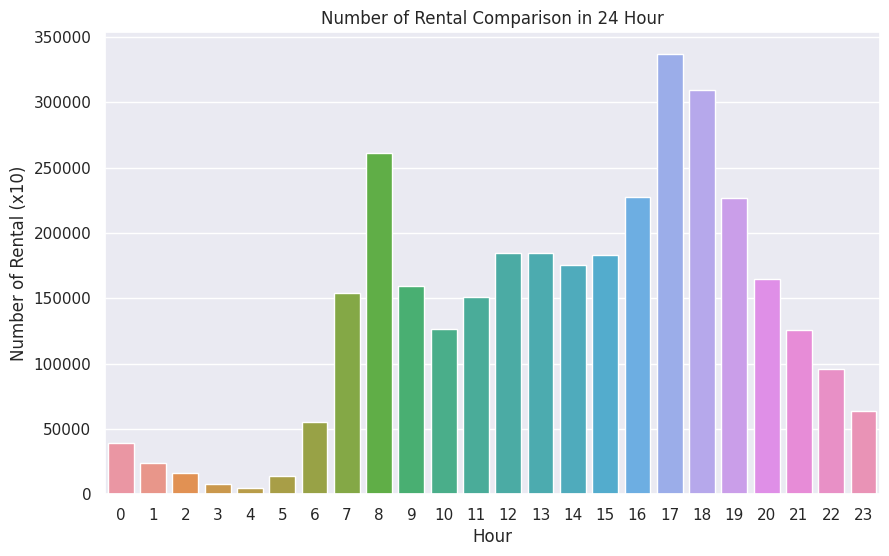

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="hour", y="count", data=hourly_rental_df)

plt.xlabel("Hour")
plt.ylabel("Number of Rental (x10)")
plt.title("Number of Rental Comparison in 24 Hour")

plt.show()

Interpretation: The five highest number of rentals are at 17, 18, 8, 16, and 19. Indicates people ride to work/school at 8 and go home at 16, 17, 18, and 19.

**Compare number of rental in Holiday and Not Holiday**




In [ ]:
#Create Table Number of Rentals in Holiday and Not Holiday
holiday_rental_df = hour_df.groupby(by="holiday").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()

holiday_rental_df

holiday    count
0        0  3214244
1        1    78435

Interpretation: Number of rentals on holiday is less than on not holiday. The number on holiday only around 2,4% from number of not holiday.

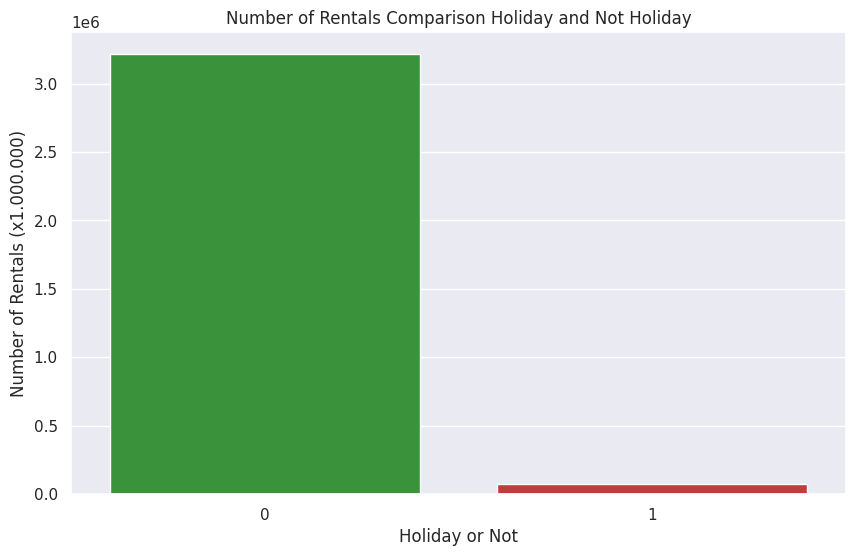

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="holiday", y="count", data=holiday_rental_df, color = "blue", palette = ["tab:green", "tab:red"])

plt.xlabel("Holiday or Not")
plt.ylabel("Number of Rentals (x1.000.000)")
plt.title("Number of Rentals Comparison Holiday and Not Holiday")

plt.show()

**Compare the number of rentals in Weekday**

In [ ]:
#Create Table Number of Rentals in Weekday
weekday_rental_df = hour_df.groupby(by="weekday").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()


weekday_rental_df

weekday   count
0     Friday  487790
1   Thursday  485395
2   Saturday  477807
3  Wednesday  473048
4    Tuesday  469109
5     Monday  455503
6     Sunday  444027

Interpretation: The number of rentals on Friday is highest than on other days but each difference is only small.

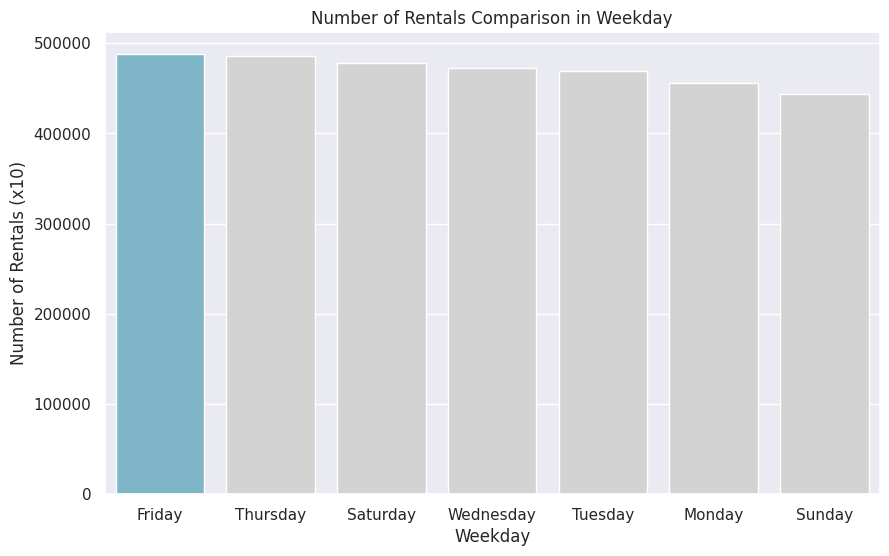

In [ ]:
plt.figure(figsize=(10,6))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="weekday", y="count", data=weekday_rental_df.sort_values(by="count", ascending=False), palette=colors_)

plt.xlabel("Weekday")
plt.ylabel("Number of Rentals (x10)")
plt.title("Number of Rentals Comparison in Weekday")

plt.show()

**Compare the number of rentals in Workingday and Not Workingday**

In [ ]:
#Create Number of Rentals in Workingday and Not Workingday
workingday_rental_df = hour_df.groupby(by="workingday").agg({
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()


workingday_rental_df

workingday    count
0           1  2292410
1           0  1000269

Interpretation: The number of rentals on working day is higher than not workingday. The number of rentals on not workingday only around 43% from workingday.

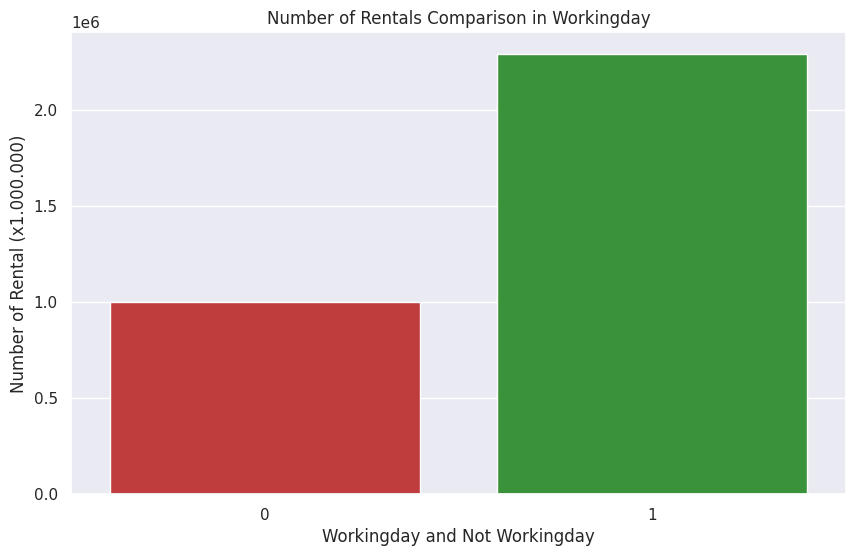

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="workingday", y="count", data=workingday_rental_df, color = "blue", palette = ["tab:red", "tab:green"])

plt.xlabel("Workingday and Not Workingday")
plt.ylabel("Number of Rental (x1.000.000)")
plt.title("Number of Rentals Comparison in Workingday")

plt.show()

**Multivariate Analysis**

In [ ]:
#Compare the number of rentals by casual and by registered on 2011 and 2012
year_comparison_df = hour_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()

year_comparison_df

year  casual  registered    count
0  2012  372765     1676811  2049576
1  2011  247252      995851  1243103

Interpretation: Both by casual or by registered, the highest number of rentals is in 2012

In [ ]:
year_comparison_df_unpivoted = pd.melt(year_comparison_df,
                                      id_vars=["year"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-37-710437aaf776>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  year_comparison_df_unpivoted = pd.melt(year_comparison_df,


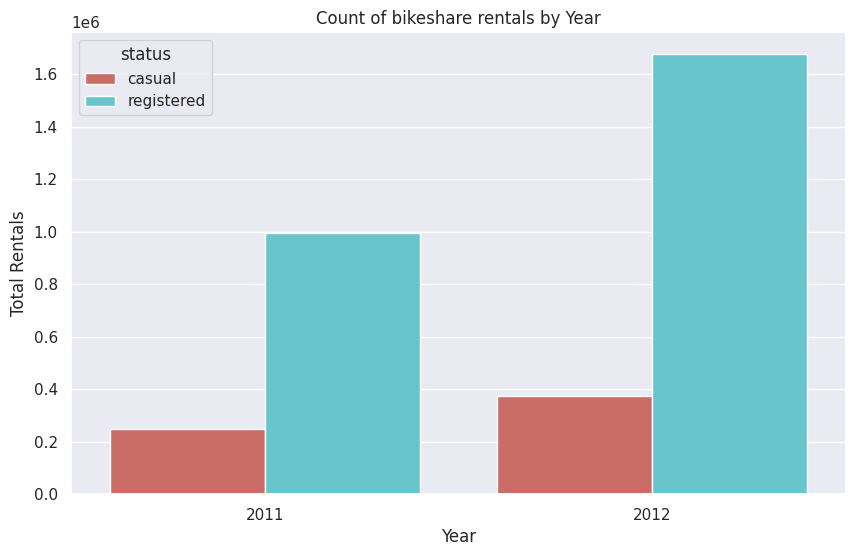

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="year", y="count", data=year_comparison_df_unpivoted, hue="status", palette="hls")

plt.xlabel("Year")
plt.ylabel("Total Rentals")
plt.title("Count of bikeshare rentals by Year")

plt.show()

In [ ]:
#Compare number of rentals by casual and by registered in every season
season_comparison_df = hour_df.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()


season_comparison_df

season  casual  registered    count
0  Summer  226091      835038  1061129
1  Spring  203522      715067   918589
2    Fall  129782      711831   841613
3  Winter   60622      410726   471348

Interpretation: Both by casual or by registered, the highest number is in summer. The order from highest to lowest are summer, spring, fall, and winter

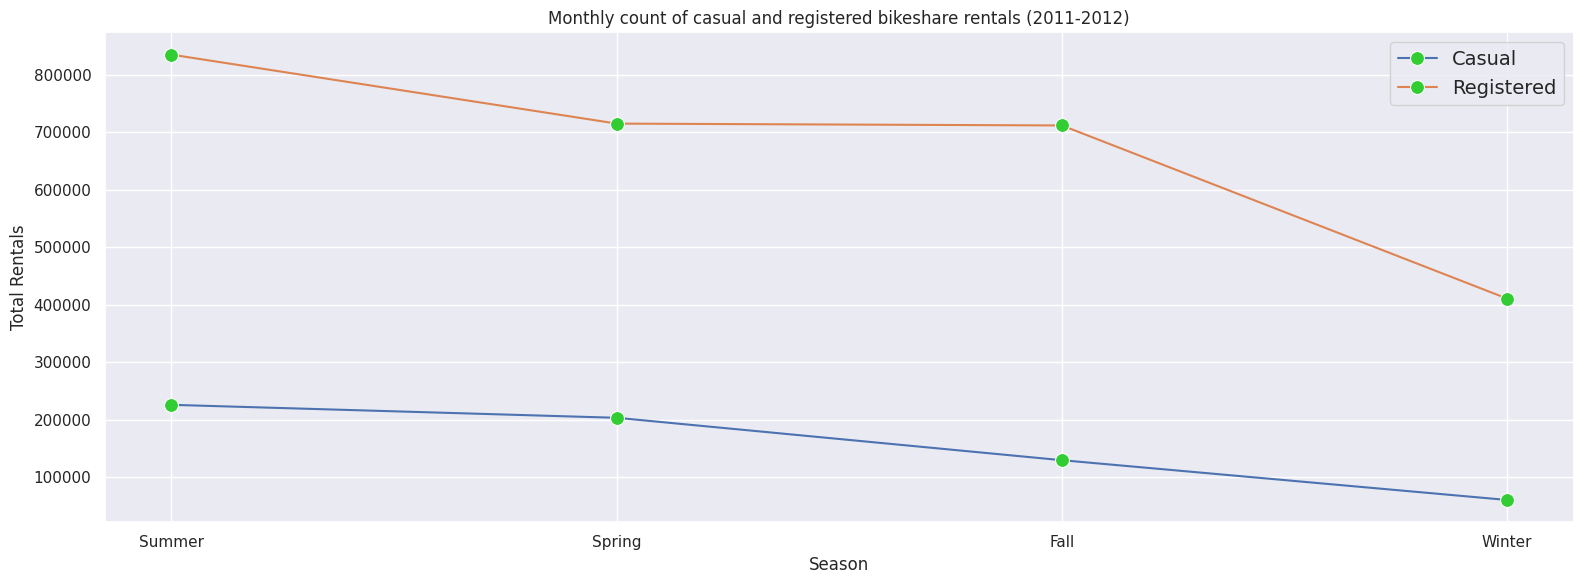

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="season", y="casual", data=season_comparison_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10)
sns.lineplot(x="season", y="registered", data=season_comparison_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Monthly count of casual and registered bikeshare rentals (2011-2012)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

Interpretation:

Casual: from summer to winter the trend is always decreasing
Registered: from summer to spring is decreased, from spring to fall is almost stabled, and from fall to winter is decreased.

In [ ]:
season_comparison_df_unpivoted = pd.melt(season_comparison_df,
                                      id_vars=["season"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-41-4fe3fd57ff74>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  season_comparison_df_unpivoted = pd.melt(season_comparison_df,


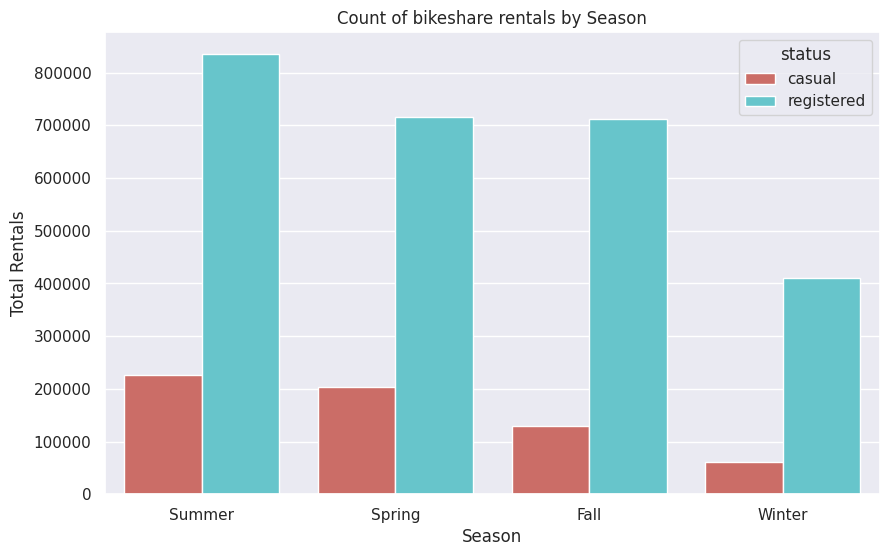

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="season", y="count", data=season_comparison_df_unpivoted, hue="status", palette="hls")

plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Count of bikeshare rentals by Season")

plt.show()

In [ ]:
#Compare number of rentals by casual and by registered in each month
month_comparison_df = hour_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="casual", ascending=False).reset_index()

month_comparison_df

month  casual  registered   count
0        July   78157      266791  344948
1         May   75285      256401  331686
2        June   73906      272436  346342
3      August   72039      279155  351194
4   September   70323      275668  345991
5       April   60802      208292  269094
6     October   59760      262592  322352
7       March   44444      184476  228920
8    November   36603      218228  254831
9    December   21693      189343  211036
10   February   14963      136389  151352
11    January   12042      122891  134933

Interpretation: The five highest number of rentals by casual are on July, May, June, August, and September

In [ ]:
#Compare number of rentals by casual and bu registered in each month
month_comparison_df = hour_df.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="registered", ascending=False).reset_index()


month_comparison_df

month  casual  registered   count
0      August   72039      279155  351194
1   September   70323      275668  345991
2        June   73906      272436  346342
3        July   78157      266791  344948
4     October   59760      262592  322352
5         May   75285      256401  331686
6    November   36603      218228  254831
7       April   60802      208292  269094
8    December   21693      189343  211036
9       March   44444      184476  228920
10   February   14963      136389  151352
11    January   12042      122891  134933

Interpretation: The five highest number of rentals by casual are on August, September, June, July, and October

In [ ]:
month_comparison_df_unpivoted = pd.melt(month_comparison_df,
                                      id_vars=["month"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-45-5e2dafc05fa1>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  month_comparison_df_unpivoted = pd.melt(month_comparison_df,


In [ ]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

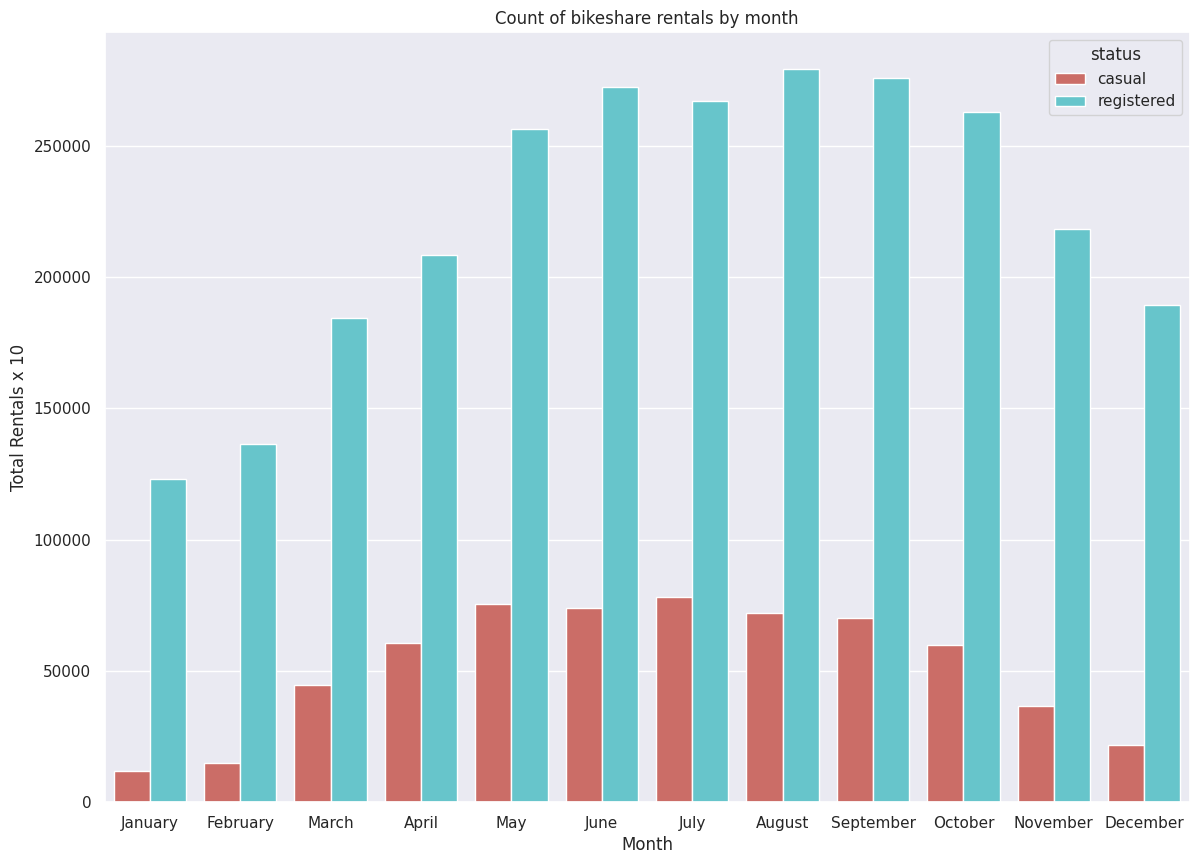

In [ ]:
plt.figure(figsize=(14,10))

sns.barplot(x='month', y='count', data=month_comparison_df_unpivoted, order=month_order, hue='status', palette="hls")

plt.xlabel("Month")
plt.ylabel("Total Rentals x 10")
plt.title("Count of bikeshare rentals by month")

plt.show()

In [ ]:
#Compare number of rentals by casual and by registered in each hour
hour_comparison_df = hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="casual", ascending=False).reset_index()


hour_comparison_df

hour  casual  registered   count
0     14   55089      120563  175652
1     15   54606      128543  183149
2     17   54220      282640  336860
3     16   53834      173914  227748
4     13   52713      132206  184919
5     12   49718      134696  184414
6     18   44496      265276  309772
7     11   43286      108034  151320
8     19   35505      191284  226789
9     10   33789       92468  126257
10    20   26378      138172  164550
11     9   22458      136980  159438
12    21   20570      104875  125445
13    22   16200       79412   95612
14     8   15761      245240  261001
15    23   11065       52876   63941
16     7    8037      146134  154171
17     0    7375       31755   39130
18     1    4709       19455   24164
19     2    3412       12940   16352
20     6    3017       52115   55132
21     3    1893        6281    8174
22     5    1012       13249   14261
23     4     874        3554    4428

Interpretation: The five highest number of rentals by casual are at 14, 15, 17, 16, and 13

In [ ]:
#Compare number of rentals by casual and by registered in each hour
hour_comparison_df = hour_df.groupby(by="hour").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="registered", ascending=False).reset_index()


hour_comparison_df

hour  casual  registered   count
0     17   54220      282640  336860
1     18   44496      265276  309772
2      8   15761      245240  261001
3     19   35505      191284  226789
4     16   53834      173914  227748
5      7    8037      146134  154171
6     20   26378      138172  164550
7      9   22458      136980  159438
8     12   49718      134696  184414
9     13   52713      132206  184919
10    15   54606      128543  183149
11    14   55089      120563  175652
12    11   43286      108034  151320
13    21   20570      104875  125445
14    10   33789       92468  126257
15    22   16200       79412   95612
16    23   11065       52876   63941
17     6    3017       52115   55132
18     0    7375       31755   39130
19     1    4709       19455   24164
20     5    1012       13249   14261
21     2    3412       12940   16352
22     3    1893        6281    8174
23     4     874        3554    4428

Interpretation: The five highest number of rentals by registered are 17, 18, 8, 19, 16 which are time to go to work/school and go home.

In [ ]:
hour_comparison_df_unpivoted = pd.melt(hour_comparison_df,
                                      id_vars=["hour"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-50-4f5ce126d3fa>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  hour_comparison_df_unpivoted = pd.melt(hour_comparison_df,


Text(0.5, 1.0, 'Count of bikeshare rentals by hour')

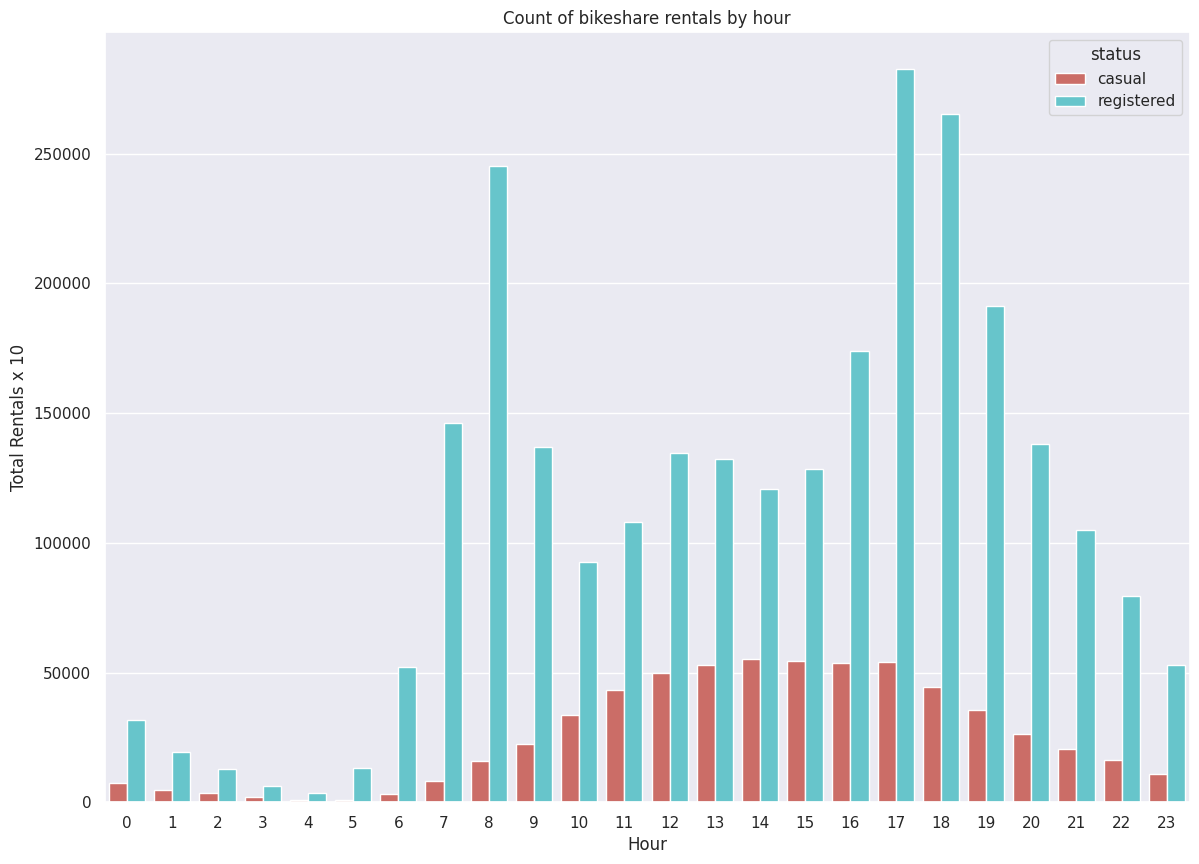

In [ ]:
plt.figure(figsize=(14,10))

sns.barplot(x="hour", y="count", data=hour_comparison_df_unpivoted, hue="status", palette="hls")

plt.xlabel("Hour")
plt.ylabel("Total Rentals x 10")
plt.title("Count of bikeshare rentals by hour")

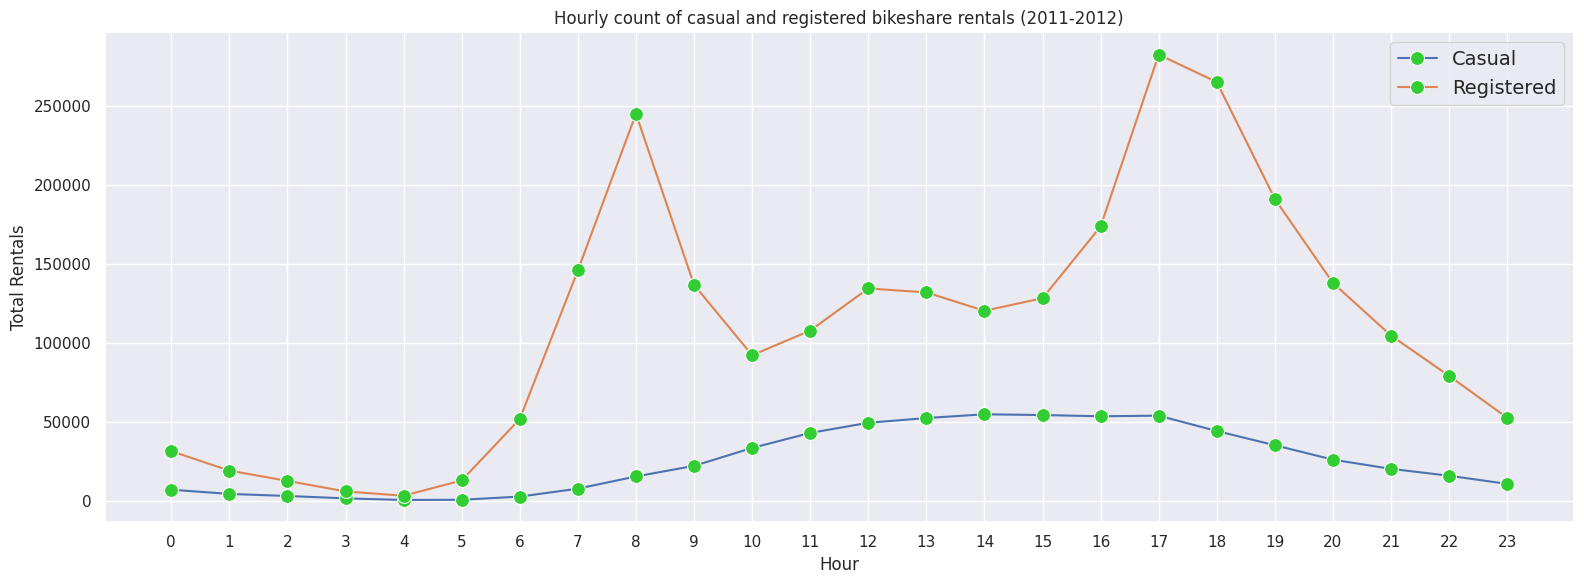

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="hour", y="casual", data=hour_comparison_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10)
sns.lineplot(x="hour", y="registered", data=hour_comparison_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10)

# Add labels and a title to the plot
x = np.arange(0, 24, 1)
plt.xticks(x)

# Add labels and a title to the plot
plt.xlabel("Hour")
plt.ylabel("Total Rentals")
plt.title("Hourly count of casual and registered bikeshare rentals (2011-2012)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Compare the number of rentals by casual and by registered in everyday
weekday_comparison_df = hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="casual", ascending=False).reset_index()

weekday_comparison_df

weekday  casual  registered   count
0   Saturday  153852      323955  477807
1     Sunday  140521      303506  444027
2     Friday   78238      409552  487790
3     Monday   70784      384719  455503
4   Thursday   61460      423935  485395
5    Tuesday   57843      411266  469109
6  Wednesday   57319      415729  473048

Interpretation: The three highest number of rentals by casual are on Saturday, Sunday, and Friday

In [ ]:
#Compare the number of rentals by casual and by registered in everyday
weekday_comparison_df = hour_df.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="registered", ascending=False).reset_index()

weekday_comparison_df

weekday  casual  registered   count
0   Thursday   61460      423935  485395
1  Wednesday   57319      415729  473048
2    Tuesday   57843      411266  469109
3     Friday   78238      409552  487790
4     Monday   70784      384719  455503
5   Saturday  153852      323955  477807
6     Sunday  140521      303506  444027

Interpretation: The three highest number of rentals by registered are on Thursday, Wednesday, and Tuesday.

In [ ]:
weekday_comparison_df_unpivoted = pd.melt(weekday_comparison_df,
                                      id_vars=["weekday"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-55-a93c08495851>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  weekday_comparison_df_unpivoted = pd.melt(weekday_comparison_df,


In [ ]:
weekday_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

Text(0.5, 1.0, 'Count of bikeshare rentals by day')

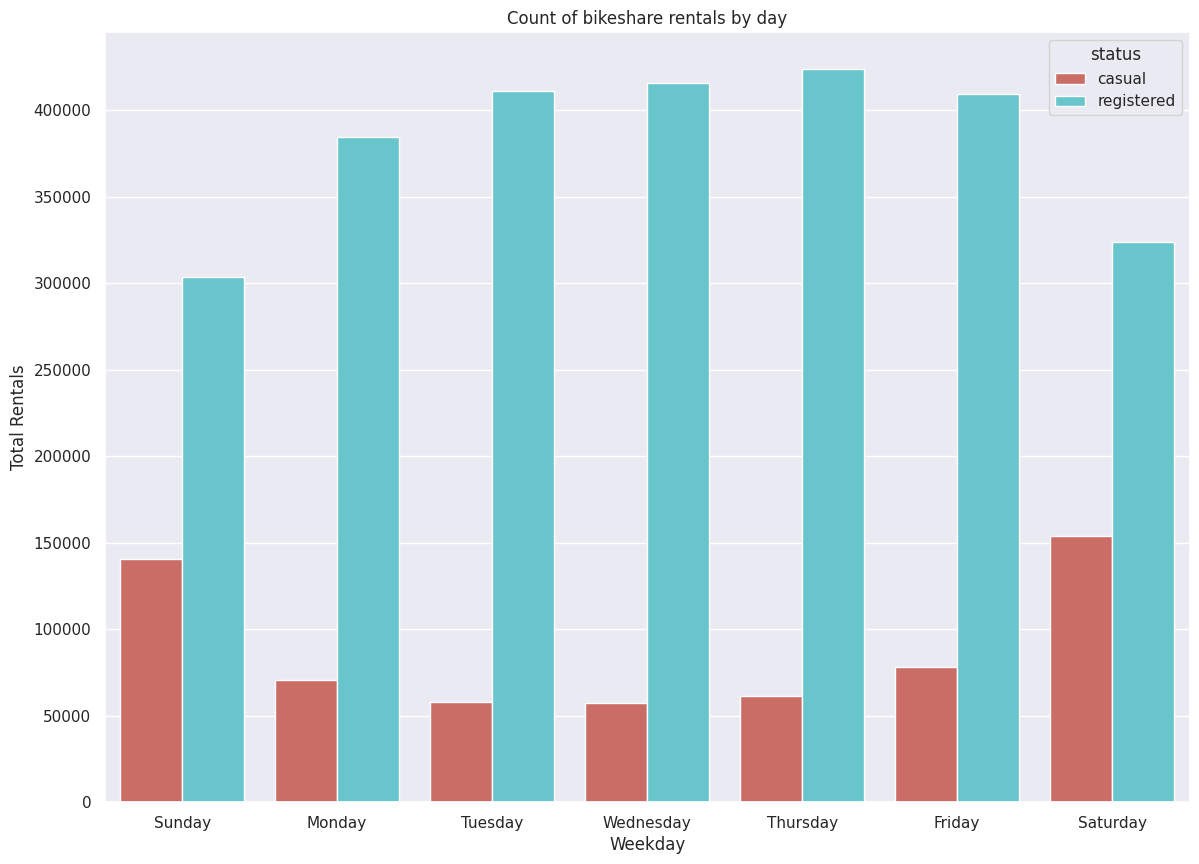

In [ ]:
plt.figure(figsize=(14,10))

sns.barplot(x="weekday", y="count", data=weekday_comparison_df_unpivoted, order=weekday_order, hue="status", palette="hls")

plt.xlabel("Weekday")
plt.ylabel("Total Rentals")
plt.title("Count of bikeshare rentals by day")

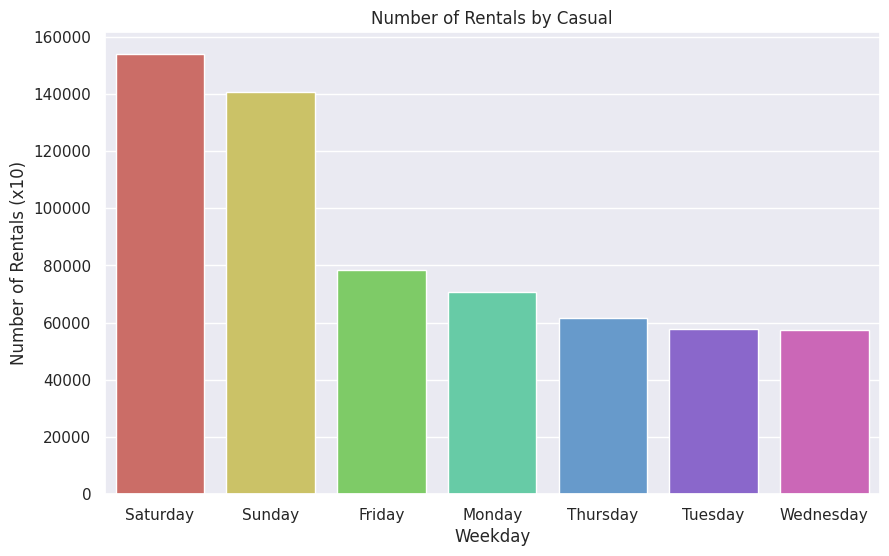

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="weekday", y="casual", data=weekday_comparison_df.sort_values(by="casual", ascending=False), color = "blue", palette="hls")

plt.xlabel("Weekday")
plt.ylabel("Number of Rentals (x10)")
plt.title("Number of Rentals by Casual")

plt.show()

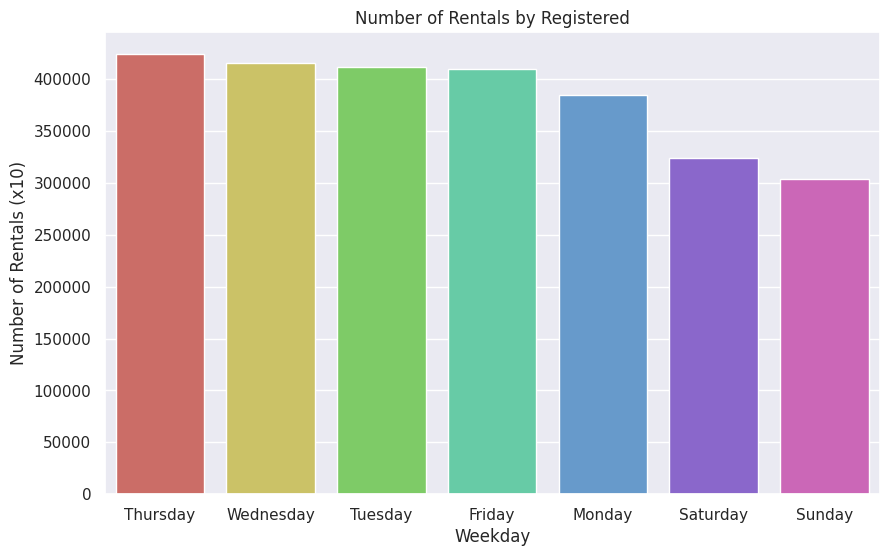

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="weekday", y="registered", data=weekday_comparison_df.sort_values(by="registered", ascending=False), color = "blue", palette="hls")

plt.xlabel("Weekday")
plt.ylabel("Number of Rentals (x10)")
plt.title("Number of Rentals by Registered")

plt.show()

In [ ]:
#Compare number of rentals by casual and by registered on workingday and not
workingday_comparison_df = hour_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()


workingday_comparison_df

workingday  casual  registered    count
0           1  303285     1989125  2292410
1           0  316732      683537  1000269

Interpretation:

The highest number of rentals by casual is on not workingday. Meanwhile, the highest number of rentals by registered is on workingday

In [ ]:
workingday_comparison_df_unpivoted = pd.melt(workingday_comparison_df,
                                      id_vars=["workingday"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-61-09541edd7ddc>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  workingday_comparison_df_unpivoted = pd.melt(workingday_comparison_df,


Text(0.5, 1.0, 'Count of bikeshare rentals by workingday')

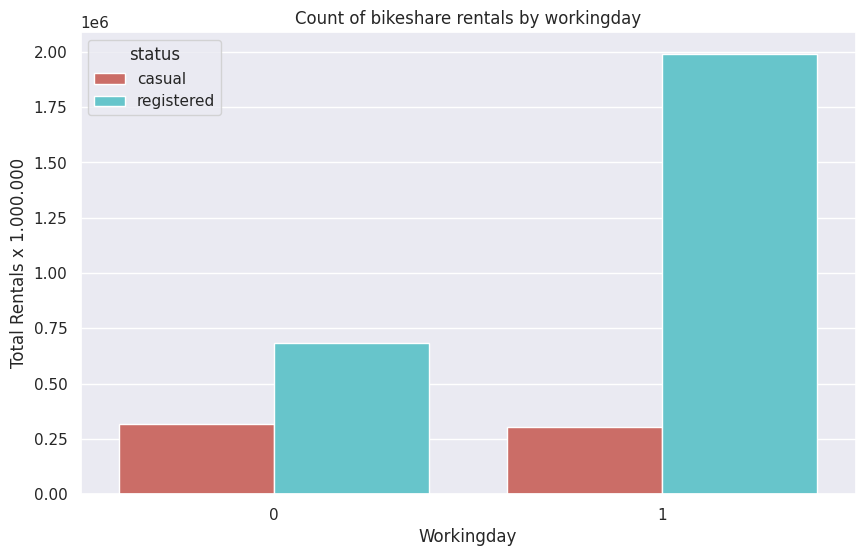

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="workingday", y="count", data=workingday_comparison_df_unpivoted, hue="status", palette="hls")

plt.xlabel("Workingday")
plt.ylabel("Total Rentals x 1.000.000")
plt.title("Count of bikeshare rentals by workingday")

In [ ]:
#Compare number of rentals by casual and by registered on holiday and not holiday
holiday_comparison_df = hour_df.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False).reset_index()


holiday_comparison_df

holiday  casual  registered    count
0        0  597658     2616586  3214244
1        1   22359       56076    78435

Interpretation: the number of renals by casual and by registered are higher on not holiday

In [ ]:
holiday_comparison_df_unpivoted = pd.melt(holiday_comparison_df,
                                      id_vars=["holiday"],
                                      value_vars=["casual", "registered"],
                                      var_name="status",
                                      value_name="count")

<ipython-input-64-1b0071817c96>:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  holiday_comparison_df_unpivoted = pd.melt(holiday_comparison_df,


Text(0.5, 1.0, 'Count of bikeshare rentalss by holiday')

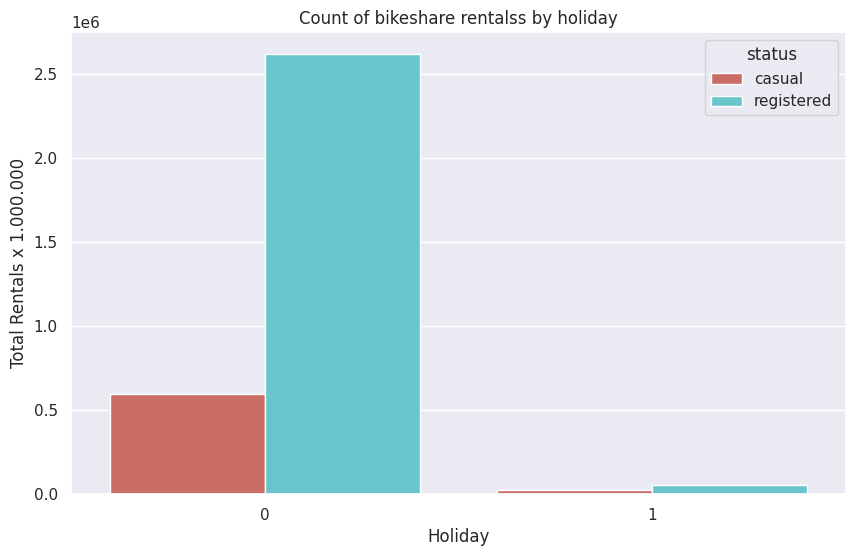

In [ ]:
plt.figure(figsize=(10,6))

sns.barplot(x="holiday", y="count", data=holiday_comparison_df_unpivoted, hue="status", palette="hls")

plt.xlabel("Holiday")
plt.ylabel("Total Rentals x 1.000.000")
plt.title("Count of bikeshare rentalss by holiday")

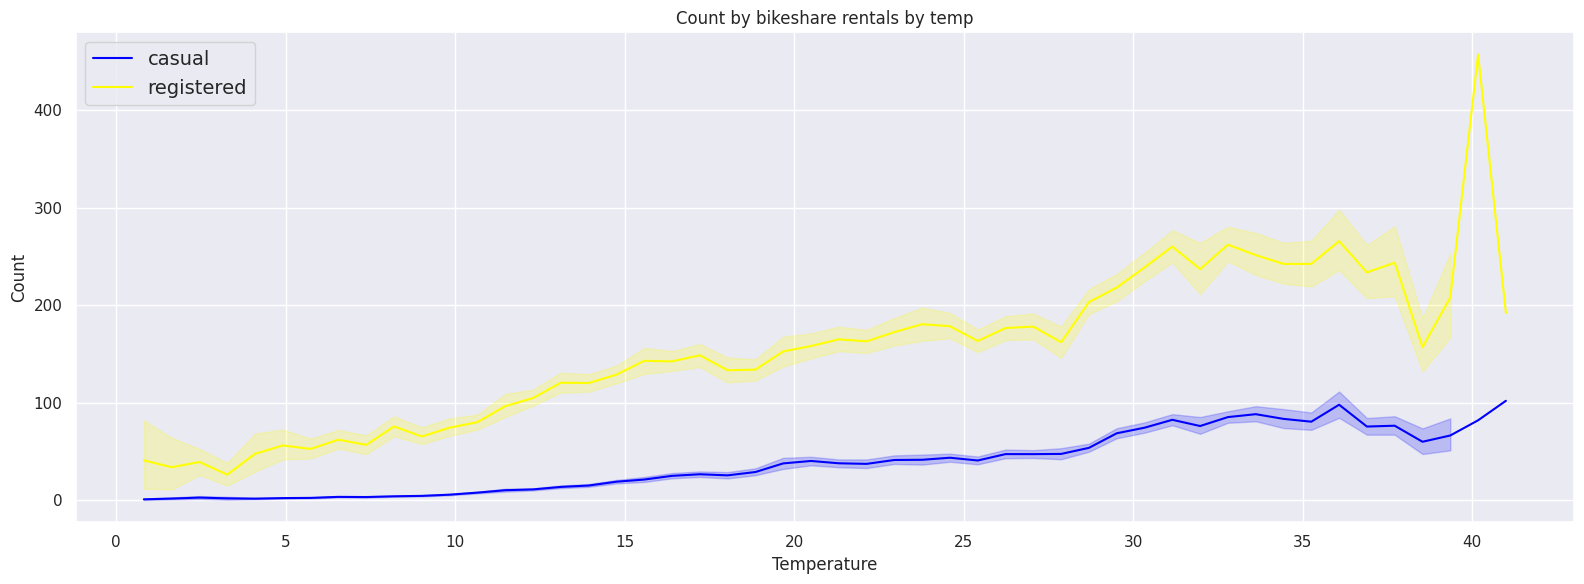

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="temp", y="casual", data=hour_df, label="casual", color="blue")
sns.lineplot(x="temp", y="registered", data=hour_df, label="registered", color="yellow")

# Add labels and a title to the plot
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Count by bikeshare rentals by temp")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Interpretation: Both casual and registered the trend is increasing, but registered numbers experience a significant increase at a temperature of 40 and then decrease again.

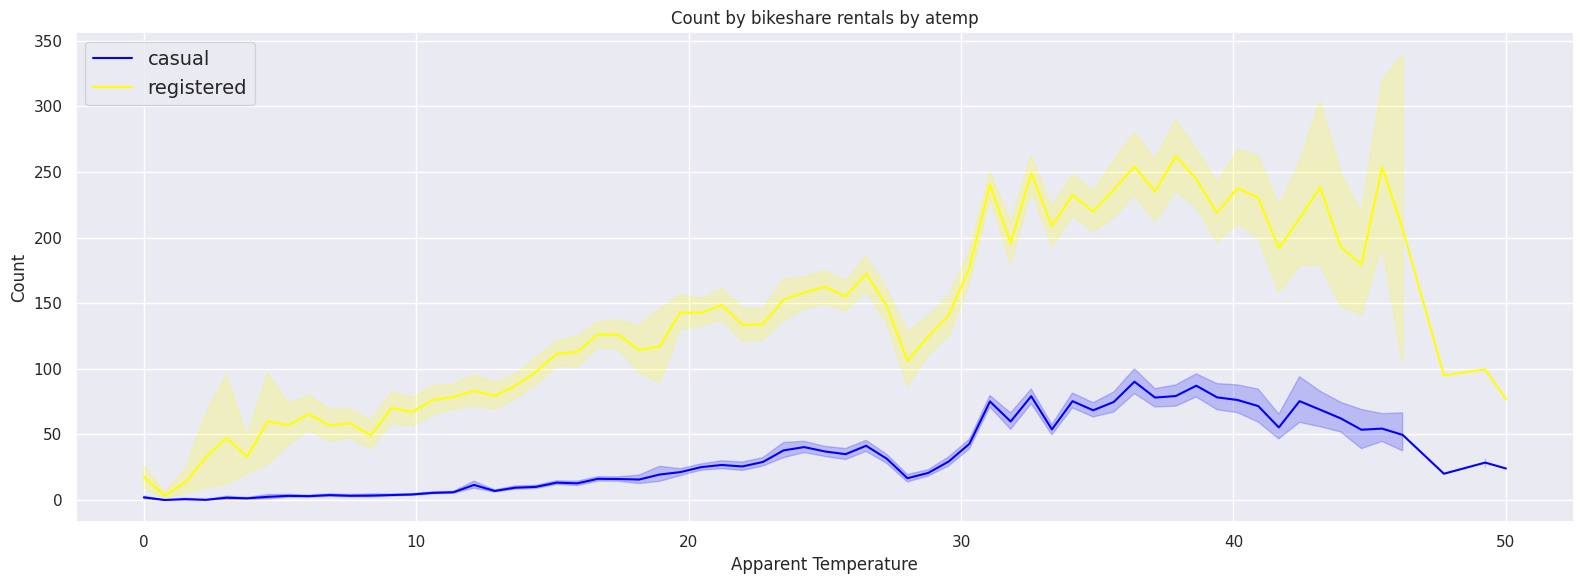

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="atemp", y="casual", data=hour_df, label="casual", color="blue")
sns.lineplot(x="atemp", y="registered", data=hour_df, label="registered", color="yellow")

# Add labels and a title to the plot
plt.xlabel("Apparent Temperature")
plt.ylabel("Count")
plt.title("Count by bikeshare rentals by atemp")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Interpretation: Shows that the optimum is 30 to approximately 50

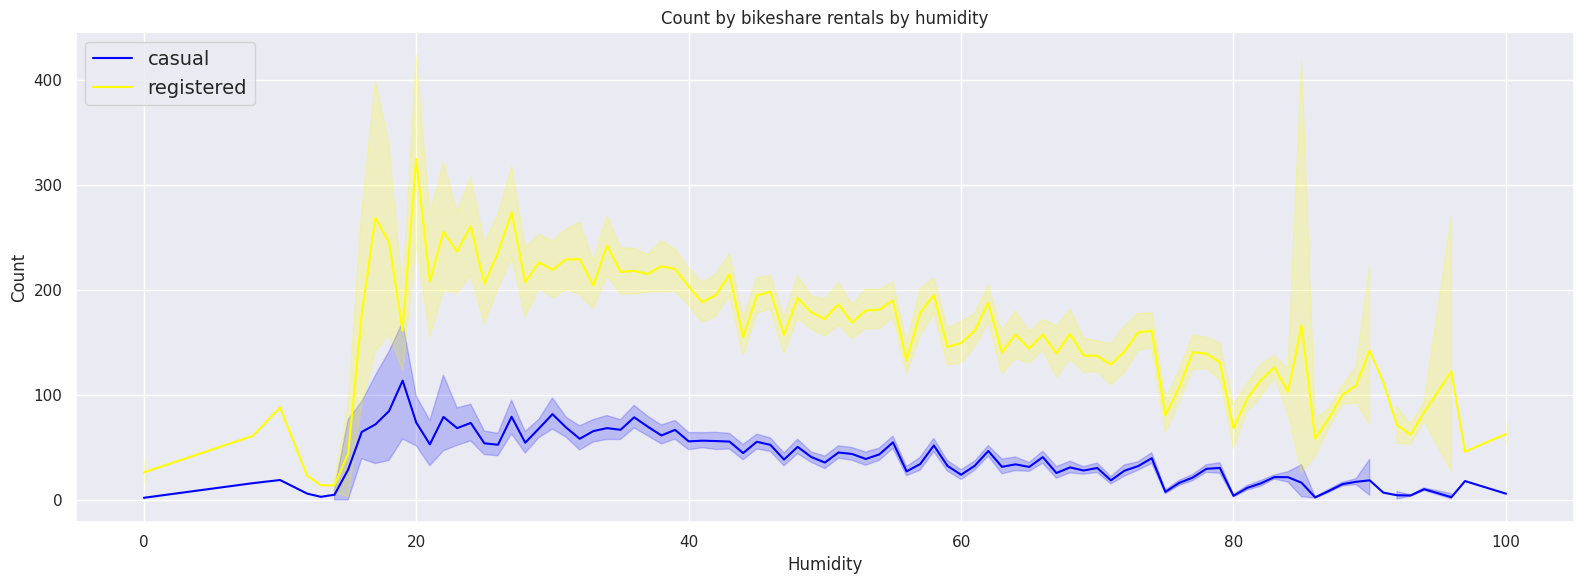

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="hum", y="casual", data=hour_df, label="casual", color="blue")
sns.lineplot(x="hum", y="registered", data=hour_df, label="registered", color="yellow")

# Add labels and a title to the plot
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.title("Count by bikeshare rentals by humidity")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Interpretation: Shows a significant increase in humidity number approximately 20 then decreases again gradually

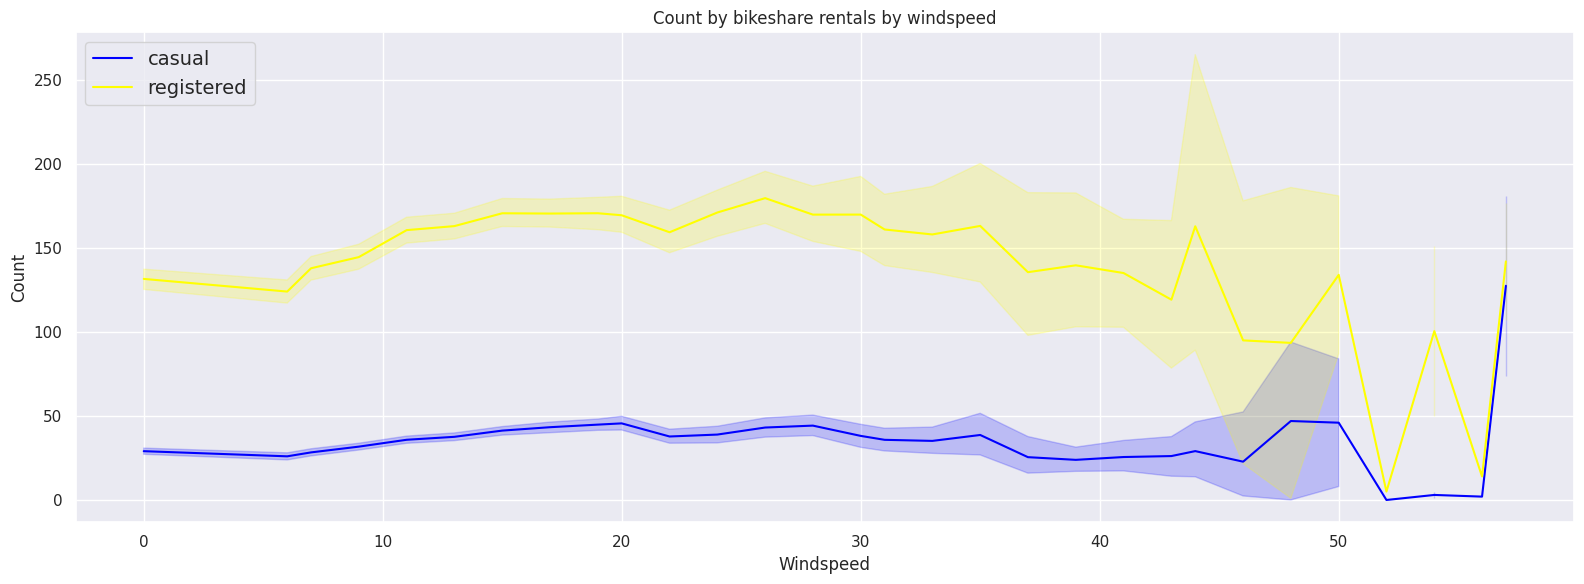

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="windspeed", y="casual", data=hour_df, label="casual", color="blue")
sns.lineplot(x="windspeed", y="registered", data=hour_df, label="registered", color="yellow")

# Add labels and a title to the plot
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.title("Count by bikeshare rentals by windspeed")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Interpretation: Shows a significant decrease in windspeed number 50. Significantly increase again  approximately to the maximum windspeed number

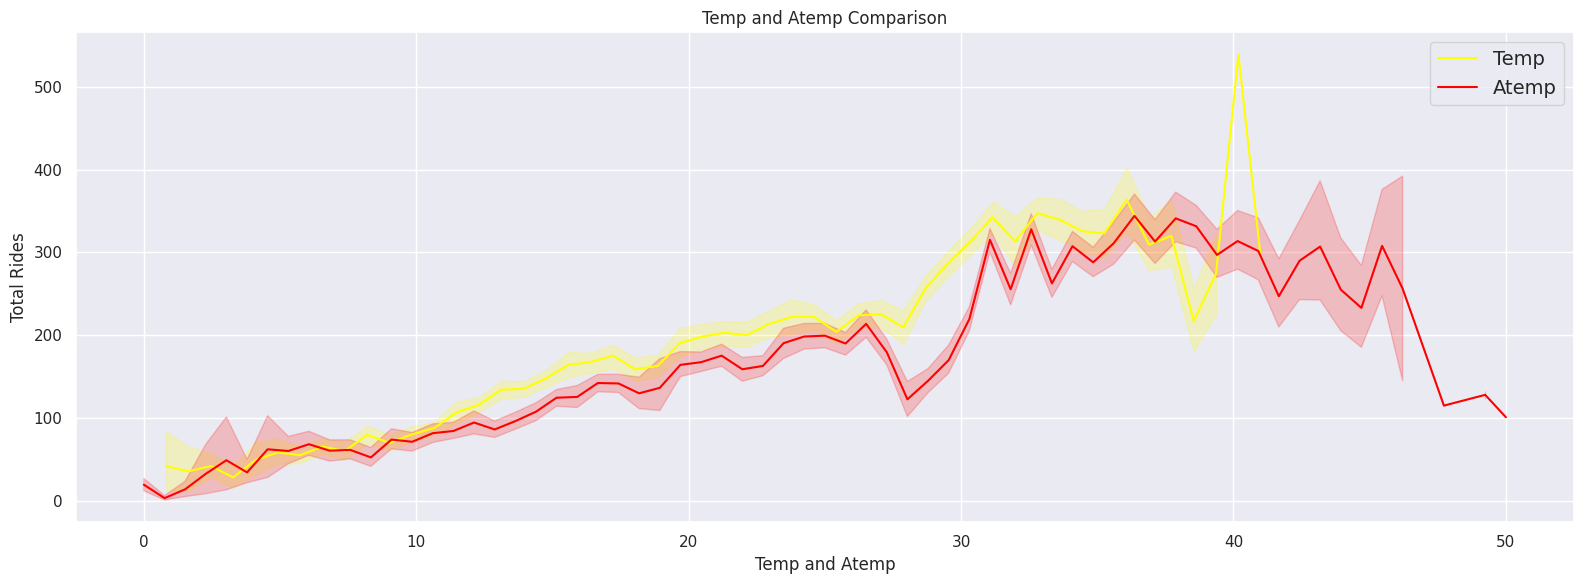

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="temp", y="count", data=hour_df, label="Temp", color="yellow")
sns.lineplot(x="atemp", y="count", data=hour_df, label="Atemp", color="red")

# Add labels and a title to the plot
plt.xlabel("Temp and Atemp")
plt.ylabel("Total Rides")
plt.title("Temp and Atemp Comparison")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Question 1: What is the distribution from Monday to Sunday?

In [ ]:
#Create daily count table (2011-2012) include date, day, month, year, casual, and registered
daily_df = hour_df.groupby(by=["dteday", "month", "season", "year", "weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).reset_index()

daily_df.head(31)

dteday    month  season  year    weekday  casual  registered  count
0  2011-01-01  January  Winter  2011   Saturday     331         654    985
1  2011-01-02  January  Winter  2011     Sunday     131         670    801
2  2011-01-03  January  Winter  2011     Monday     120        1229   1349
3  2011-01-04  January  Winter  2011    Tuesday     108        1454   1562
4  2011-01-05  January  Winter  2011  Wednesday      82        1518   1600
5  2011-01-06  January  Winter  2011   Thursday      88        1518   1606
6  2011-01-07  January  Winter  2011     Friday     148        1362   1510
7  2011-01-08  January  Winter  2011   Saturday      68         891    959
8  2011-01-09  January  Winter  2011     Sunday      54         768    822
9  2011-01-10  January  Winter  2011     Monday      41        1280   1321
10 2011-01-11  January  Winter  2011    Tuesday      43        1220   1263
11 2011-01-12  January  Winter  2011  Wednesday      25        1137   1162
12 2011-01-13  January  Winter  2011   Thursday      38        1368   1406
13 2011-01-14  January  Winter  2011     Friday      54        1367   1421
14 2011-01-15  January  Winter  2011   Saturday     222        1026   1248
15 2011-01-16  January  Winter  2011     Sunday     251         953   1204
16 2011-01-17  January  Winter  2011     Monday     117         883   1000
17 2011-01-18  January  Winter  2011    Tuesday       9         674    683
18 2011-01-19  January  Winter  2011  Wednesday      78        1572   1650
19 2011-01-20  January  Winter  2011   Thursday      83        1844   1927
20 2011-01-21  January  Winter  2011     Friday      75        1468   1543
21 2011-01-22  January  Winter  2011   Saturday      93         888    981
22 2011-01-23  January  Winter  2011     Sunday     150         836    986
23 2011-01-24  January  Winter  2011     Monday      86        1330   1416
24 2011-01-25  January  Winter  2011    Tuesday     186        1799   1985
25 2011-01-26  January  Winter  2011  Wednesday      34         472    506
26 2011-01-27  January  Winter  2011   Thursday      15         416    431
27 2011-01-28  January  Winter  2011     Friday      38        1129   1167
28 2011-01-29  January  Winter  2011   Saturday     123         975   1098
29 2011-01-30  January  Winter  2011     Sunday     140         956   1096
30 2011-01-31  January  Winter  2011     Monday      42        1459   1501

In [ ]:
#Select Data in Monday (Jan 2011 - Dec 2012)
monday_df = daily_df.loc[(daily_df.weekday == "Monday")]

monday_df.head(15)

dteday     month  season  year weekday  casual  registered  count
2   2011-01-03   January  Winter  2011  Monday     120        1229   1349
9   2011-01-10   January  Winter  2011  Monday      41        1280   1321
16  2011-01-17   January  Winter  2011  Monday     117         883   1000
23  2011-01-24   January  Winter  2011  Monday      86        1330   1416
30  2011-01-31   January  Winter  2011  Monday      42        1459   1501
37  2011-02-07  February  Winter  2011  Monday     120        1592   1712
44  2011-02-14  February  Winter  2011  Monday     208        1705   1913
51  2011-02-21  February  Winter  2011  Monday     195         912   1107
58  2011-02-28  February  Winter  2011  Monday      81        1365   1446
65  2011-03-07     March  Winter  2011  Monday     244        1628   1872
72  2011-03-14     March  Winter  2011  Monday     359        1687   2046
79  2011-03-21     March  Spring  2011  Monday     401        1676   2077
86  2011-03-28     March  Spring  2011  Monday     222        1806   2028
93  2011-04-04     April  Spring  2011  Monday     734        2381   3115
100 2011-04-11     April  Spring  2011  Monday     855        2493   3348

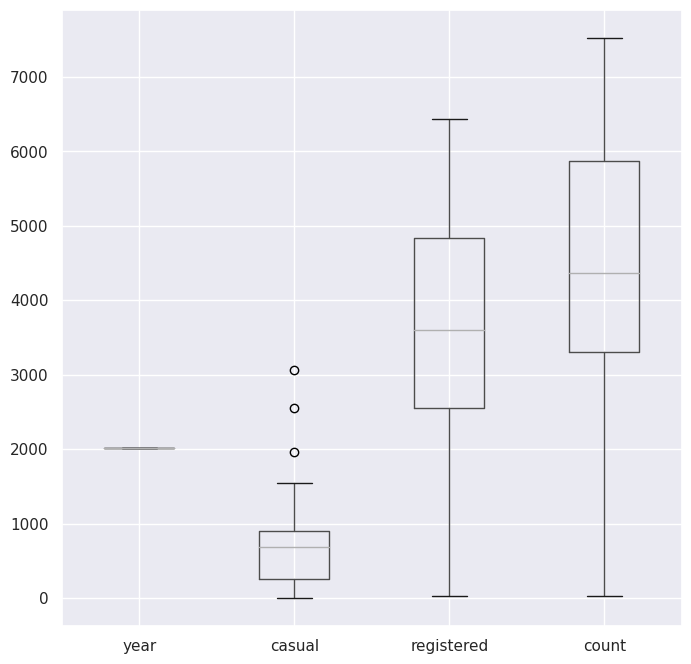

In [ ]:
monday_df.boxplot( figsize=(8, 8))
plt.show()

Casual: there are three outliers

In [ ]:
monday_df.describe()

year       casual   registered        count
count   105.000000   105.000000   105.000000   105.000000
mean   2011.504762   674.133333  3663.990476  4338.123810
std       0.502375   493.777298  1504.215925  1793.074013
min    2011.000000     2.000000    20.000000    22.000000
25%    2011.000000   253.000000  2549.000000  3310.000000
50%    2012.000000   690.000000  3603.000000  4359.000000
75%    2012.000000   904.000000  4841.000000  5875.000000
max    2012.000000  3065.000000  6435.000000  7525.000000

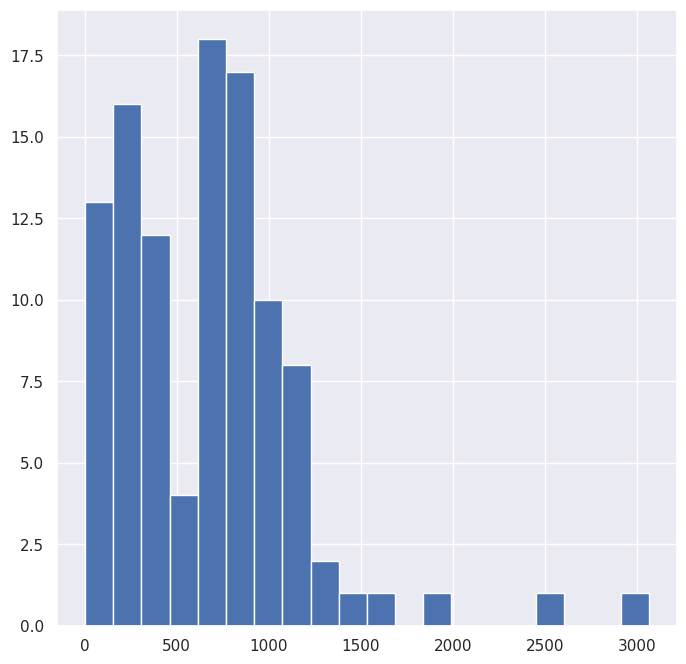

In [ ]:
monday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Casual: three bars that far on the left are outliers

Interpretation: Distribution number of rentals by casual on Monday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

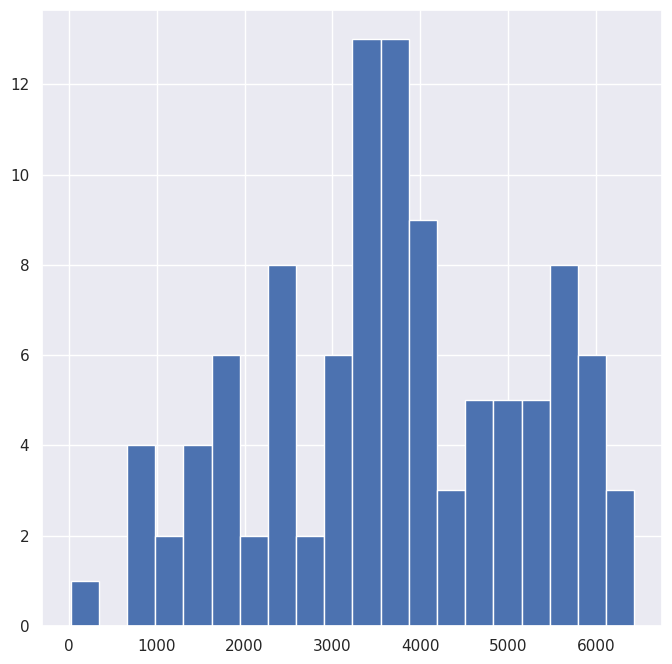

In [ ]:
monday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Monday (2011-2012) is left-skewed distribution or most of the data population is concentrated on the right.

In [ ]:
print("casual range: ", monday_df.casual.max() - monday_df.casual.min())
print("casual iqr: ", np.percentile(monday_df.casual, 75) - np.percentile(monday_df.casual, 25))
monday_casual_series = pd.Series(monday_df.casual)
print("casual skew:", monday_casual_series.skew())

print("registered range: ", monday_df.registered.max() - monday_df.registered.min())
print("registered iqr: ", np.percentile(monday_df.registered, 75) - np.percentile(monday_df.registered, 25))
monday_series = pd.Series(monday_df.registered)
print("registered skew:", monday_series.skew())


casual range:  3063
casual iqr:  651.0
casual skew: 1.7149886360620108
registered range:  6415
registered iqr:  2292.0
registered skew: -0.14877851472031034


In [ ]:
#Select Data in Tuesday (Jan 2011 - Dec 2012)
tuesday_df = daily_df.loc[(daily_df.weekday == "Tuesday")]

tuesday_df.head(15)

dteday     month  season  year  weekday  casual  registered  count
3   2011-01-04   January  Winter  2011  Tuesday     108        1454   1562
10  2011-01-11   January  Winter  2011  Tuesday      43        1220   1263
17  2011-01-18   January  Winter  2011  Tuesday       9         674    683
24  2011-01-25   January  Winter  2011  Tuesday     186        1799   1985
31  2011-02-01  February  Winter  2011  Tuesday      47        1313   1360
38  2011-02-08  February  Winter  2011  Tuesday      64        1466   1530
45  2011-02-15  February  Winter  2011  Tuesday     140        1675   1815
52  2011-02-22  February  Winter  2011  Tuesday      74        1376   1450
59  2011-03-01     March  Winter  2011  Tuesday     137        1714   1851
66  2011-03-08     March  Winter  2011  Tuesday     316        1817   2133
73  2011-03-15     March  Winter  2011  Tuesday     289        1767   2056
80  2011-03-22     March  Spring  2011  Tuesday     460        2243   2703
87  2011-03-29     March  Spring  2011  Tuesday     317        2108   2425
94  2011-04-05     April  Spring  2011  Tuesday     167        1628   1795
101 2011-04-12     April  Spring  2011  Tuesday     257        1777   2034

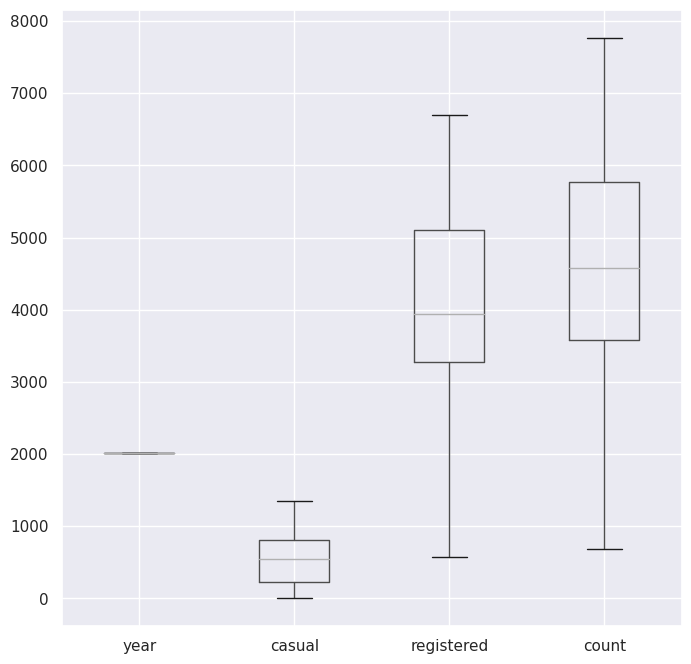

In [ ]:
tuesday_df.boxplot( figsize=(8, 8))
plt.show()

In [ ]:
tuesday_df.describe()

year       casual   registered        count
count   104.000000   104.000000   104.000000   104.000000
mean   2011.500000   556.182692  3954.480769  4510.663462
std       0.502421   342.748705  1549.462149  1826.911642
min    2011.000000     9.000000   573.000000   683.000000
25%    2011.000000   227.000000  3282.500000  3579.250000
50%    2011.500000   542.500000  3943.000000  4576.500000
75%    2012.000000   805.500000  5103.750000  5769.000000
max    2012.000000  1348.000000  6697.000000  7767.000000

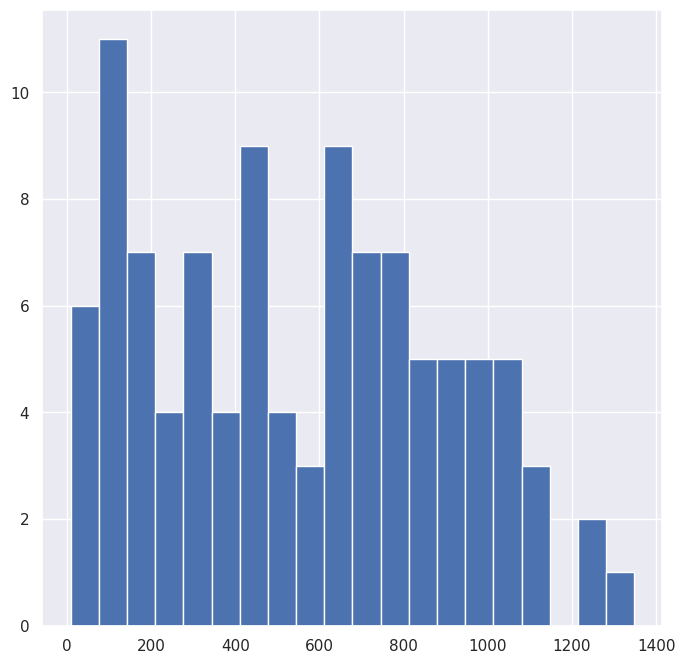

In [ ]:
tuesday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Tuesday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

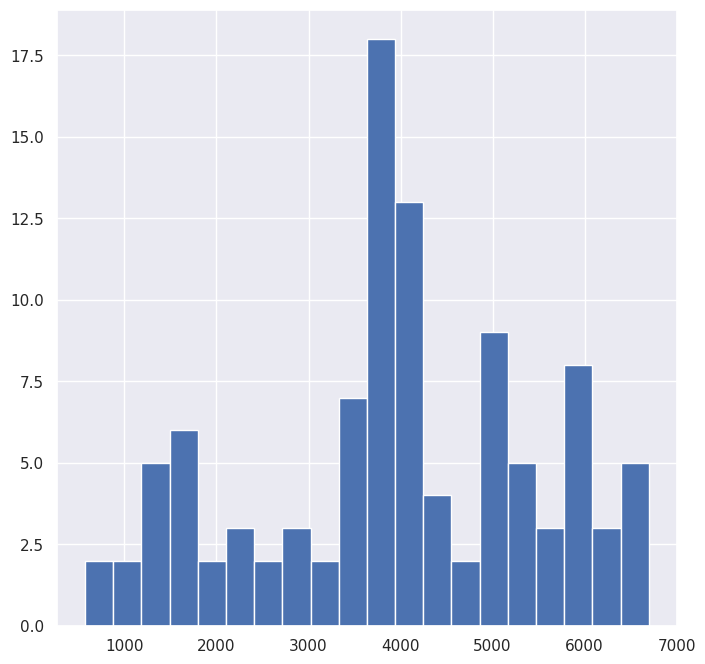

In [ ]:
tuesday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Tuesday (2011-2012) is left-skewed distribution or most of the data population is concentrated on the right.

In [ ]:
print("casual range: ", tuesday_df.casual.max() - tuesday_df.casual.min())
print("casual iqr: ", np.percentile(tuesday_df.casual, 75) - np.percentile(tuesday_df.casual, 25))
tuesday_casual_series = pd.Series(tuesday_df.casual)
print("casual skew:", tuesday_casual_series.skew())

print("registered range: ", tuesday_df.registered.max() - tuesday_df.registered.min())
print("registered iqr: ", np.percentile(tuesday_df.registered, 75) - np.percentile(tuesday_df.registered, 25))
tuesday_series = pd.Series(tuesday_df.registered)
print("registered skew:", tuesday_series.skew())


casual range:  1339
casual iqr:  578.5
casual skew: 0.2055252018191498
registered range:  6124
registered iqr:  1821.25
registered skew: -0.25860978392720796


In [ ]:
#Select Data in Wednesday (Jan 2011 - Dec 2012)
wednesday_df = daily_df.loc[(daily_df.weekday == "Wednesday")]

wednesday_df.head(15)

dteday     month  season  year    weekday  casual  registered  count
4   2011-01-05   January  Winter  2011  Wednesday      82        1518   1600
11  2011-01-12   January  Winter  2011  Wednesday      25        1137   1162
18  2011-01-19   January  Winter  2011  Wednesday      78        1572   1650
25  2011-01-26   January  Winter  2011  Wednesday      34         472    506
32  2011-02-02  February  Winter  2011  Wednesday      72        1454   1526
39  2011-02-09  February  Winter  2011  Wednesday      53        1552   1605
46  2011-02-16  February  Winter  2011  Wednesday     218        1897   2115
53  2011-02-23  February  Winter  2011  Wednesday     139        1778   1917
60  2011-03-02     March  Winter  2011  Wednesday     231        1903   2134
67  2011-03-09     March  Winter  2011  Wednesday     191        1700   1891
74  2011-03-16     March  Winter  2011  Wednesday     321        1871   2192
81  2011-03-23     March  Spring  2011  Wednesday     203        1918   2121
88  2011-03-30     March  Spring  2011  Wednesday     168        1368   1536
95  2011-04-06     April  Spring  2011  Wednesday     413        2395   2808
102 2011-04-13     April  Spring  2011  Wednesday     209        1953   2162

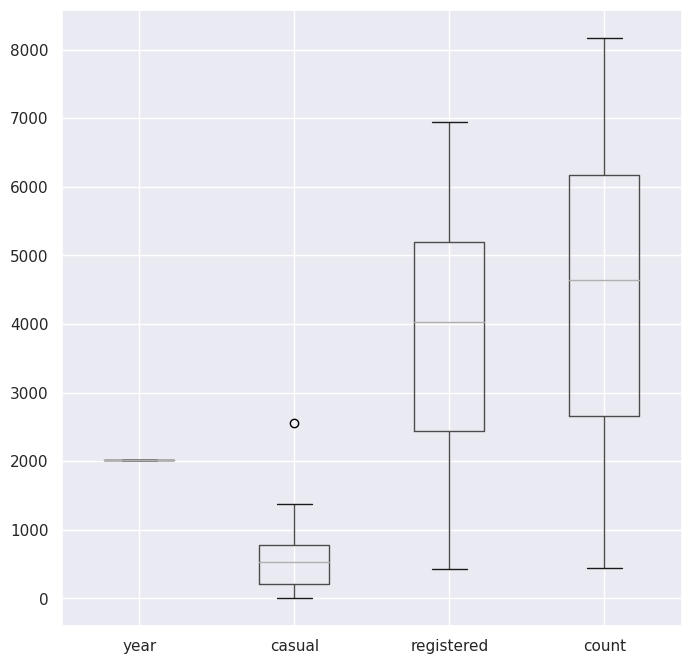

In [ ]:
wednesday_df.boxplot( figsize=(8, 8))
plt.show()

Casual: outlier identified

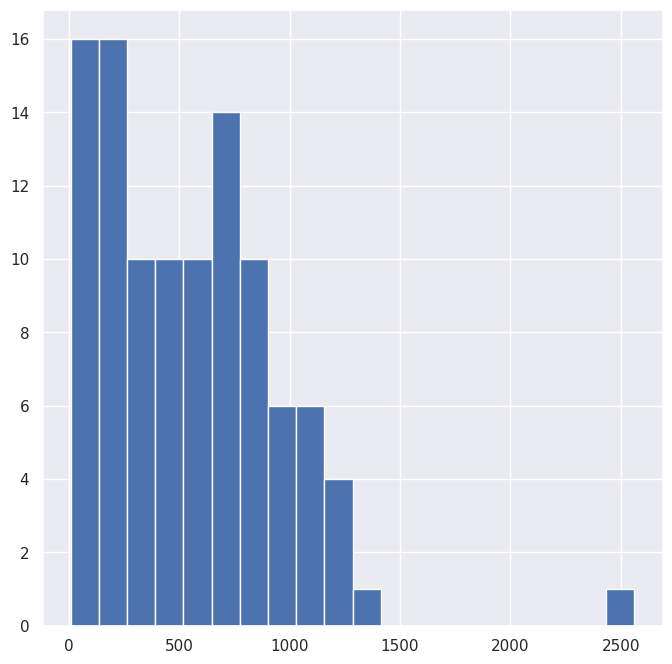

In [ ]:
wednesday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Wednesday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

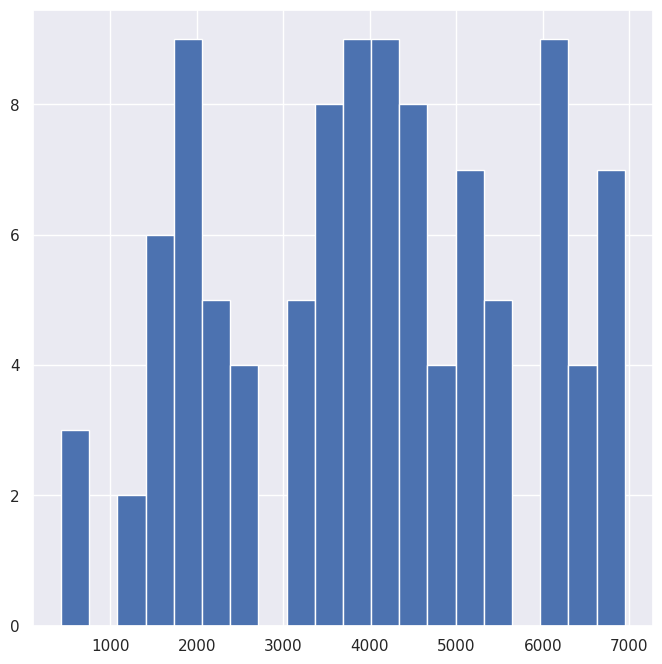

In [ ]:
wednesday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Wednesday (2011-2012) is left-skewed distribution or most of the data population is concentrated on the right.

In [ ]:
print("casual range: ", wednesday_df.casual.max() - wednesday_df.casual.min())
print("casual iqr: ", np.percentile(wednesday_df.casual, 75) - np.percentile(wednesday_df.casual, 25))
wednesday_casual_series = pd.Series(wednesday_df.casual)
print("casual skew:", wednesday_casual_series.skew())

print("registered range: ", wednesday_df.registered.max() - wednesday_df.registered.min())
print("registered iqr: ", np.percentile(wednesday_df.registered, 75) - np.percentile(wednesday_df.registered, 25))
wednesday_series = pd.Series(wednesday_df.registered)
print("registered skew:", wednesday_series.skew())



casual range:  2553
casual iqr:  569.75
casual skew: 1.3566838674920996
registered range:  6514
registered iqr:  2749.75
registered skew: -0.05784757362534403


In [ ]:
#Select Data in Thursday (Jan 2011 - Dec 2012)
thursday_df = daily_df.loc[(daily_df.weekday == "Thursday")]

thursday_df.head(15)

dteday     month  season  year   weekday  casual  registered  count
5   2011-01-06   January  Winter  2011  Thursday      88        1518   1606
12  2011-01-13   January  Winter  2011  Thursday      38        1368   1406
19  2011-01-20   January  Winter  2011  Thursday      83        1844   1927
26  2011-01-27   January  Winter  2011  Thursday      15         416    431
33  2011-02-03  February  Winter  2011  Thursday      61        1489   1550
40  2011-02-10  February  Winter  2011  Thursday      47        1491   1538
47  2011-02-17  February  Winter  2011  Thursday     259        2216   2475
54  2011-02-24  February  Winter  2011  Thursday     100        1707   1807
61  2011-03-03     March  Winter  2011  Thursday     123        1562   1685
68  2011-03-10     March  Winter  2011  Thursday      46         577    623
75  2011-03-17     March  Winter  2011  Thursday     424        2320   2744
82  2011-03-24     March  Spring  2011  Thursday     166        1699   1865
89  2011-03-31     March  Spring  2011  Thursday     179        1506   1685
96  2011-04-07     April  Spring  2011  Thursday     571        2570   3141
103 2011-04-14     April  Spring  2011  Thursday     529        2738   3267

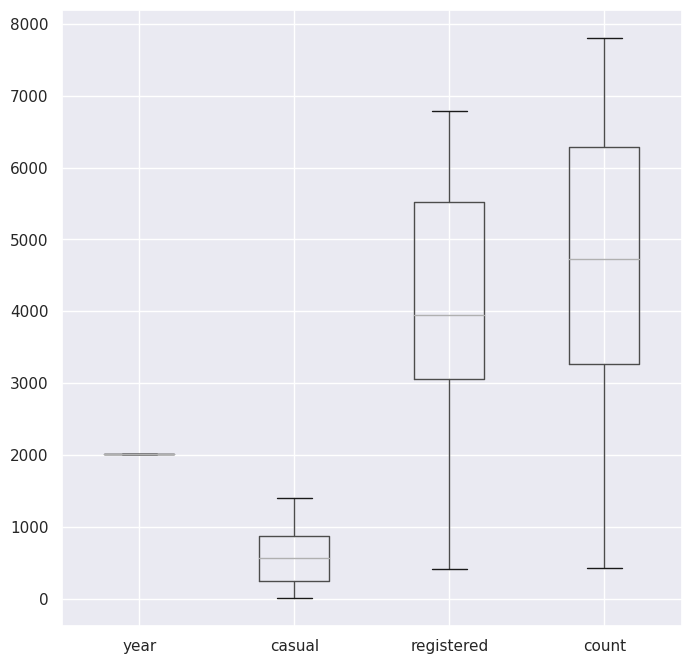

In [ ]:
thursday_df.boxplot( figsize=(8, 8))
plt.show()

In [ ]:
thursday_df.describe()

year       casual   registered        count
count   104.000000   104.000000   104.000000   104.000000
mean   2011.500000   590.961538  4076.298077  4667.259615
std       0.502421   371.680307  1642.753330  1939.433317
min    2011.000000    15.000000   416.000000   431.000000
25%    2011.000000   246.250000  3063.000000  3270.750000
50%    2011.500000   570.000000  3949.500000  4721.000000
75%    2012.000000   878.250000  5524.250000  6286.000000
max    2012.000000  1405.000000  6781.000000  7804.000000

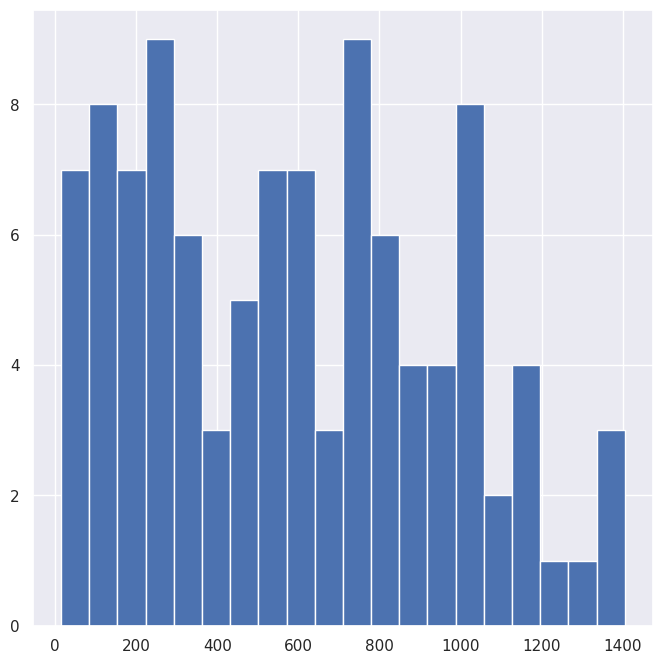

In [ ]:
thursday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Thursday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

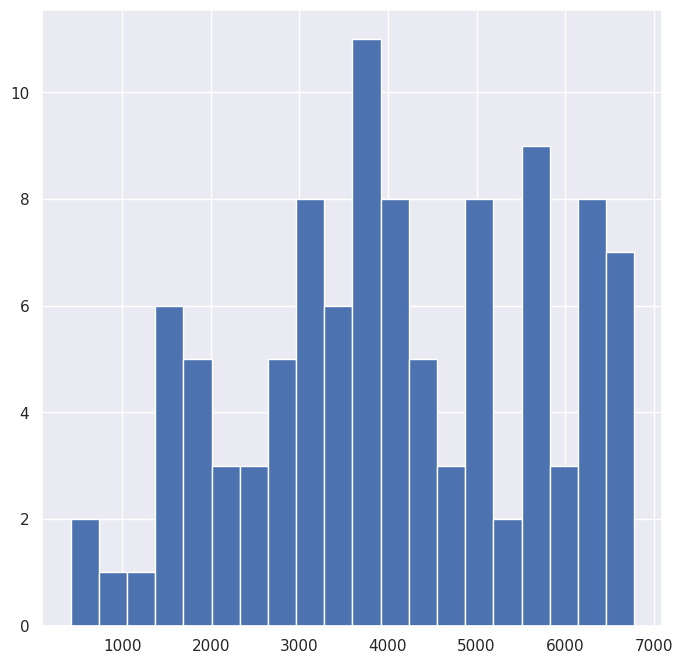

In [ ]:
thursday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Thursday (2011-2012) is left-skewed distribution or most of the data population is concentrated on the right.

In [ ]:
print("casual range: ", thursday_df.casual.max() - thursday_df.casual.min())
print("casual iqr: ", np.percentile(thursday_df.casual, 75) - np.percentile(thursday_df.casual, 25))
thursday_casual_series = pd.Series(thursday_df.casual)
print("casual skew:", thursday_casual_series.skew())

print("registered range: ", thursday_df.registered.max() - thursday_df.registered.min())
print("registered iqr: ", np.percentile(thursday_df.registered, 75) - np.percentile(thursday_df.registered, 25))
thursday_series = pd.Series(thursday_df.registered)
print("registered skew:", thursday_series.skew())



casual range:  1390
casual iqr:  632.0
casual skew: 0.26390992092716664
registered range:  6365
registered iqr:  2461.25
registered skew: -0.1611600101805675


In [ ]:
#Select Data in Friday (Jan 2011 - Dec 2012)
friday_df = daily_df.loc[(daily_df.weekday == "Friday")]

friday_df.head(15)

dteday     month  season  year weekday  casual  registered  count
6   2011-01-07   January  Winter  2011  Friday     148        1362   1510
13  2011-01-14   January  Winter  2011  Friday      54        1367   1421
20  2011-01-21   January  Winter  2011  Friday      75        1468   1543
27  2011-01-28   January  Winter  2011  Friday      38        1129   1167
34  2011-02-04  February  Winter  2011  Friday      88        1620   1708
41  2011-02-11  February  Winter  2011  Friday     149        1597   1746
48  2011-02-18  February  Winter  2011  Friday     579        2348   2927
55  2011-02-25  February  Winter  2011  Friday     120        1341   1461
62  2011-03-04     March  Winter  2011  Friday     214        1730   1944
69  2011-03-11     March  Winter  2011  Friday     247        1730   1977
76  2011-03-18     March  Winter  2011  Friday     884        2355   3239
83  2011-03-25     March  Spring  2011  Friday     300        1910   2210
90  2011-04-01     April  Spring  2011  Friday     307        1920   2227
97  2011-04-08     April  Spring  2011  Friday     172        1299   1471
104 2011-04-15     April  Spring  2011  Friday     642        2484   3126

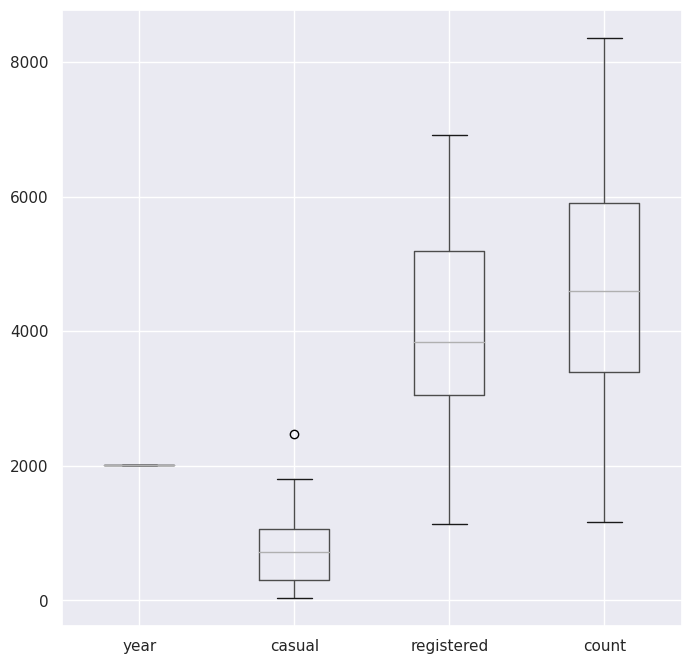

In [ ]:
friday_df.boxplot( figsize=(8, 8))
plt.show()

Casual: Outlier identified

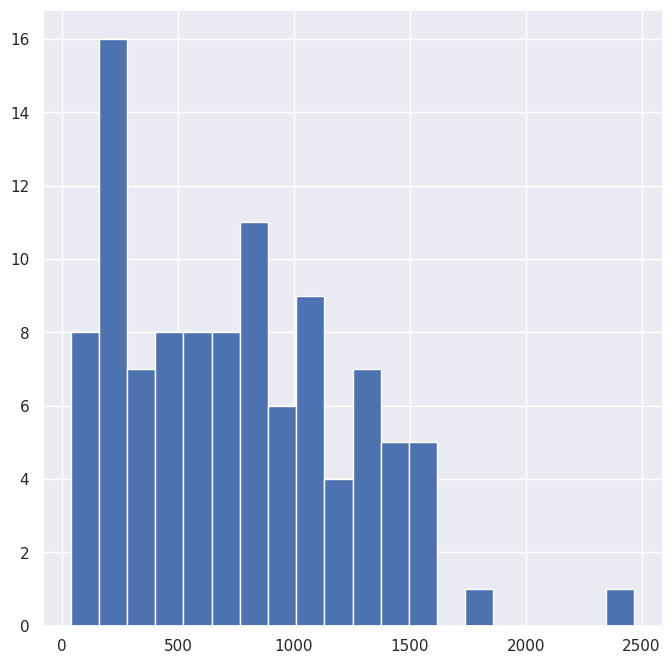

In [ ]:
friday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Friday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

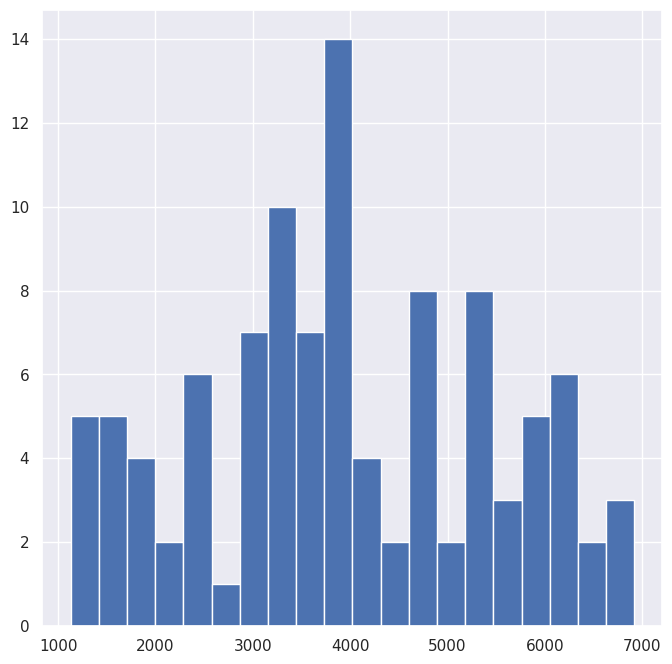

In [ ]:
friday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Friday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

In [ ]:
friday_df.describe()

year       casual   registered        count
count   104.000000   104.000000   104.000000   104.000000
mean   2011.500000   752.288462  3938.000000  4690.288462
std       0.502421   483.422400  1494.998698  1874.624870
min    2011.000000    38.000000  1129.000000  1167.000000
25%    2011.000000   307.000000  3046.000000  3390.750000
50%    2011.500000   725.500000  3835.500000  4601.500000
75%    2012.000000  1061.250000  5190.000000  5900.500000
max    2012.000000  2469.000000  6917.000000  8362.000000

In [ ]:
print("casual range: ", friday_df.casual.max() - friday_df.casual.min())
print("casual iqr: ", np.percentile(friday_df.casual, 75) - np.percentile(friday_df.casual, 25))
friday_casual_series = pd.Series(friday_df.casual)
print("casual skew:", friday_casual_series.skew())

print("registered range: ", friday_df.registered.max() - friday_df.registered.min())
print("registered iqr: ", np.percentile(friday_df.registered, 75) - np.percentile(friday_df.registered, 25))
friday_series = pd.Series(friday_df.registered)
print("registered skew:", friday_series.skew())



casual range:  2431
casual iqr:  754.25
casual skew: 0.6070497844001694
registered range:  5788
registered iqr:  2144.0
registered skew: 0.018974491331006236


In [ ]:
#Select Data in Saturday (Jan 2011 - Dec 2012)
saturday_df = daily_df.loc[(daily_df.weekday == "Saturday")]

saturday_df.head(15)

dteday     month  season  year   weekday  casual  registered  count
0  2011-01-01   January  Winter  2011  Saturday     331         654    985
7  2011-01-08   January  Winter  2011  Saturday      68         891    959
14 2011-01-15   January  Winter  2011  Saturday     222        1026   1248
21 2011-01-22   January  Winter  2011  Saturday      93         888    981
28 2011-01-29   January  Winter  2011  Saturday     123         975   1098
35 2011-02-05  February  Winter  2011  Saturday     100         905   1005
42 2011-02-12  February  Winter  2011  Saturday     288        1184   1472
49 2011-02-19  February  Winter  2011  Saturday     532        1103   1635
56 2011-02-26  February  Winter  2011  Saturday     424        1545   1969
63 2011-03-05     March  Winter  2011  Saturday     640        1437   2077
70 2011-03-12     March  Winter  2011  Saturday     724        1408   2132
77 2011-03-19     March  Winter  2011  Saturday    1424        1693   3117
84 2011-03-26     March  Spring  2011  Saturday     981        1515   2496
91 2011-04-02     April  Spring  2011  Saturday     898        1354   2252
98 2011-04-09     April  Spring  2011  Saturday     879        1576   2455

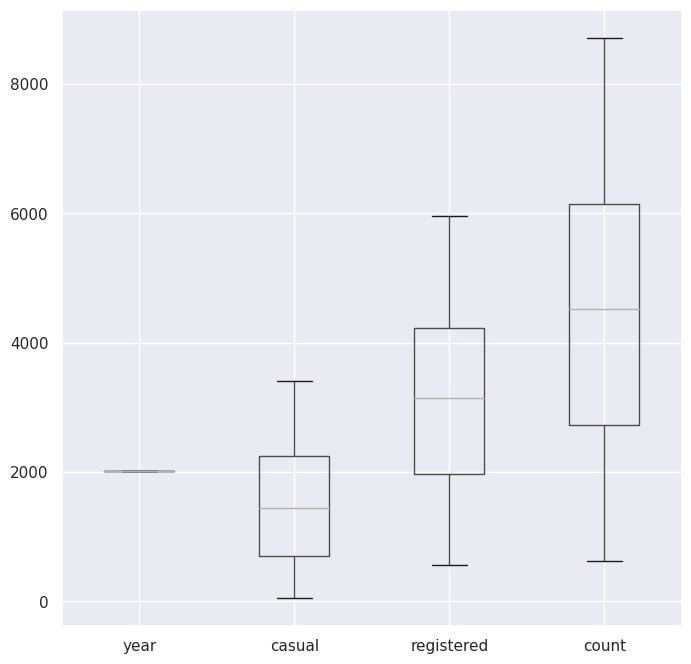

In [ ]:
saturday_df.boxplot( figsize=(8, 8))
plt.show()

In [ ]:
saturday_df.describe()

year       casual   registered        count
count   105.000000   105.000000   105.000000   105.000000
mean   2011.495238  1465.257143  3085.285714  4550.542857
std       0.502375   927.082884  1358.068784  2196.693009
min    2011.000000    57.000000   570.000000   627.000000
25%    2011.000000   706.000000  1977.000000  2732.000000
50%    2011.000000  1448.000000  3150.000000  4521.000000
75%    2012.000000  2247.000000  4232.000000  6140.000000
max    2012.000000  3410.000000  5966.000000  8714.000000

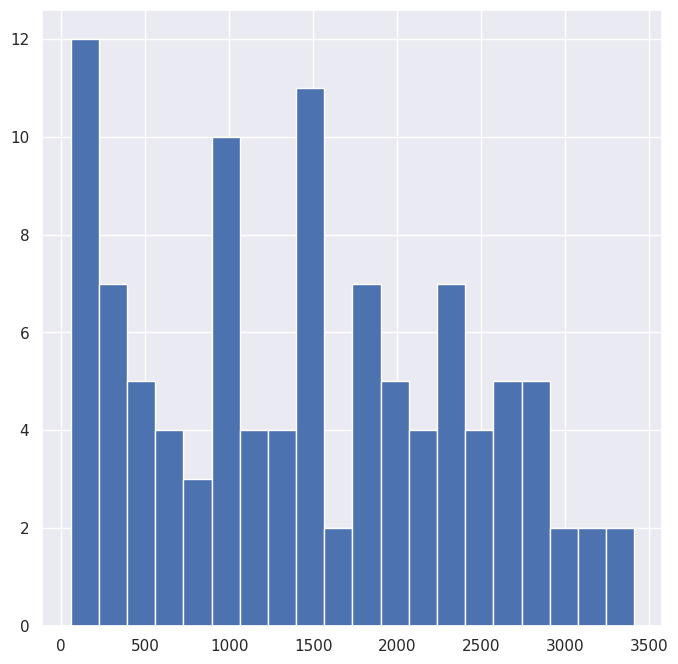

In [ ]:
saturday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Saturday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

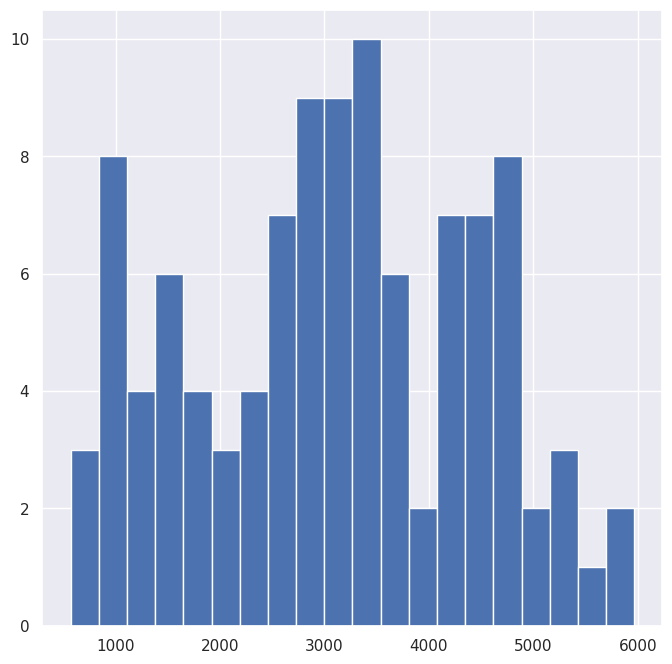

In [ ]:
saturday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Saturday (2011-2012) is left-skewed distribution or most of the data population is concentrated on the right.

In [ ]:
print("casual range: ", saturday_df.casual.max() - saturday_df.casual.min())
print("casual iqr: ", np.percentile(saturday_df.casual, 75) - np.percentile(saturday_df.casual, 25))
saturday_casual_series = pd.Series(saturday_df.casual)
print("casual skew:", saturday_casual_series.skew())

print("registered range: ", saturday_df.registered.max() - saturday_df.registered.min())
print("registered iqr: ", np.percentile(saturday_df.registered, 75) - np.percentile(saturday_df.registered, 25))
saturday_series = pd.Series(saturday_df.registered)
print("registered skew:", saturday_series.skew())



casual range:  3353
casual iqr:  1541.0
casual skew: 0.15999983734501386
registered range:  5396
registered iqr:  2255.0
registered skew: -0.04446073553031895


In [ ]:
#Select Data in Sunday (Jan 2011 - Dec 2012)
sunday_df = daily_df.loc[(daily_df.weekday == "Sunday")]

sunday_df.head(15)

dteday     month  season  year weekday  casual  registered  count
1  2011-01-02   January  Winter  2011  Sunday     131         670    801
8  2011-01-09   January  Winter  2011  Sunday      54         768    822
15 2011-01-16   January  Winter  2011  Sunday     251         953   1204
22 2011-01-23   January  Winter  2011  Sunday     150         836    986
29 2011-01-30   January  Winter  2011  Sunday     140         956   1096
36 2011-02-06  February  Winter  2011  Sunday     354        1269   1623
43 2011-02-13  February  Winter  2011  Sunday     397        1192   1589
50 2011-02-20  February  Winter  2011  Sunday     639        1173   1812
57 2011-02-27  February  Winter  2011  Sunday     694        1708   2402
64 2011-03-06     March  Winter  2011  Sunday     114         491    605
71 2011-03-13     March  Winter  2011  Sunday     982        1435   2417
78 2011-03-20     March  Winter  2011  Sunday    1047        1424   2471
85 2011-03-27     March  Spring  2011  Sunday     472        1221   1693
92 2011-04-03     April  Spring  2011  Sunday    1651        1598   3249
99 2011-04-10     April  Spring  2011  Sunday    1188        1707   2895

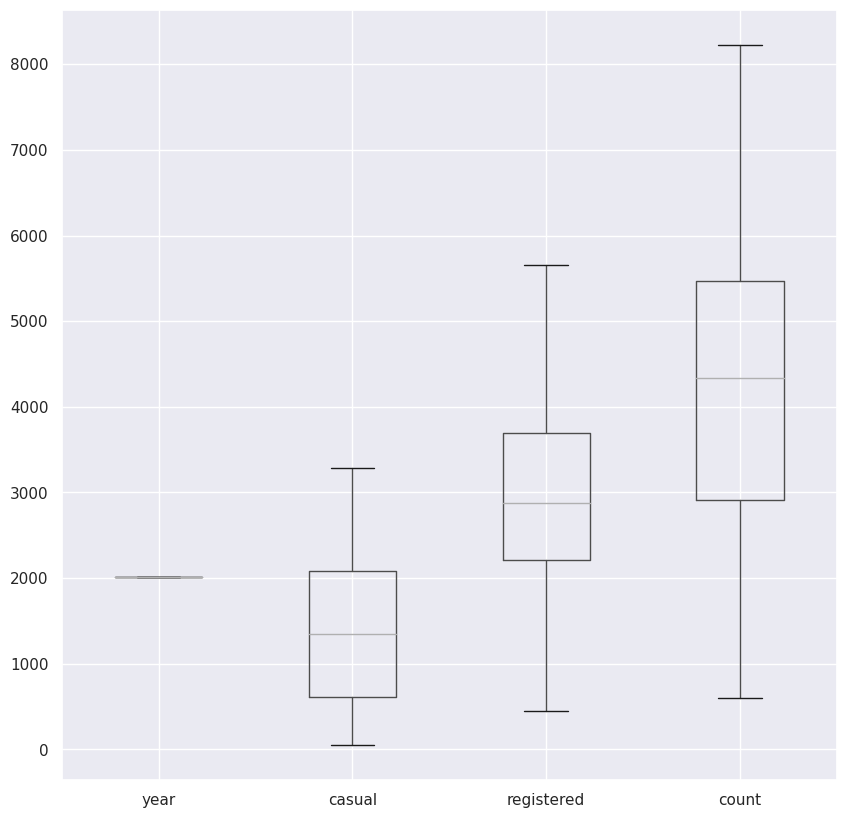

In [ ]:
sunday_df.boxplot( figsize=(10, 10))
plt.show()

In [ ]:
sunday_df.describe()

year       casual   registered        count
count   105.000000   105.000000   105.000000   105.000000
mean   2011.504762  1338.295238  2890.533333  4228.828571
std       0.502375   809.324777  1179.713036  1872.496629
min    2011.000000    54.000000   451.000000   605.000000
25%    2011.000000   618.000000  2211.000000  2918.000000
50%    2012.000000  1353.000000  2874.000000  4334.000000
75%    2012.000000  2080.000000  3694.000000  5464.000000
max    2012.000000  3283.000000  5657.000000  8227.000000

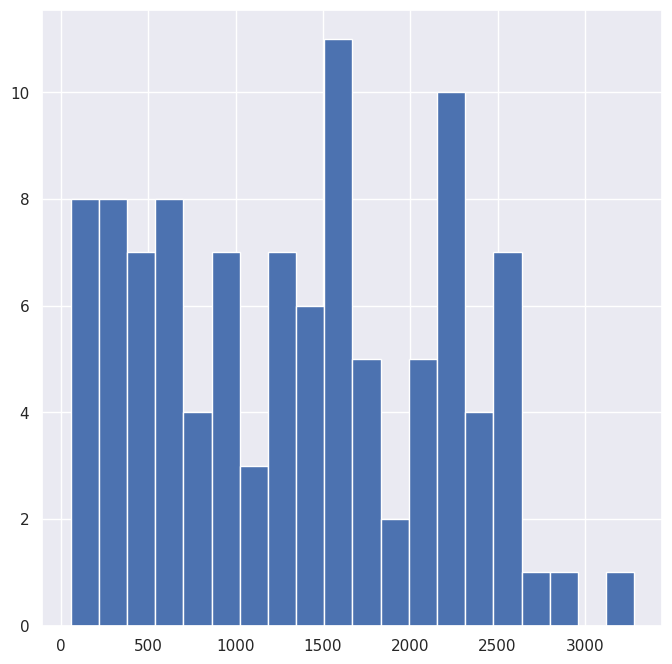

In [ ]:
sunday_df.casual.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by casual on Sunday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

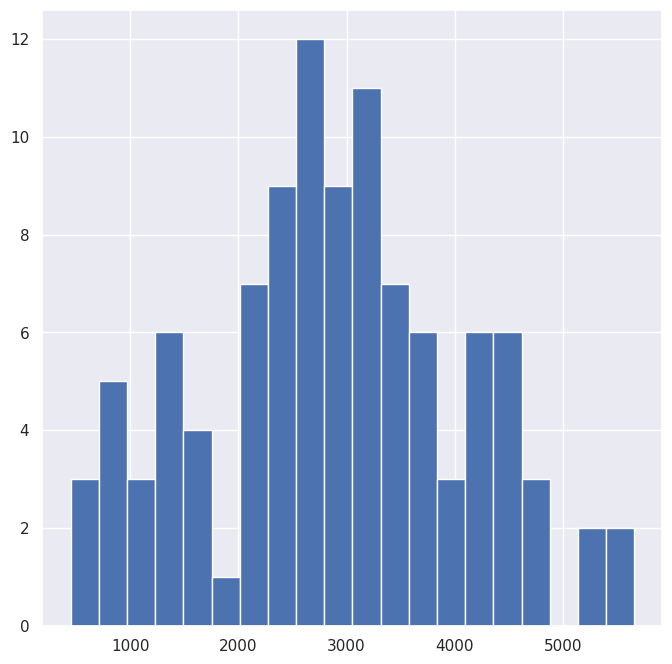

In [ ]:
sunday_df.registered.hist(bins=20, figsize=(8, 8))
plt.show()

Interpretation: Distribution number of rentals by registered on Sunday (2011-2012) is right-skewed distribution or most of the data population is concentrated on the left.

In [ ]:
print("casual range: ", sunday_df.casual.max() - sunday_df.casual.min())
print("casual iqr: ", np.percentile(sunday_df.casual, 75) - np.percentile(sunday_df.casual, 25))
sunday_casual_series = pd.Series(sunday_df.casual)
print("casual skew:", sunday_casual_series.skew())

print("registered range: ", sunday_df.registered.max() - sunday_df.registered.min())
print("registered iqr: ", np.percentile(sunday_df.registered, 75) - np.percentile(sunday_df.registered, 25))
sunday_series = pd.Series(sunday_df.registered)
print("registered skew:", sunday_series.skew())



casual range:  3229
casual iqr:  1462.0
casual skew: 0.1475327262989298
registered range:  5206
registered iqr:  1483.0
registered skew: 0.013448803891824642


### Question 2: What is the highest and lowest rental amount each month?

In [ ]:
#Select Data in January 2011
jan11_df = daily_df.loc[(daily_df.month == "January") & (daily_df.year == 2011)]

jan11_df

dteday    month  season  year    weekday  casual  registered  count
0  2011-01-01  January  Winter  2011   Saturday     331         654    985
1  2011-01-02  January  Winter  2011     Sunday     131         670    801
2  2011-01-03  January  Winter  2011     Monday     120        1229   1349
3  2011-01-04  January  Winter  2011    Tuesday     108        1454   1562
4  2011-01-05  January  Winter  2011  Wednesday      82        1518   1600
5  2011-01-06  January  Winter  2011   Thursday      88        1518   1606
6  2011-01-07  January  Winter  2011     Friday     148        1362   1510
7  2011-01-08  January  Winter  2011   Saturday      68         891    959
8  2011-01-09  January  Winter  2011     Sunday      54         768    822
9  2011-01-10  January  Winter  2011     Monday      41        1280   1321
10 2011-01-11  January  Winter  2011    Tuesday      43        1220   1263
11 2011-01-12  January  Winter  2011  Wednesday      25        1137   1162
12 2011-01-13  January  Winter  2011   Thursday      38        1368   1406
13 2011-01-14  January  Winter  2011     Friday      54        1367   1421
14 2011-01-15  January  Winter  2011   Saturday     222        1026   1248
15 2011-01-16  January  Winter  2011     Sunday     251         953   1204
16 2011-01-17  January  Winter  2011     Monday     117         883   1000
17 2011-01-18  January  Winter  2011    Tuesday       9         674    683
18 2011-01-19  January  Winter  2011  Wednesday      78        1572   1650
19 2011-01-20  January  Winter  2011   Thursday      83        1844   1927
20 2011-01-21  January  Winter  2011     Friday      75        1468   1543
21 2011-01-22  January  Winter  2011   Saturday      93         888    981
22 2011-01-23  January  Winter  2011     Sunday     150         836    986
23 2011-01-24  January  Winter  2011     Monday      86        1330   1416
24 2011-01-25  January  Winter  2011    Tuesday     186        1799   1985
25 2011-01-26  January  Winter  2011  Wednesday      34         472    506
26 2011-01-27  January  Winter  2011   Thursday      15         416    431
27 2011-01-28  January  Winter  2011     Friday      38        1129   1167
28 2011-01-29  January  Winter  2011   Saturday     123         975   1098
29 2011-01-30  January  Winter  2011     Sunday     140         956   1096
30 2011-01-31  January  Winter  2011     Monday      42        1459   1501

In [ ]:
print("casual min: ", jan11_df.casual.min())
print("casual max: ", jan11_df.casual.max())

print("registered min: ", jan11_df.registered.min())
print("registered max: ", jan11_df.registered.max())

casual min:  9
casual max:  331
registered min:  416
registered max:  1844


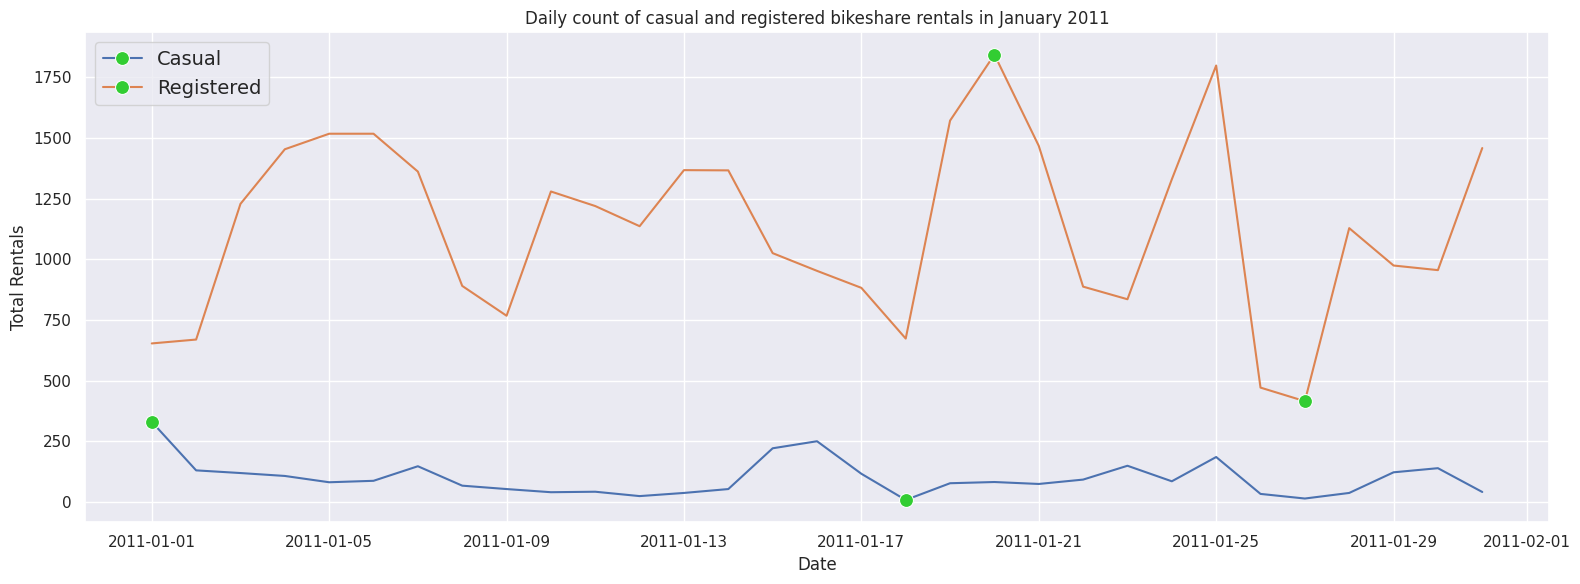

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=jan11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 17])
sns.lineplot(x="dteday", y="registered", data=jan11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[19, 26])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals in January 2011")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 9 on Tuesday, January 18 2011 (working day) in the winter season

The highest number of rentals with casual status was 331 on Saturday, January 1 2011 (weekend) in the winter season

The lowest number of rentals with registered status was 416 on Thursday, January 27 2011 (working day) in the winter season

The highest number of rentals with registered status was 1844 on Thursday, January 20 2011 (working day) in the winter season

In [ ]:
#Select Data in February 2011
feb11_df = daily_df.loc[(daily_df.month == "February") & (daily_df.year == 2011)]

feb11_df

dteday     month  season  year    weekday  casual  registered  count
31 2011-02-01  February  Winter  2011    Tuesday      47        1313   1360
32 2011-02-02  February  Winter  2011  Wednesday      72        1454   1526
33 2011-02-03  February  Winter  2011   Thursday      61        1489   1550
34 2011-02-04  February  Winter  2011     Friday      88        1620   1708
35 2011-02-05  February  Winter  2011   Saturday     100         905   1005
36 2011-02-06  February  Winter  2011     Sunday     354        1269   1623
37 2011-02-07  February  Winter  2011     Monday     120        1592   1712
38 2011-02-08  February  Winter  2011    Tuesday      64        1466   1530
39 2011-02-09  February  Winter  2011  Wednesday      53        1552   1605
40 2011-02-10  February  Winter  2011   Thursday      47        1491   1538
41 2011-02-11  February  Winter  2011     Friday     149        1597   1746
42 2011-02-12  February  Winter  2011   Saturday     288        1184   1472
43 2011-02-13  February  Winter  2011     Sunday     397        1192   1589
44 2011-02-14  February  Winter  2011     Monday     208        1705   1913
45 2011-02-15  February  Winter  2011    Tuesday     140        1675   1815
46 2011-02-16  February  Winter  2011  Wednesday     218        1897   2115
47 2011-02-17  February  Winter  2011   Thursday     259        2216   2475
48 2011-02-18  February  Winter  2011     Friday     579        2348   2927
49 2011-02-19  February  Winter  2011   Saturday     532        1103   1635
50 2011-02-20  February  Winter  2011     Sunday     639        1173   1812
51 2011-02-21  February  Winter  2011     Monday     195         912   1107
52 2011-02-22  February  Winter  2011    Tuesday      74        1376   1450
53 2011-02-23  February  Winter  2011  Wednesday     139        1778   1917
54 2011-02-24  February  Winter  2011   Thursday     100        1707   1807
55 2011-02-25  February  Winter  2011     Friday     120        1341   1461
56 2011-02-26  February  Winter  2011   Saturday     424        1545   1969
57 2011-02-27  February  Winter  2011     Sunday     694        1708   2402
58 2011-02-28  February  Winter  2011     Monday      81        1365   1446

In [ ]:
print("casual min: ", feb11_df.casual.min())
print("casual max: ", feb11_df.casual.max())

print("registered min: ", feb11_df.registered.min())
print("registered max: ", feb11_df.registered.max())

casual min:  47
casual max:  694
registered min:  905
registered max:  2348


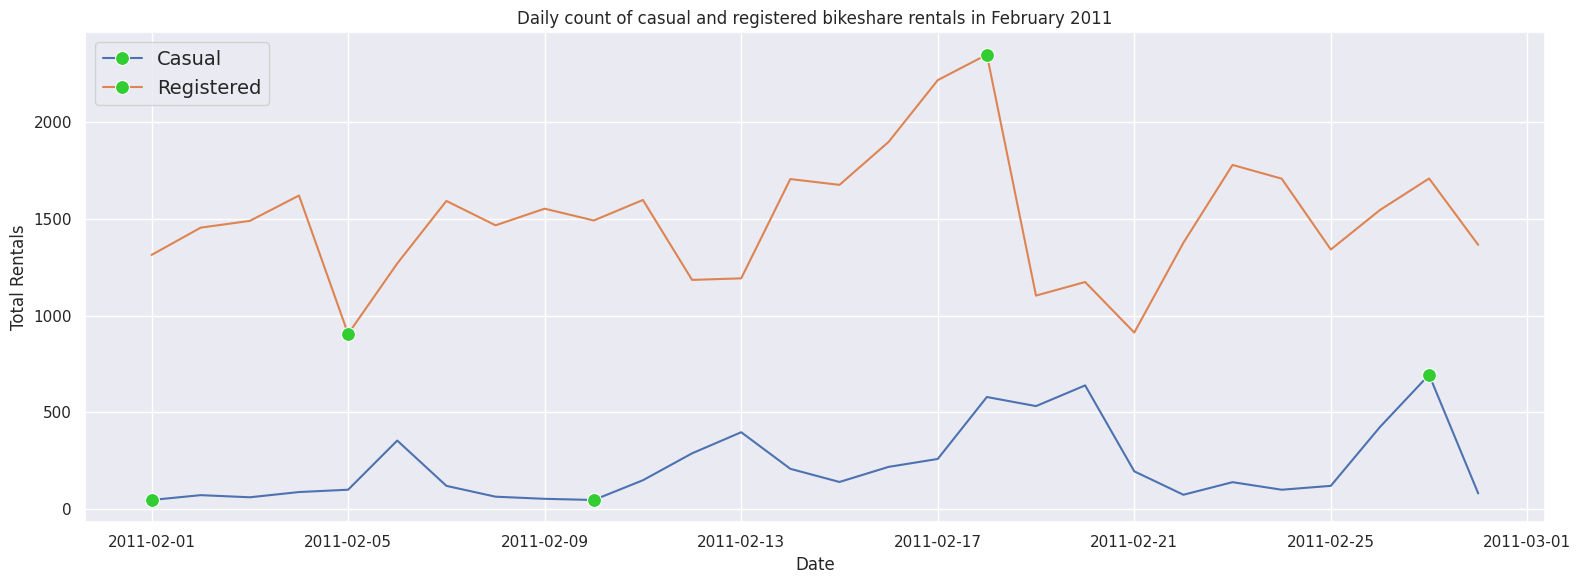

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=feb11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 9, 26])
sns.lineplot(x="dteday", y="registered", data=feb11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[4, 17])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals in February 2011")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 47 on Thursday, February 10 2011 (working day) in the winter season

The highest number of rentals with casual status was 694 on Sunday, February 27 2011 (weekend) in the winter season

The lowest number of rentals with registered status was 905 on Saturday, February 5 2011 (weekend) in the winter season

The highest number of rentals with registered status was 2348 on Friday, February 18 2011 (working day) in the winter season

In [ ]:
#Select data in March 2011
march11_df = daily_df.loc[(daily_df.month == "March") & (daily_df.year == 2011)]

march11_df

dteday  month  season  year    weekday  casual  registered  count
59 2011-03-01  March  Winter  2011    Tuesday     137        1714   1851
60 2011-03-02  March  Winter  2011  Wednesday     231        1903   2134
61 2011-03-03  March  Winter  2011   Thursday     123        1562   1685
62 2011-03-04  March  Winter  2011     Friday     214        1730   1944
63 2011-03-05  March  Winter  2011   Saturday     640        1437   2077
64 2011-03-06  March  Winter  2011     Sunday     114         491    605
65 2011-03-07  March  Winter  2011     Monday     244        1628   1872
66 2011-03-08  March  Winter  2011    Tuesday     316        1817   2133
67 2011-03-09  March  Winter  2011  Wednesday     191        1700   1891
68 2011-03-10  March  Winter  2011   Thursday      46         577    623
69 2011-03-11  March  Winter  2011     Friday     247        1730   1977
70 2011-03-12  March  Winter  2011   Saturday     724        1408   2132
71 2011-03-13  March  Winter  2011     Sunday     982        1435   2417
72 2011-03-14  March  Winter  2011     Monday     359        1687   2046
73 2011-03-15  March  Winter  2011    Tuesday     289        1767   2056
74 2011-03-16  March  Winter  2011  Wednesday     321        1871   2192
75 2011-03-17  March  Winter  2011   Thursday     424        2320   2744
76 2011-03-18  March  Winter  2011     Friday     884        2355   3239
77 2011-03-19  March  Winter  2011   Saturday    1424        1693   3117
78 2011-03-20  March  Winter  2011     Sunday    1047        1424   2471
79 2011-03-21  March  Spring  2011     Monday     401        1676   2077
80 2011-03-22  March  Spring  2011    Tuesday     460        2243   2703
81 2011-03-23  March  Spring  2011  Wednesday     203        1918   2121
82 2011-03-24  March  Spring  2011   Thursday     166        1699   1865
83 2011-03-25  March  Spring  2011     Friday     300        1910   2210
84 2011-03-26  March  Spring  2011   Saturday     981        1515   2496
85 2011-03-27  March  Spring  2011     Sunday     472        1221   1693
86 2011-03-28  March  Spring  2011     Monday     222        1806   2028
87 2011-03-29  March  Spring  2011    Tuesday     317        2108   2425
88 2011-03-30  March  Spring  2011  Wednesday     168        1368   1536
89 2011-03-31  March  Spring  2011   Thursday     179        1506   1685

In [ ]:
print("casual min: ", march11_df.casual.min())
print("casual max: ", march11_df.casual.max())

print("registered min: ", march11_df.registered.min())
print("registered max: ", march11_df.registered.max())

casual min:  46
casual max:  1424
registered min:  491
registered max:  2355


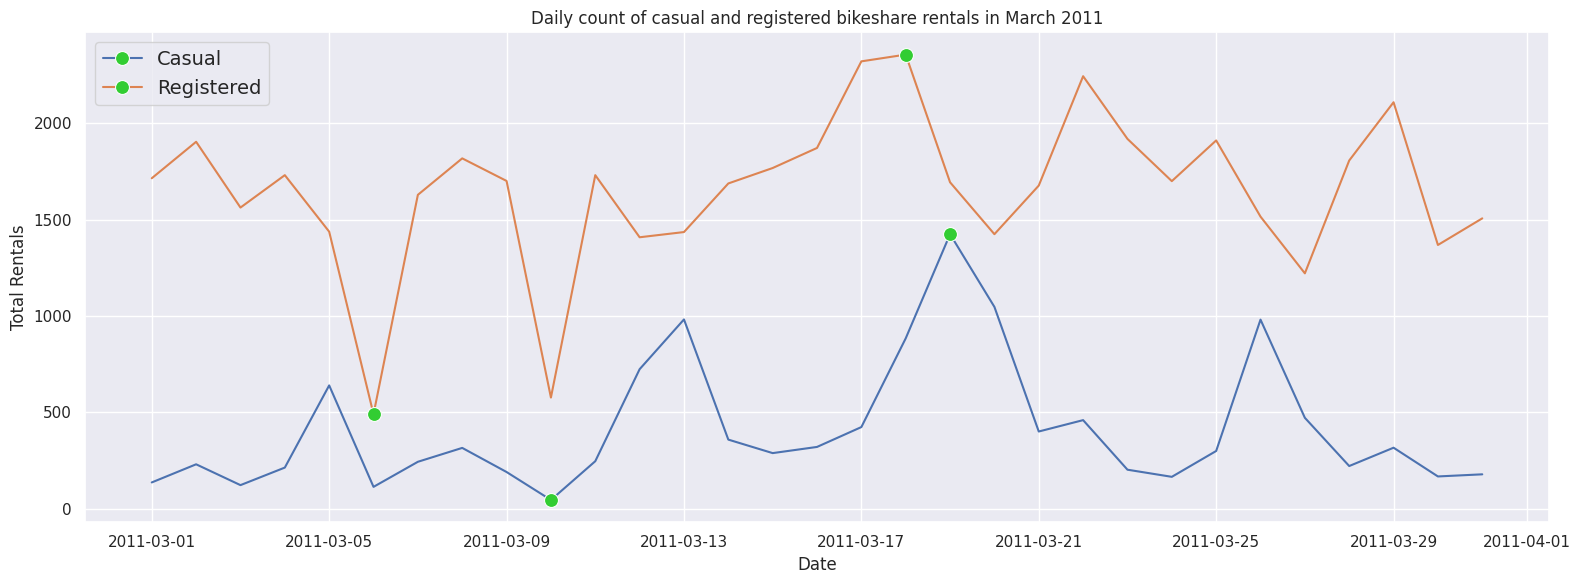

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=march11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[9, 18])
sns.lineplot(x="dteday", y="registered", data=march11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[5, 17])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals in March 2011")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()

plt.show()

Insight:

The lowest number of rentals with casual status was 46 on Thursday, March 10 2011 (working day) in the winter season

The highest number of rentals with casual status was 1424 on Saturday, March 19 2011 (weekend) in the late winter season

The lowest number of rentals with registered status was 491 on Sunday, March 6 2011 (weekend) in the winter season

The highest number of rentals with registered status was 2355 on Friday, March 18 2011 (working day) in the late winter season

In [ ]:
#Select data in April 2011
april11_df = daily_df.loc[(daily_df.month == "April") & (daily_df.year == 2011)]

april11_df

dteday  month  season  year    weekday  casual  registered  count
90  2011-04-01  April  Spring  2011     Friday     307        1920   2227
91  2011-04-02  April  Spring  2011   Saturday     898        1354   2252
92  2011-04-03  April  Spring  2011     Sunday    1651        1598   3249
93  2011-04-04  April  Spring  2011     Monday     734        2381   3115
94  2011-04-05  April  Spring  2011    Tuesday     167        1628   1795
95  2011-04-06  April  Spring  2011  Wednesday     413        2395   2808
96  2011-04-07  April  Spring  2011   Thursday     571        2570   3141
97  2011-04-08  April  Spring  2011     Friday     172        1299   1471
98  2011-04-09  April  Spring  2011   Saturday     879        1576   2455
99  2011-04-10  April  Spring  2011     Sunday    1188        1707   2895
100 2011-04-11  April  Spring  2011     Monday     855        2493   3348
101 2011-04-12  April  Spring  2011    Tuesday     257        1777   2034
102 2011-04-13  April  Spring  2011  Wednesday     209        1953   2162
103 2011-04-14  April  Spring  2011   Thursday     529        2738   3267
104 2011-04-15  April  Spring  2011     Friday     642        2484   3126
105 2011-04-16  April  Spring  2011   Saturday     121         674    795
106 2011-04-17  April  Spring  2011     Sunday    1558        2186   3744
107 2011-04-18  April  Spring  2011     Monday     669        2760   3429
108 2011-04-19  April  Spring  2011    Tuesday     409        2795   3204
109 2011-04-20  April  Spring  2011  Wednesday     613        3331   3944
110 2011-04-21  April  Spring  2011   Thursday     745        3444   4189
111 2011-04-22  April  Spring  2011     Friday     177        1506   1683
112 2011-04-23  April  Spring  2011   Saturday    1462        2574   4036
113 2011-04-24  April  Spring  2011     Sunday    1710        2481   4191
114 2011-04-25  April  Spring  2011     Monday     773        3300   4073
115 2011-04-26  April  Spring  2011    Tuesday     678        3722   4400
116 2011-04-27  April  Spring  2011  Wednesday     547        3325   3872
117 2011-04-28  April  Spring  2011   Thursday     569        3489   4058
118 2011-04-29  April  Spring  2011     Friday     878        3717   4595
119 2011-04-30  April  Spring  2011   Saturday    1965        3347   5312

In [ ]:
print("casual min: ", april11_df.casual.min())
print("casual max: ", april11_df.casual.max())

print("registered min: ", april11_df.registered.min())
print("registered max: ", april11_df.registered.max())

casual min:  121
casual max:  1965
registered min:  674
registered max:  3722


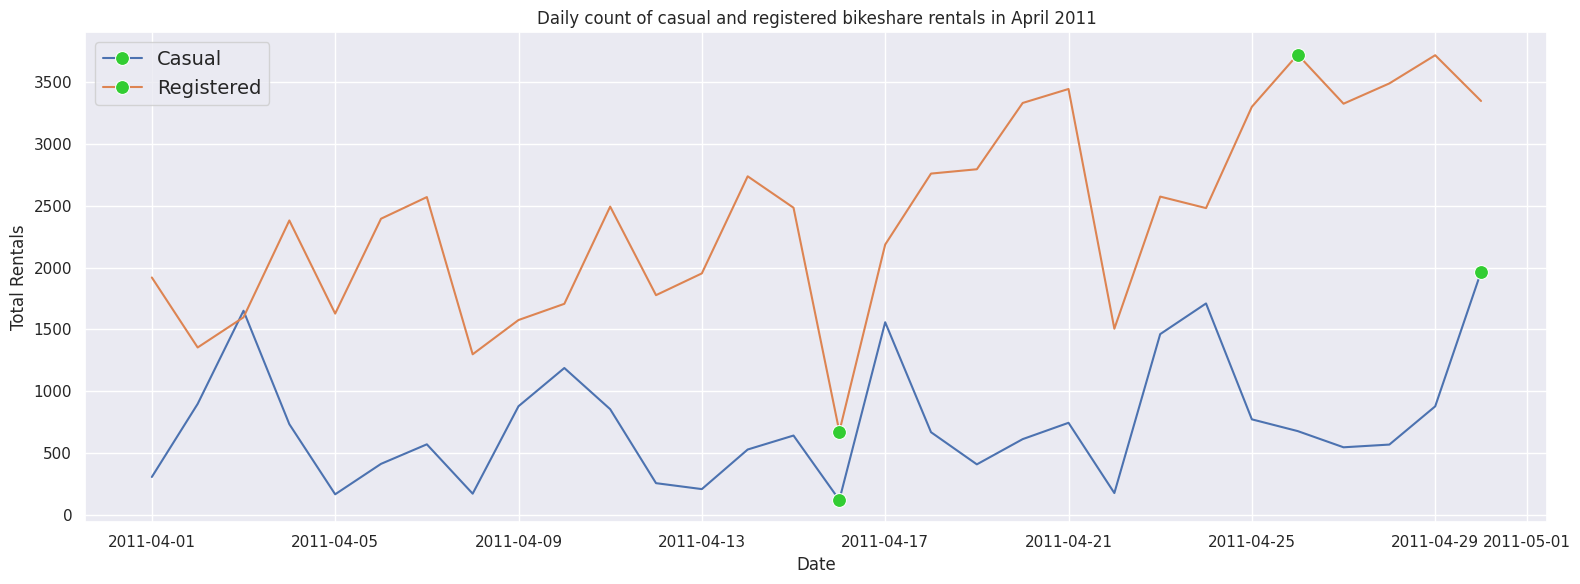

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=april11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[15, 29])
sns.lineplot(x="dteday", y="registered", data=april11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[15, 25])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals in April 2011")

# Add a legend to the plot at upper left
plt.legend(loc='upper left', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 121 on Saturday, April 16 2011 (weekend) in the spring season

The highest number of rentals with casual status was 1965 on Saturday, April 30 2011 (weekend) in the spring season

The lowest number of rentals with registered status was 674 on Saturday, April 16 2011 (weekend) in the spring season

The highest number of rentals with registered status was 3722 on Tuesday, April 26 2011 (working day) in the spring season

In [ ]:
#Select Data in May 2011
may11_df = daily_df.loc[(daily_df.month == "May") & (daily_df.year == 2011)]

may11_df

dteday month  season  year    weekday  casual  registered  count
120 2011-05-01   May  Spring  2011     Sunday    1138        2213   3351
121 2011-05-02   May  Spring  2011     Monday     847        3554   4401
122 2011-05-03   May  Spring  2011    Tuesday     603        3848   4451
123 2011-05-04   May  Spring  2011  Wednesday     255        2378   2633
124 2011-05-05   May  Spring  2011   Thursday     614        3819   4433
125 2011-05-06   May  Spring  2011     Friday     894        3714   4608
126 2011-05-07   May  Spring  2011   Saturday    1612        3102   4714
127 2011-05-08   May  Spring  2011     Sunday    1401        2932   4333
128 2011-05-09   May  Spring  2011     Monday     664        3698   4362
129 2011-05-10   May  Spring  2011    Tuesday     694        4109   4803
130 2011-05-11   May  Spring  2011  Wednesday     550        3632   4182
131 2011-05-12   May  Spring  2011   Thursday     695        4169   4864
132 2011-05-13   May  Spring  2011     Friday     692        3413   4105
133 2011-05-14   May  Spring  2011   Saturday     902        2507   3409
134 2011-05-15   May  Spring  2011     Sunday    1582        2971   4553
135 2011-05-16   May  Spring  2011     Monday     773        3185   3958
136 2011-05-17   May  Spring  2011    Tuesday     678        3445   4123
137 2011-05-18   May  Spring  2011  Wednesday     536        3319   3855
138 2011-05-19   May  Spring  2011   Thursday     735        3840   4575
139 2011-05-20   May  Spring  2011     Friday     909        4008   4917
140 2011-05-21   May  Spring  2011   Saturday    2258        3547   5805
141 2011-05-22   May  Spring  2011     Sunday    1576        3084   4660
142 2011-05-23   May  Spring  2011     Monday     836        3438   4274
143 2011-05-24   May  Spring  2011    Tuesday     659        3833   4492
144 2011-05-25   May  Spring  2011  Wednesday     740        4238   4978
145 2011-05-26   May  Spring  2011   Thursday     758        3919   4677
146 2011-05-27   May  Spring  2011     Friday     871        3808   4679
147 2011-05-28   May  Spring  2011   Saturday    2001        2757   4758
148 2011-05-29   May  Spring  2011     Sunday    2355        2433   4788
149 2011-05-30   May  Spring  2011     Monday    1549        2549   4098
150 2011-05-31   May  Spring  2011    Tuesday     673        3309   3982

In [ ]:
print("casual min: ", may11_df.casual.min())
print("casual max: ", may11_df.casual.max())

print("registered min: ", may11_df.registered.min())
print("registered max: ", may11_df.registered.max())

casual min:  255
casual max:  2355
registered min:  2213
registered max:  4238


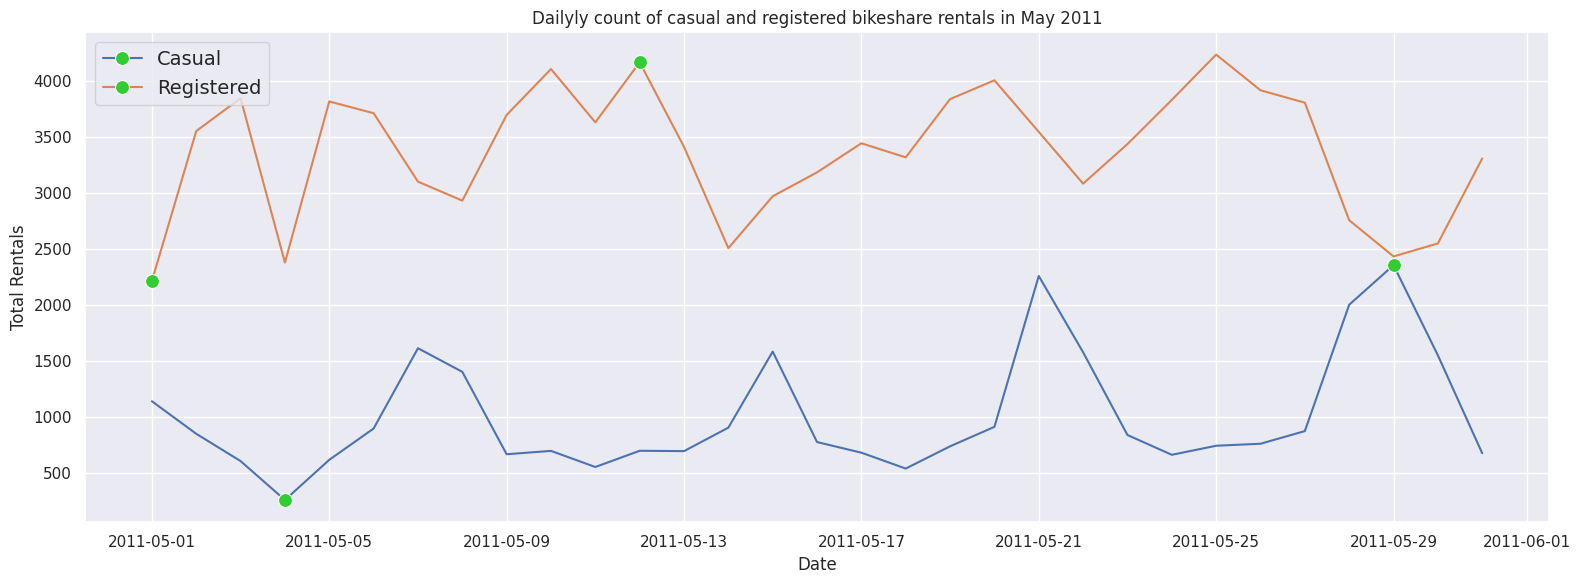

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=may11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[3, 28])
sns.lineplot(x="dteday", y="registered", data=may11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 11])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Dailyly count of casual and registered bikeshare rentals in May 2011")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 255 on Wednesday, May 4 2011 (working day) in the spring season

The highest number of rentals with casual status was 2355 on Sunday, May 29 2011 (weekend) in the late spring season

The lowest number of rentals with registered status was 2213 on Sunday, May 1 2011 (weekend) in the spring season

The highest number of rentals with registered status was 4238 on Wednesday, May 25 2011 (working day) in the late spring season

In [ ]:
#Select data in June 2011
june11_df = daily_df.loc[(daily_df.month == "June") & (daily_df.year == 2011)]

june11_df

dteday month  season  year    weekday  casual  registered  count
151 2011-06-01  June  Spring  2011  Wednesday     513        3461   3974
152 2011-06-02  June  Spring  2011   Thursday     736        4232   4968
153 2011-06-03  June  Spring  2011     Friday     898        4414   5312
154 2011-06-04  June  Spring  2011   Saturday    1869        3473   5342
155 2011-06-05  June  Spring  2011     Sunday    1685        3221   4906
156 2011-06-06  June  Spring  2011     Monday     673        3875   4548
157 2011-06-07  June  Spring  2011    Tuesday     763        4070   4833
158 2011-06-08  June  Spring  2011  Wednesday     676        3725   4401
159 2011-06-09  June  Spring  2011   Thursday     563        3352   3915
160 2011-06-10  June  Spring  2011     Friday     815        3771   4586
161 2011-06-11  June  Spring  2011   Saturday    1729        3237   4966
162 2011-06-12  June  Spring  2011     Sunday    1467        2993   4460
163 2011-06-13  June  Spring  2011     Monday     863        4157   5020
164 2011-06-14  June  Spring  2011    Tuesday     727        4164   4891
165 2011-06-15  June  Spring  2011  Wednesday     769        4411   5180
166 2011-06-16  June  Spring  2011   Thursday     545        3222   3767
167 2011-06-17  June  Spring  2011     Friday     863        3981   4844
168 2011-06-18  June  Spring  2011   Saturday    1807        3312   5119
169 2011-06-19  June  Spring  2011     Sunday    1639        3105   4744
170 2011-06-20  June  Spring  2011     Monday     699        3311   4010
171 2011-06-21  June  Summer  2011    Tuesday     774        4061   4835
172 2011-06-22  June  Summer  2011  Wednesday     661        3846   4507
173 2011-06-23  June  Summer  2011   Thursday     746        4044   4790
174 2011-06-24  June  Summer  2011     Friday     969        4022   4991
175 2011-06-25  June  Summer  2011   Saturday    1782        3420   5202
176 2011-06-26  June  Summer  2011     Sunday    1920        3385   5305
177 2011-06-27  June  Summer  2011     Monday     854        3854   4708
178 2011-06-28  June  Summer  2011    Tuesday     732        3916   4648
179 2011-06-29  June  Summer  2011  Wednesday     848        4377   5225
180 2011-06-30  June  Summer  2011   Thursday    1027        4488   5515

In [ ]:
print("casual min: ", june11_df.casual.min())
print("casual max: ", june11_df.casual.max())

print("registered min: ", june11_df.registered.min())
print("registered max: ", june11_df.registered.max())

casual min:  513
casual max:  1920
registered min:  2993
registered max:  4488


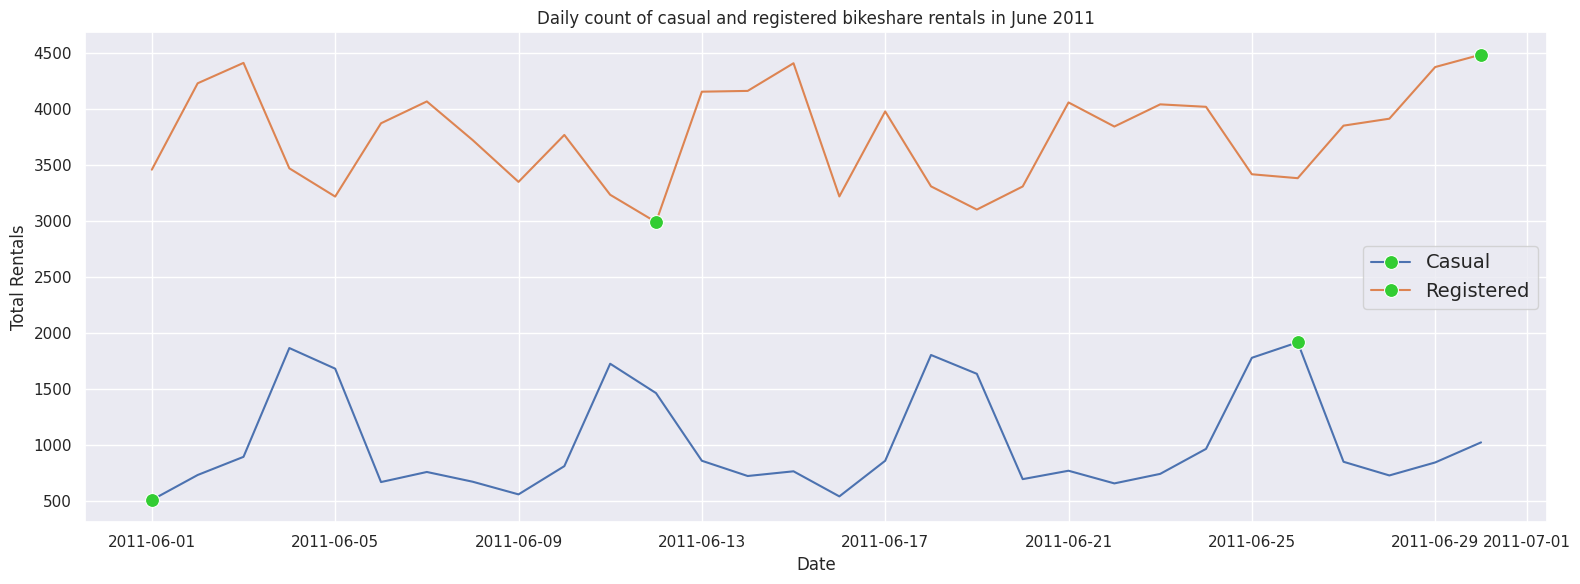

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=june11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 25])
sns.lineplot(x="dteday", y="registered", data=june11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[11, 29])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals in June 2011")

# Add a legend to the plot at center right
plt.legend(loc="center right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 513 on Wednesday, June 1 2011 (working day) in the spring season

The highest number of rentals with casual status was 1920 on Sunday, June 26 2011 (weekend) in the summer season

The lowest number of rentals with registered status was 2993 on Sunday, June 12 2011 (weekend) in the spring season

The highest number of rentals with registered status was 4488 on Thursday, June 31 2011 (working day) in the summer season

In [ ]:
#Select Data in July 2011

july11_df = daily_df.loc[(daily_df.month == "July") & (daily_df.year == 2011)]

july11_df

dteday month  season  year    weekday  casual  registered  count
181 2011-07-01  July  Summer  2011     Friday    1246        4116   5362
182 2011-07-02  July  Summer  2011   Saturday    2204        2915   5119
183 2011-07-03  July  Summer  2011     Sunday    2282        2367   4649
184 2011-07-04  July  Summer  2011     Monday    3065        2978   6043
185 2011-07-05  July  Summer  2011    Tuesday    1031        3634   4665
186 2011-07-06  July  Summer  2011  Wednesday     784        3845   4629
187 2011-07-07  July  Summer  2011   Thursday     754        3838   4592
188 2011-07-08  July  Summer  2011     Friday     692        3348   4040
189 2011-07-09  July  Summer  2011   Saturday    1988        3348   5336
190 2011-07-10  July  Summer  2011     Sunday    1743        3138   4881
191 2011-07-11  July  Summer  2011     Monday     723        3363   4086
192 2011-07-12  July  Summer  2011    Tuesday     662        3596   4258
193 2011-07-13  July  Summer  2011  Wednesday     748        3594   4342
194 2011-07-14  July  Summer  2011   Thursday     888        4196   5084
195 2011-07-15  July  Summer  2011     Friday    1318        4220   5538
196 2011-07-16  July  Summer  2011   Saturday    2418        3505   5923
197 2011-07-17  July  Summer  2011     Sunday    2006        3296   5302
198 2011-07-18  July  Summer  2011     Monday     841        3617   4458
199 2011-07-19  July  Summer  2011    Tuesday     752        3789   4541
200 2011-07-20  July  Summer  2011  Wednesday     644        3688   4332
201 2011-07-21  July  Summer  2011   Thursday     632        3152   3784
202 2011-07-22  July  Summer  2011     Friday     562        2825   3387
203 2011-07-23  July  Summer  2011   Saturday     987        2298   3285
204 2011-07-24  July  Summer  2011     Sunday    1050        2556   3606
205 2011-07-25  July  Summer  2011     Monday     568        3272   3840
206 2011-07-26  July  Summer  2011    Tuesday     750        3840   4590
207 2011-07-27  July  Summer  2011  Wednesday     755        3901   4656
208 2011-07-28  July  Summer  2011   Thursday     606        3784   4390
209 2011-07-29  July  Summer  2011     Friday     670        3176   3846
210 2011-07-30  July  Summer  2011   Saturday    1559        2916   4475
211 2011-07-31  July  Summer  2011     Sunday    1524        2778   4302

In [ ]:
print("casual min: ", july11_df.casual.min())
print("casual max: ", july11_df.casual.max())

print("registered min: ", july11_df.registered.min())
print("registered max: ", july11_df.registered.max())

casual min:  562
casual max:  3065
registered min:  2298
registered max:  4220


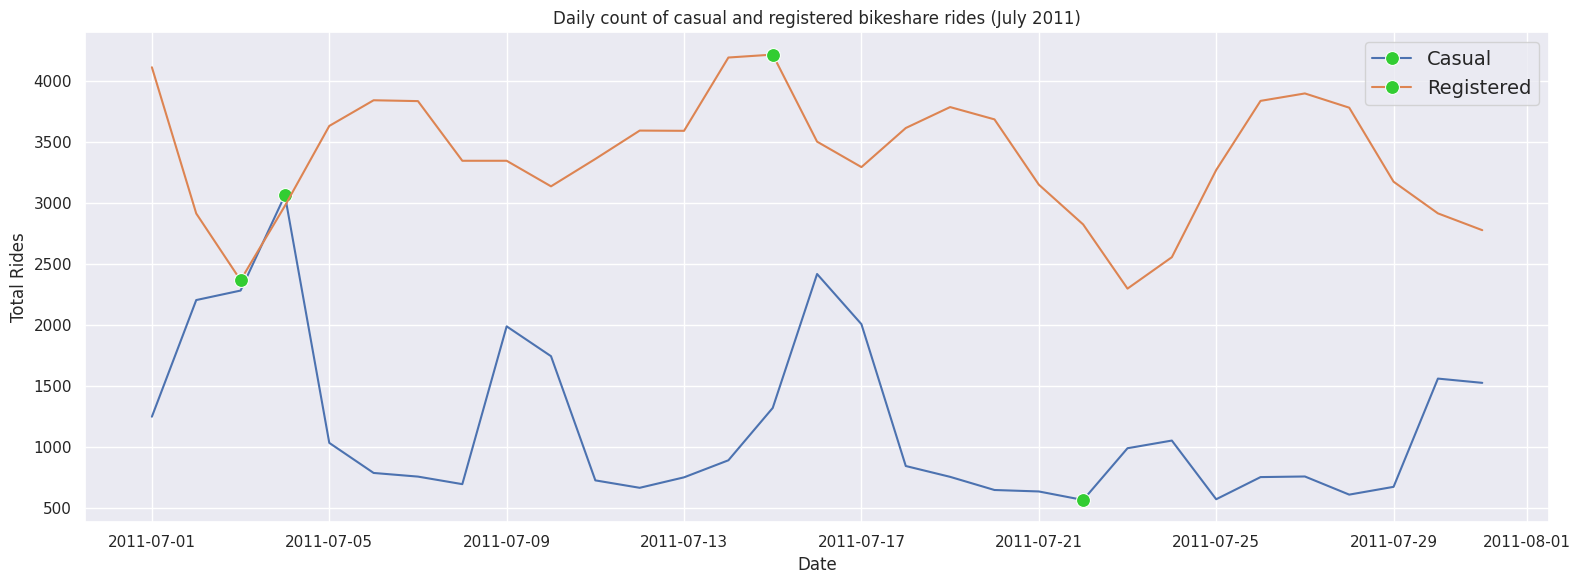

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=july11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[3, 21])
sns.lineplot(x="dteday", y="registered", data=july11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[2, 14])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Daily count of casual and registered bikeshare rides (July 2011)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 562 on Friday, July 22 2011 (working day) in the summer season

The highest number of rentals with casual status was 3065 on Monday, July 4 2011 in the summer season, coinciding with American Independence Day

The lowest number of rentals with registered status was 2298 on Saturday, July 23 2011 (weekend) in the summer season

The highest number of rentals with registered status was 4220 on Friday, July 15 2011 (working day) in the summer season

In [ ]:
#Select data in August 2011
aug11_df = daily_df.loc[(daily_df.month == "August") & (daily_df.year == 2011)]

aug11_df

dteday   month  season  year    weekday  casual  registered  count
212 2011-08-01  August  Summer  2011     Monday     729        3537   4266
213 2011-08-02  August  Summer  2011    Tuesday     801        4044   4845
214 2011-08-03  August  Summer  2011  Wednesday     467        3107   3574
215 2011-08-04  August  Summer  2011   Thursday     799        3777   4576
216 2011-08-05  August  Summer  2011     Friday    1023        3843   4866
217 2011-08-06  August  Summer  2011   Saturday    1521        2773   4294
218 2011-08-07  August  Summer  2011     Sunday    1298        2487   3785
219 2011-08-08  August  Summer  2011     Monday     846        3480   4326
220 2011-08-09  August  Summer  2011    Tuesday     907        3695   4602
221 2011-08-10  August  Summer  2011  Wednesday     884        3896   4780
222 2011-08-11  August  Summer  2011   Thursday     812        3980   4792
223 2011-08-12  August  Summer  2011     Friday    1051        3854   4905
224 2011-08-13  August  Summer  2011   Saturday    1504        2646   4150
225 2011-08-14  August  Summer  2011     Sunday    1338        2482   3820
226 2011-08-15  August  Summer  2011     Monday     775        3563   4338
227 2011-08-16  August  Summer  2011    Tuesday     721        4004   4725
228 2011-08-17  August  Summer  2011  Wednesday     668        4026   4694
229 2011-08-18  August  Summer  2011   Thursday     639        3166   3805
230 2011-08-19  August  Summer  2011     Friday     797        3356   4153
231 2011-08-20  August  Summer  2011   Saturday    1914        3277   5191
232 2011-08-21  August  Summer  2011     Sunday    1249        2624   3873
233 2011-08-22  August  Summer  2011     Monday     833        3925   4758
234 2011-08-23  August  Summer  2011    Tuesday    1281        4614   5895
235 2011-08-24  August  Summer  2011  Wednesday     949        4181   5130
236 2011-08-25  August  Summer  2011   Thursday     435        3107   3542
237 2011-08-26  August  Summer  2011     Friday     768        3893   4661
238 2011-08-27  August  Summer  2011   Saturday     226         889   1115
239 2011-08-28  August  Summer  2011     Sunday    1415        2919   4334
240 2011-08-29  August  Summer  2011     Monday     729        3905   4634
241 2011-08-30  August  Summer  2011    Tuesday     775        4429   5204
242 2011-08-31  August  Summer  2011  Wednesday     688        4370   5058

In [ ]:
print("casual min: ", aug11_df.casual.min())
print("casual max: ", aug11_df.casual.max())

print("registered min: ", aug11_df.registered.min())
print("registered max: ", aug11_df.registered.max())

casual min:  226
casual max:  1914
registered min:  889
registered max:  4614


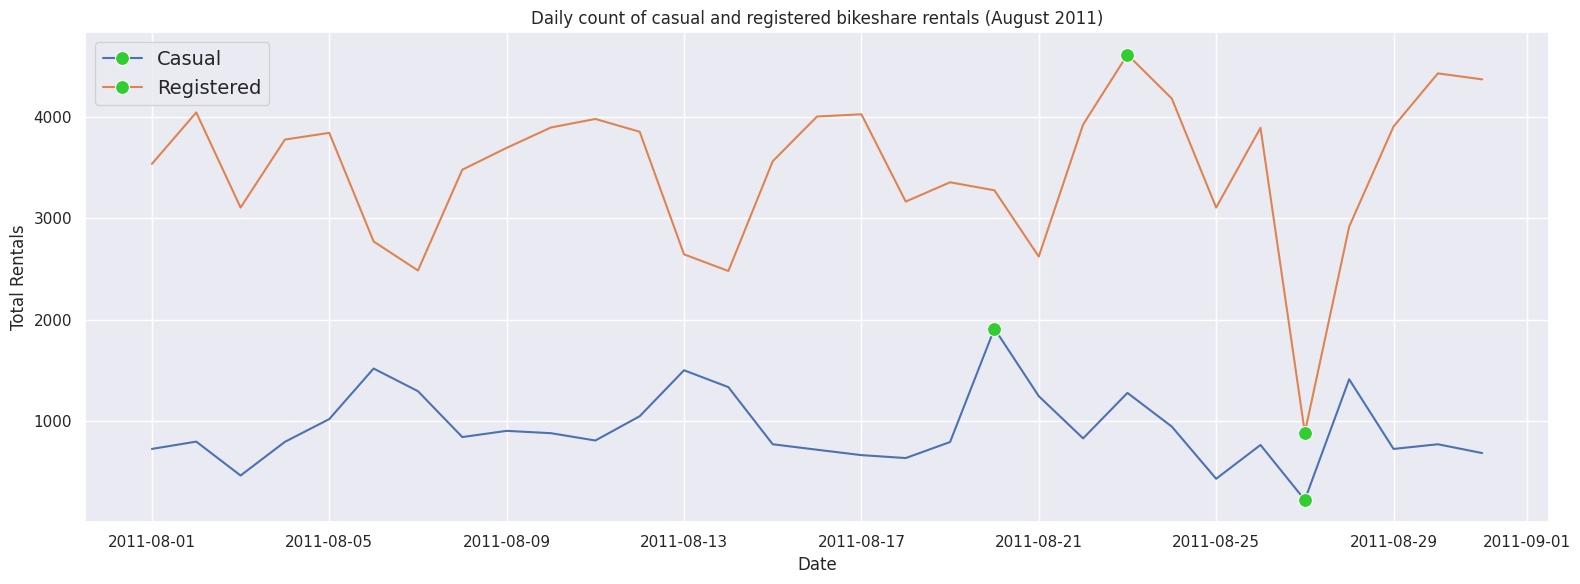

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=aug11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[19, 26])
sns.lineplot(x="dteday", y="registered", data=aug11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[22, 26])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (August 2011)")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 226 on Saturday, August 27 2011 (weekend) in the summer season

The highest number of rentals with casual status was 1914 on Saturday, August 20 2011 (weekend) in the summer season

The lowest number of rentals with registered status was 889 on Saturday, August 27 2011 (weekend) in the summer season

The highest number of rentals with registered status was 4614 on Tuesday, August 23 2011 (working day) in the summer season

In [ ]:
#Select data in September 2011
sep11_df = daily_df.loc[(daily_df.month == "September") & (daily_df.year == 2011)]

sep11_df

dteday      month  season  year    weekday  casual  registered  count
243 2011-09-01  September  Summer  2011   Thursday     783        4332   5115
244 2011-09-02  September  Summer  2011     Friday     875        3852   4727
245 2011-09-03  September  Summer  2011   Saturday    1935        2549   4484
246 2011-09-04  September  Summer  2011     Sunday    2521        2419   4940
247 2011-09-05  September  Summer  2011     Monday    1236        2115   3351
248 2011-09-06  September  Summer  2011    Tuesday     204        2506   2710
249 2011-09-07  September  Summer  2011  Wednesday     118        1878   1996
250 2011-09-08  September  Summer  2011   Thursday     153        1689   1842
251 2011-09-09  September  Summer  2011     Friday     417        3127   3544
252 2011-09-10  September  Summer  2011   Saturday    1750        3595   5345
253 2011-09-11  September  Summer  2011     Sunday    1633        3413   5046
254 2011-09-12  September  Summer  2011     Monday     690        4023   4713
255 2011-09-13  September  Summer  2011    Tuesday     701        4062   4763
256 2011-09-14  September  Summer  2011  Wednesday     647        4138   4785
257 2011-09-15  September  Summer  2011   Thursday     428        3231   3659
258 2011-09-16  September  Summer  2011     Friday     742        4018   4760
259 2011-09-17  September  Summer  2011   Saturday    1434        3077   4511
260 2011-09-18  September  Summer  2011     Sunday    1353        2921   4274
261 2011-09-19  September  Summer  2011     Monday     691        3848   4539
262 2011-09-20  September  Summer  2011    Tuesday     438        3203   3641
263 2011-09-21  September  Summer  2011  Wednesday     539        3813   4352
264 2011-09-22  September  Summer  2011   Thursday     555        4240   4795
265 2011-09-23  September    Fall  2011     Friday     258        2137   2395
266 2011-09-24  September    Fall  2011   Saturday    1776        3647   5423
267 2011-09-25  September    Fall  2011     Sunday    1544        3466   5010
268 2011-09-26  September    Fall  2011     Monday     684        3946   4630
269 2011-09-27  September    Fall  2011    Tuesday     477        3643   4120
270 2011-09-28  September    Fall  2011  Wednesday     480        3427   3907
271 2011-09-29  September    Fall  2011   Thursday     653        4186   4839
272 2011-09-30  September    Fall  2011     Friday     830        4372   5202

In [ ]:
print("casual min: ", sep11_df.casual.min())
print("casual max: ", sep11_df.casual.max())

print("registered min: ", sep11_df.registered.min())
print("registered max: ", sep11_df.registered.max())

casual min:  118
casual max:  2521
registered min:  1689
registered max:  4372


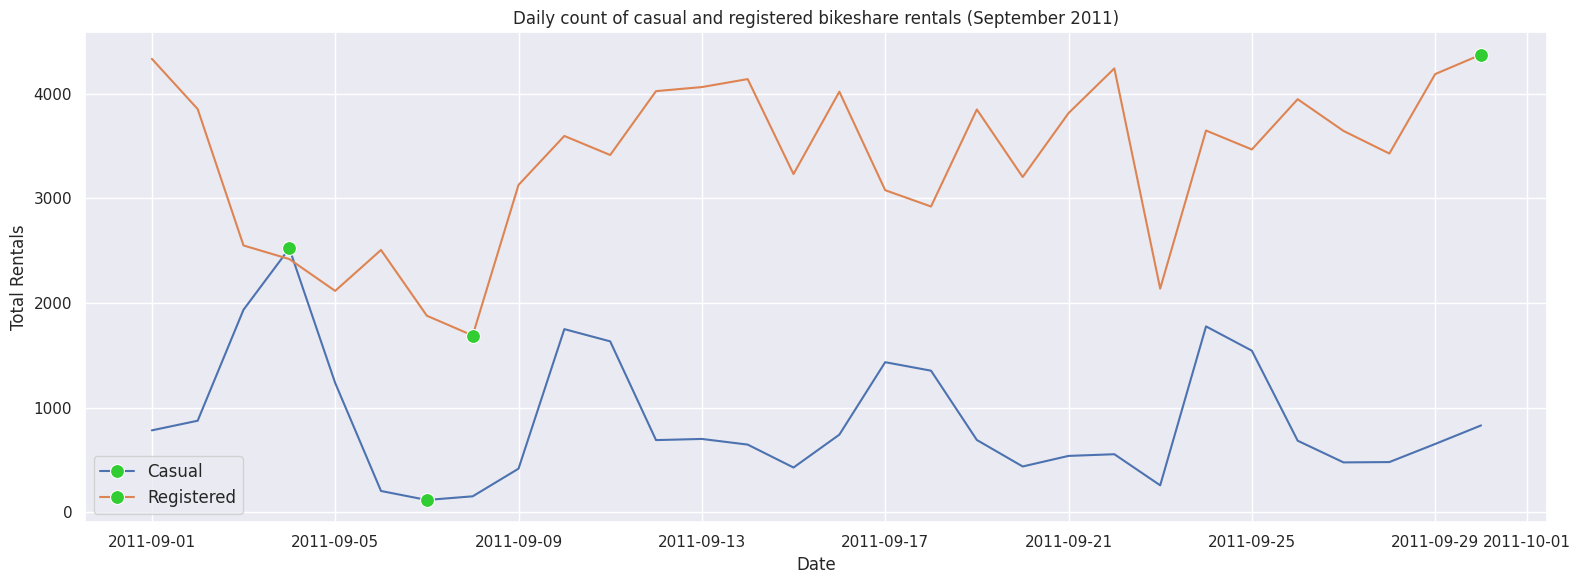

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=sep11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[3, 6])
sns.lineplot(x="dteday", y="registered", data=sep11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[7, 29])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (September 2011)")

# Add a legend to the plot at lower left
plt.legend(loc="lower left", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 118 on Wednesday, September 7 2011 (working day) summer season

The highest number of rentals with casual status was 2521 on Sunday, September 4 2011 (weekend) in the summer season

The lowest number of rentals with registered status was 1689 on Thursday, September 8 2011 (weekend) in the summer season

The highest number of rentals with registered status was 4372 on Friday, September 30 2011 (working day) in the fall season

In [ ]:
#Select data in October 2011
oct11_df = daily_df.loc[(daily_df.month == "October") & (daily_df.year == 2011)]

oct11_df

dteday    month season  year    weekday  casual  registered  count
273 2011-10-01  October   Fall  2011   Saturday     480        1949   2429
274 2011-10-02  October   Fall  2011     Sunday     616        2302   2918
275 2011-10-03  October   Fall  2011     Monday     330        3240   3570
276 2011-10-04  October   Fall  2011    Tuesday     486        3970   4456
277 2011-10-05  October   Fall  2011  Wednesday     559        4267   4826
278 2011-10-06  October   Fall  2011   Thursday     639        4126   4765
279 2011-10-07  October   Fall  2011     Friday     949        4036   4985
280 2011-10-08  October   Fall  2011   Saturday    2235        3174   5409
281 2011-10-09  October   Fall  2011     Sunday    2397        3114   5511
282 2011-10-10  October   Fall  2011     Monday    1514        3603   5117
283 2011-10-11  October   Fall  2011    Tuesday     667        3896   4563
284 2011-10-12  October   Fall  2011  Wednesday     217        2199   2416
285 2011-10-13  October   Fall  2011   Thursday     290        2623   2913
286 2011-10-14  October   Fall  2011     Friday     529        3115   3644
287 2011-10-15  October   Fall  2011   Saturday    1899        3318   5217
288 2011-10-16  October   Fall  2011     Sunday    1748        3293   5041
289 2011-10-17  October   Fall  2011     Monday     713        3857   4570
290 2011-10-18  October   Fall  2011    Tuesday     637        4111   4748
291 2011-10-19  October   Fall  2011  Wednesday     254        2170   2424
292 2011-10-20  October   Fall  2011   Thursday     471        3724   4195
293 2011-10-21  October   Fall  2011     Friday     676        3628   4304
294 2011-10-22  October   Fall  2011   Saturday    1499        2809   4308
295 2011-10-23  October   Fall  2011     Sunday    1619        2762   4381
296 2011-10-24  October   Fall  2011     Monday     699        3488   4187
297 2011-10-25  October   Fall  2011    Tuesday     695        3992   4687
298 2011-10-26  October   Fall  2011  Wednesday     404        3490   3894
299 2011-10-27  October   Fall  2011   Thursday     240        2419   2659
300 2011-10-28  October   Fall  2011     Friday     456        3291   3747
301 2011-10-29  October   Fall  2011   Saturday      57         570    627
302 2011-10-30  October   Fall  2011     Sunday     885        2446   3331
303 2011-10-31  October   Fall  2011     Monday     362        3307   3669

In [ ]:
print("casual min: ", oct11_df.casual.min())
print("casual max: ", oct11_df.casual.max())

print("registered min: ", oct11_df.registered.min())
print("registered max: ", oct11_df.registered.max())

casual min:  57
casual max:  2397
registered min:  570
registered max:  4267


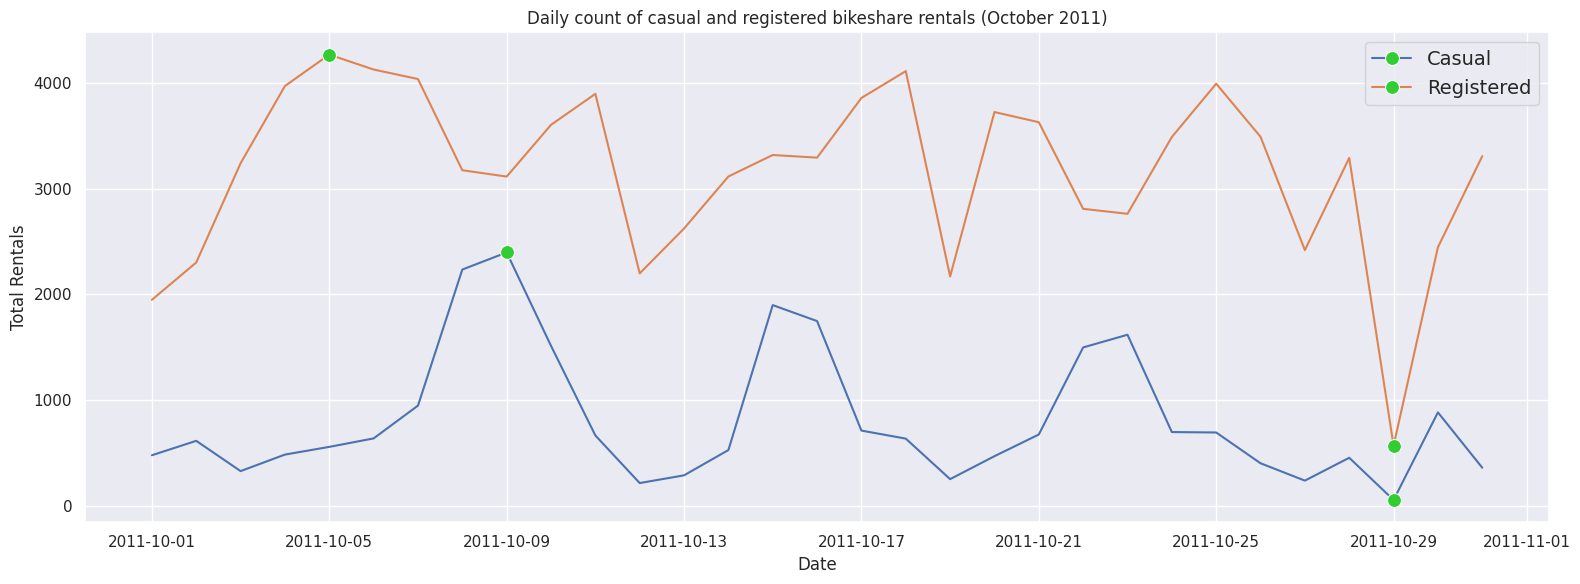

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=oct11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[8, 28])
sns.lineplot(x="dteday", y="registered", data=oct11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[4, 28])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (October 2011)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 57 on Saturday, October 29 2011 (working day) in the fall season

The highest number of rentals with casual status was 2397 on Sunday, October 9 2011 (weekend) in the late fall season

The lowest number of rentals with registered status was 570 on Saturday, October 29 2011 (weekend) in the fall season

The highest number of rentals with registered status was 4267 on Wednesday, October 5 2011 (working day) in the fall season

In [ ]:
#Select data on November 2011
nov11_df = daily_df.loc[(daily_df.month == "November") & (daily_df.year == 2011)]

nov11_df

dteday     month season  year    weekday  casual  registered  count
304 2011-11-01  November   Fall  2011    Tuesday     410        3658   4068
305 2011-11-02  November   Fall  2011  Wednesday     370        3816   4186
306 2011-11-03  November   Fall  2011   Thursday     318        3656   3974
307 2011-11-04  November   Fall  2011     Friday     470        3576   4046
308 2011-11-05  November   Fall  2011   Saturday    1156        2770   3926
309 2011-11-06  November   Fall  2011     Sunday     952        2697   3649
310 2011-11-07  November   Fall  2011     Monday     373        3662   4035
311 2011-11-08  November   Fall  2011    Tuesday     376        3829   4205
312 2011-11-09  November   Fall  2011  Wednesday     305        3804   4109
313 2011-11-10  November   Fall  2011   Thursday     190        2743   2933
314 2011-11-11  November   Fall  2011     Friday     440        2928   3368
315 2011-11-12  November   Fall  2011   Saturday    1275        2792   4067
316 2011-11-13  November   Fall  2011     Sunday    1004        2713   3717
317 2011-11-14  November   Fall  2011     Monday     595        3891   4486
318 2011-11-15  November   Fall  2011    Tuesday     449        3746   4195
319 2011-11-16  November   Fall  2011  Wednesday     145        1672   1817
320 2011-11-17  November   Fall  2011   Thursday     139        2914   3053
321 2011-11-18  November   Fall  2011     Friday     245        3147   3392
322 2011-11-19  November   Fall  2011   Saturday     943        2720   3663
323 2011-11-20  November   Fall  2011     Sunday     787        2733   3520
324 2011-11-21  November   Fall  2011     Monday     220        2545   2765
325 2011-11-22  November   Fall  2011    Tuesday      69        1538   1607
326 2011-11-23  November   Fall  2011  Wednesday     112        2454   2566
327 2011-11-24  November   Fall  2011   Thursday     560         935   1495
328 2011-11-25  November   Fall  2011     Friday    1095        1697   2792
329 2011-11-26  November   Fall  2011   Saturday    1249        1819   3068
330 2011-11-27  November   Fall  2011     Sunday     810        2261   3071
331 2011-11-28  November   Fall  2011     Monday     253        3614   3867
332 2011-11-29  November   Fall  2011    Tuesday      96        2818   2914
333 2011-11-30  November   Fall  2011  Wednesday     188        3425   3613

In [ ]:
print("casual min: ", nov11_df.casual.min())
print("casual max: ", nov11_df.casual.max())

print("registered min: ", nov11_df.registered.min())
print("registered max: ", nov11_df.registered.max())

casual min:  69
casual max:  1275
registered min:  935
registered max:  3891


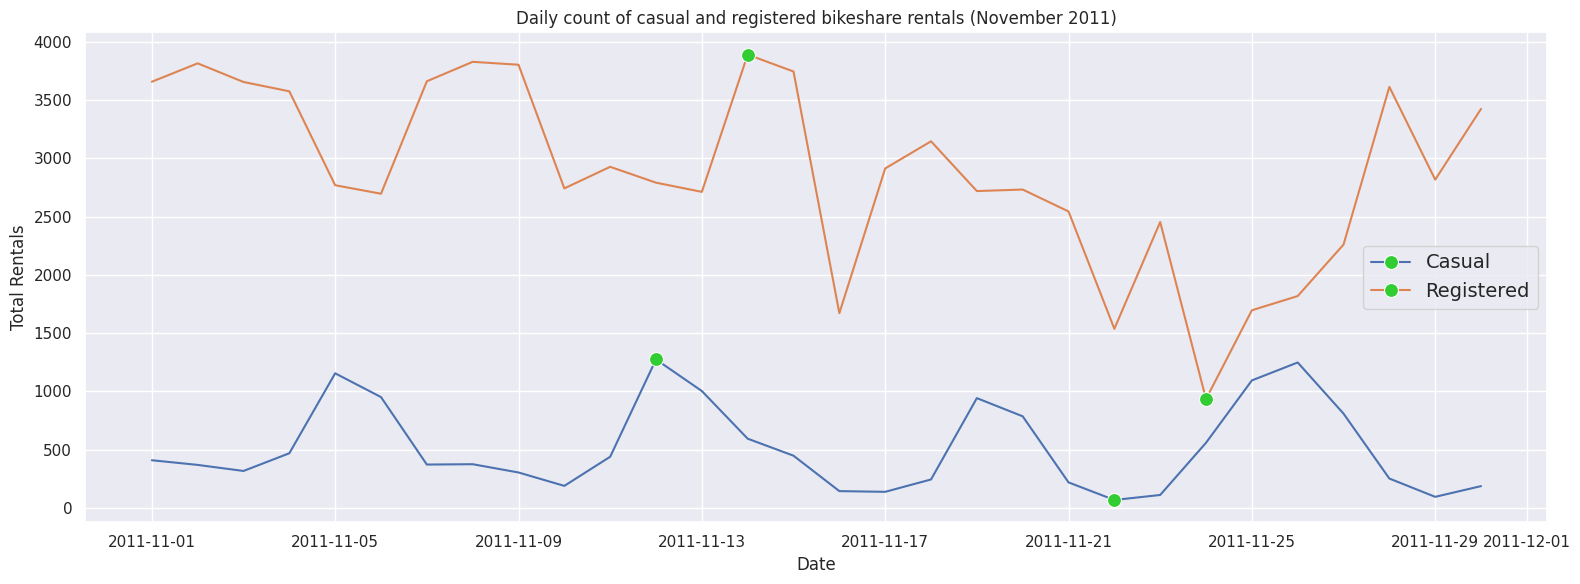

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=nov11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[11, 21])
sns.lineplot(x="dteday", y="registered", data=nov11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[13, 23])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (November 2011)")

# Add a legend to the plot at center right
plt.legend(loc="center right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 69 on Tuesday, November 22 2011 (working day) in the fall season

The highest number of rentals with casual status was 1275 on Saturday, November 12 2011 (weekend) in the fall season

The lowest number of rentals with registered status was 935 on Saturday, November 24 2011 (weekend) in the fall season

The highest number of rentals with registered status was 3891 on Monday, November 14 2011 (working day) in the fall season

In [ ]:
#Select data in December 2011
dec11_df = daily_df.loc[(daily_df.month == "December") & (daily_df.year == 2011)]

dec11_df

dteday     month  season  year    weekday  casual  registered  count
334 2011-12-01  December    Fall  2011   Thursday     182        3545   3727
335 2011-12-02  December    Fall  2011     Friday     268        3672   3940
336 2011-12-03  December    Fall  2011   Saturday     706        2908   3614
337 2011-12-04  December    Fall  2011     Sunday     634        2851   3485
338 2011-12-05  December    Fall  2011     Monday     233        3578   3811
339 2011-12-06  December    Fall  2011    Tuesday     126        2468   2594
340 2011-12-07  December    Fall  2011  Wednesday      50         655    705
341 2011-12-08  December    Fall  2011   Thursday     150        3172   3322
342 2011-12-09  December    Fall  2011     Friday     261        3359   3620
343 2011-12-10  December    Fall  2011   Saturday     502        2688   3190
344 2011-12-11  December    Fall  2011     Sunday     377        2366   2743
345 2011-12-12  December    Fall  2011     Monday     143        3167   3310
346 2011-12-13  December    Fall  2011    Tuesday     155        3368   3523
347 2011-12-14  December    Fall  2011  Wednesday     178        3562   3740
348 2011-12-15  December    Fall  2011   Thursday     181        3528   3709
349 2011-12-16  December    Fall  2011     Friday     178        3399   3577
350 2011-12-17  December    Fall  2011   Saturday     275        2464   2739
351 2011-12-18  December    Fall  2011     Sunday     220        2211   2431
352 2011-12-19  December    Fall  2011     Monday     260        3143   3403
353 2011-12-20  December    Fall  2011    Tuesday     216        3534   3750
354 2011-12-21  December  Winter  2011  Wednesday     107        2553   2660
355 2011-12-22  December  Winter  2011   Thursday     227        2841   3068
356 2011-12-23  December  Winter  2011     Friday     163        2046   2209
357 2011-12-24  December  Winter  2011   Saturday     155         856   1011
358 2011-12-25  December  Winter  2011     Sunday     303         451    754
359 2011-12-26  December  Winter  2011     Monday     430         887   1317
360 2011-12-27  December  Winter  2011    Tuesday     103        1059   1162
361 2011-12-28  December  Winter  2011  Wednesday     255        2047   2302
362 2011-12-29  December  Winter  2011   Thursday     254        2169   2423
363 2011-12-30  December  Winter  2011     Friday     491        2508   2999
364 2011-12-31  December  Winter  2011   Saturday     665        1820   2485

In [ ]:
print("casual min: ", dec11_df.casual.min())
print("casual max: ", dec11_df.casual.max())

print("registered min: ", dec11_df.registered.min())
print("registered max: ", dec11_df.registered.max())

casual min:  50
casual max:  706
registered min:  451
registered max:  3672


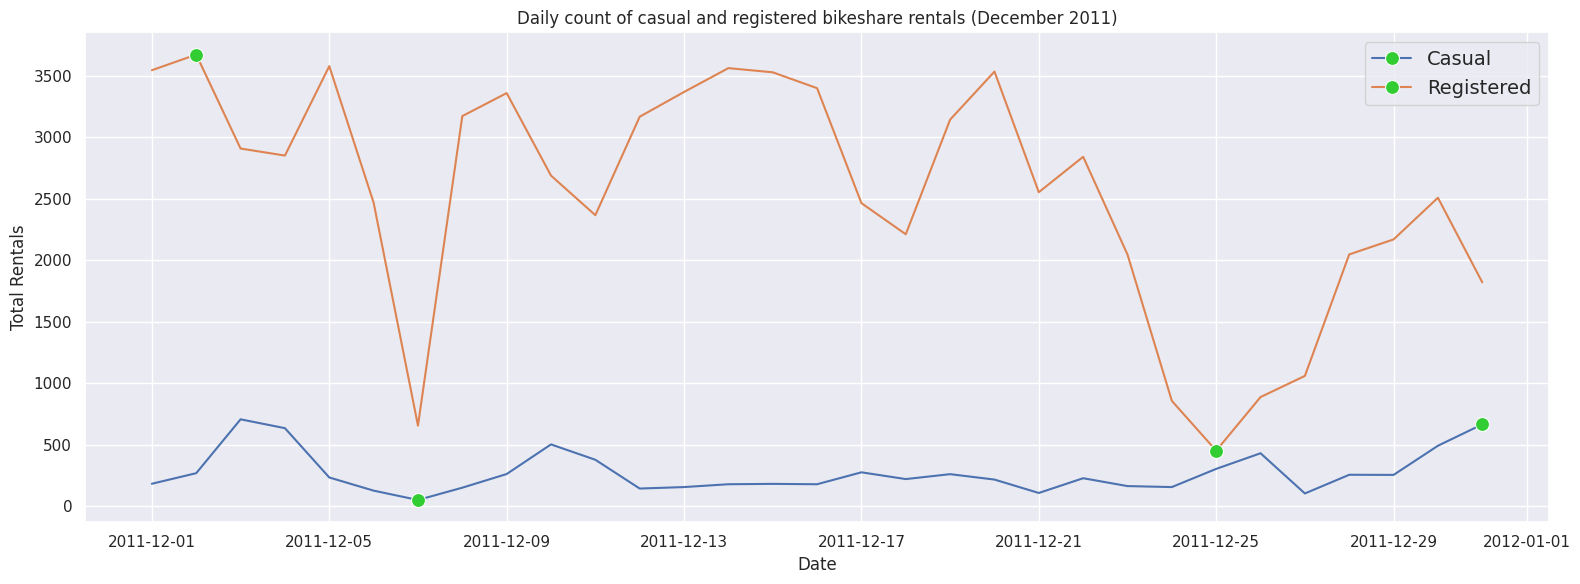

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=dec11_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[6, 30])
sns.lineplot(x="dteday", y="registered", data=dec11_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[1, 24])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (December 2011)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 50 on Wednesday, December 7 2011 (working day) in the fall season

The highest number of rentals with casual status was 706 on Saturday, December 3 2011 (weekend) in the fall season

The lowest number of rentals with registered status was 451, namely on Sunday, December 25 2011 (weekend) winter season

The highest number of rentals with registered status was 3672, namely on Friday, December 2 2011 (working day) fall season

In [ ]:
#Select data in January 2012
jan12_df = daily_df.loc[(daily_df.month == "January") & (daily_df.year == 2012)]

jan12_df

dteday    month  season  year    weekday  casual  registered  count
365 2012-01-01  January  Winter  2012     Sunday     686        1608   2294
366 2012-01-02  January  Winter  2012     Monday     244        1707   1951
367 2012-01-03  January  Winter  2012    Tuesday      89        2147   2236
368 2012-01-04  January  Winter  2012  Wednesday      95        2273   2368
369 2012-01-05  January  Winter  2012   Thursday     140        3132   3272
370 2012-01-06  January  Winter  2012     Friday     307        3791   4098
371 2012-01-07  January  Winter  2012   Saturday    1070        3451   4521
372 2012-01-08  January  Winter  2012     Sunday     599        2826   3425
373 2012-01-09  January  Winter  2012     Monday     106        2270   2376
374 2012-01-10  January  Winter  2012    Tuesday     173        3425   3598
375 2012-01-11  January  Winter  2012  Wednesday      92        2085   2177
376 2012-01-12  January  Winter  2012   Thursday     269        3828   4097
377 2012-01-13  January  Winter  2012     Friday     174        3040   3214
378 2012-01-14  January  Winter  2012   Saturday     333        2160   2493
379 2012-01-15  January  Winter  2012     Sunday     284        2027   2311
380 2012-01-16  January  Winter  2012     Monday     217        2081   2298
381 2012-01-17  January  Winter  2012    Tuesday     127        2808   2935
382 2012-01-18  January  Winter  2012  Wednesday     109        3267   3376
383 2012-01-19  January  Winter  2012   Thursday     130        3162   3292
384 2012-01-20  January  Winter  2012     Friday     115        3048   3163
385 2012-01-21  January  Winter  2012   Saturday      67        1234   1301
386 2012-01-22  January  Winter  2012     Sunday     196        1781   1977
387 2012-01-23  January  Winter  2012     Monday     145        2287   2432
388 2012-01-24  January  Winter  2012    Tuesday     439        3900   4339
389 2012-01-25  January  Winter  2012  Wednesday     467        3803   4270
390 2012-01-26  January  Winter  2012   Thursday     244        3831   4075
391 2012-01-27  January  Winter  2012     Friday     269        3187   3456
392 2012-01-28  January  Winter  2012   Saturday     775        3248   4023
393 2012-01-29  January  Winter  2012     Sunday     558        2685   3243
394 2012-01-30  January  Winter  2012     Monday     126        3498   3624
395 2012-01-31  January  Winter  2012    Tuesday     324        4185   4509

In [ ]:
print("casual min: ", jan12_df.casual.min())
print("casual max: ", jan12_df.casual.max())

print("registered min: ", jan12_df.registered.min())
print("registered max: ", jan12_df.registered.max())

casual min:  67
casual max:  1070
registered min:  1234
registered max:  4185


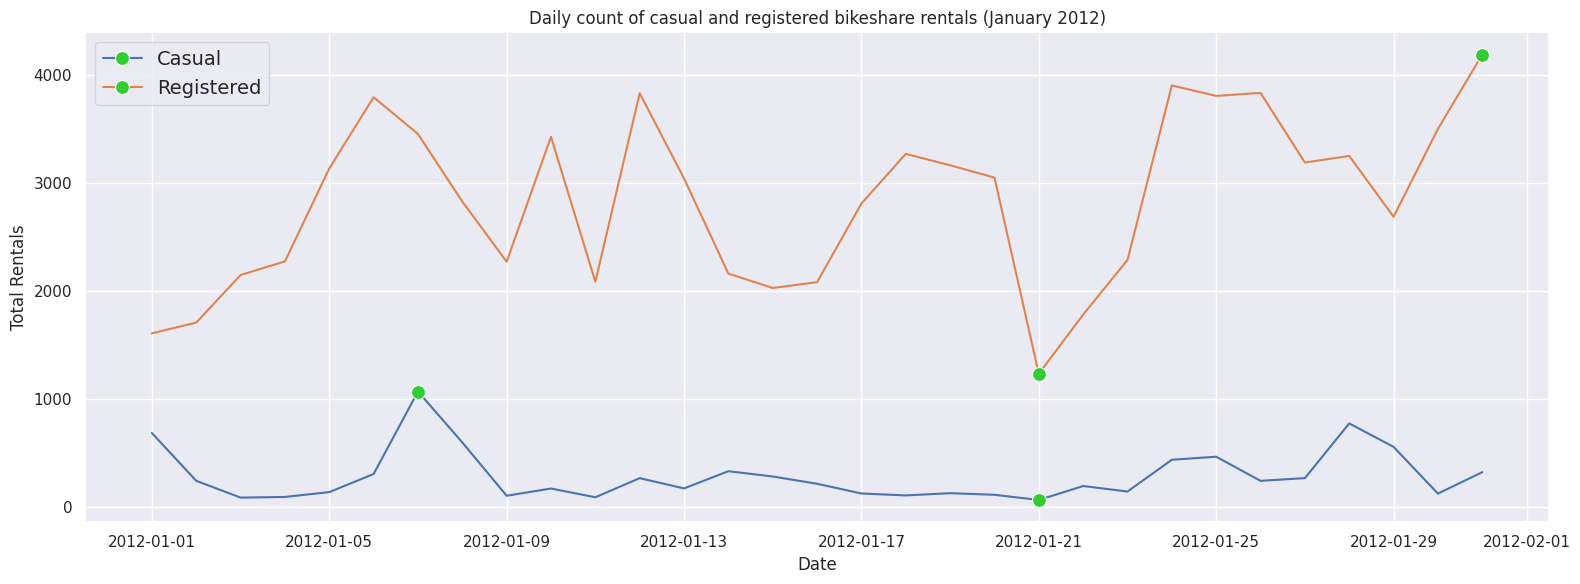

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=jan12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[6, 20])
sns.lineplot(x="dteday", y="registered", data=jan12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[20, 30])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (January 2012)")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 67 on Saturday, January 21 2012 (weekend) in the winter season

The highest number of rentals with casual status was 1070 on Saturday, January 7 2012 (weekend) in the winter season

The lowest number of rentals with registered status was 1234 on Saturday, January 21 2012 (weekend) in the winter season

The highest number of rentals with registered status was 4185 on Tuesday, January 31 2012 (working day) in the winter season

In [ ]:
#Select data in February 2012
feb12_df = daily_df.loc[(daily_df.month == "February") & (daily_df.year == 2012)]

feb12_df

dteday     month  season  year    weekday  casual  registered  count
396 2012-02-01  February  Winter  2012  Wednesday     304        4275   4579
397 2012-02-02  February  Winter  2012   Thursday     190        3571   3761
398 2012-02-03  February  Winter  2012     Friday     310        3841   4151
399 2012-02-04  February  Winter  2012   Saturday     384        2448   2832
400 2012-02-05  February  Winter  2012     Sunday     318        2629   2947
401 2012-02-06  February  Winter  2012     Monday     206        3578   3784
402 2012-02-07  February  Winter  2012    Tuesday     199        4176   4375
403 2012-02-08  February  Winter  2012  Wednesday     109        2693   2802
404 2012-02-09  February  Winter  2012   Thursday     163        3667   3830
405 2012-02-10  February  Winter  2012     Friday     227        3604   3831
406 2012-02-11  February  Winter  2012   Saturday     192        1977   2169
407 2012-02-12  February  Winter  2012     Sunday      73        1456   1529
408 2012-02-13  February  Winter  2012     Monday      94        3328   3422
409 2012-02-14  February  Winter  2012    Tuesday     135        3787   3922
410 2012-02-15  February  Winter  2012  Wednesday     141        4028   4169
411 2012-02-16  February  Winter  2012   Thursday      74        2931   3005
412 2012-02-17  February  Winter  2012     Friday     349        3805   4154
413 2012-02-18  February  Winter  2012   Saturday    1435        2883   4318
414 2012-02-19  February  Winter  2012     Sunday     618        2071   2689
415 2012-02-20  February  Winter  2012     Monday     502        2627   3129
416 2012-02-21  February  Winter  2012    Tuesday     163        3614   3777
417 2012-02-22  February  Winter  2012  Wednesday     394        4379   4773
418 2012-02-23  February  Winter  2012   Thursday     516        4546   5062
419 2012-02-24  February  Winter  2012     Friday     246        3241   3487
420 2012-02-25  February  Winter  2012   Saturday     317        2415   2732
421 2012-02-26  February  Winter  2012     Sunday     515        2874   3389
422 2012-02-27  February  Winter  2012     Monday     253        4069   4322
423 2012-02-28  February  Winter  2012    Tuesday     229        4134   4363
424 2012-02-29  February  Winter  2012  Wednesday      65        1769   1834

In [ ]:
print("casual min: ", feb12_df.casual.min())
print("casual max: ", feb12_df.casual.max())

print("registered min: ", feb12_df.registered.min())
print("registered max: ", feb12_df.registered.max())

casual min:  65
casual max:  1435
registered min:  1456
registered max:  4546


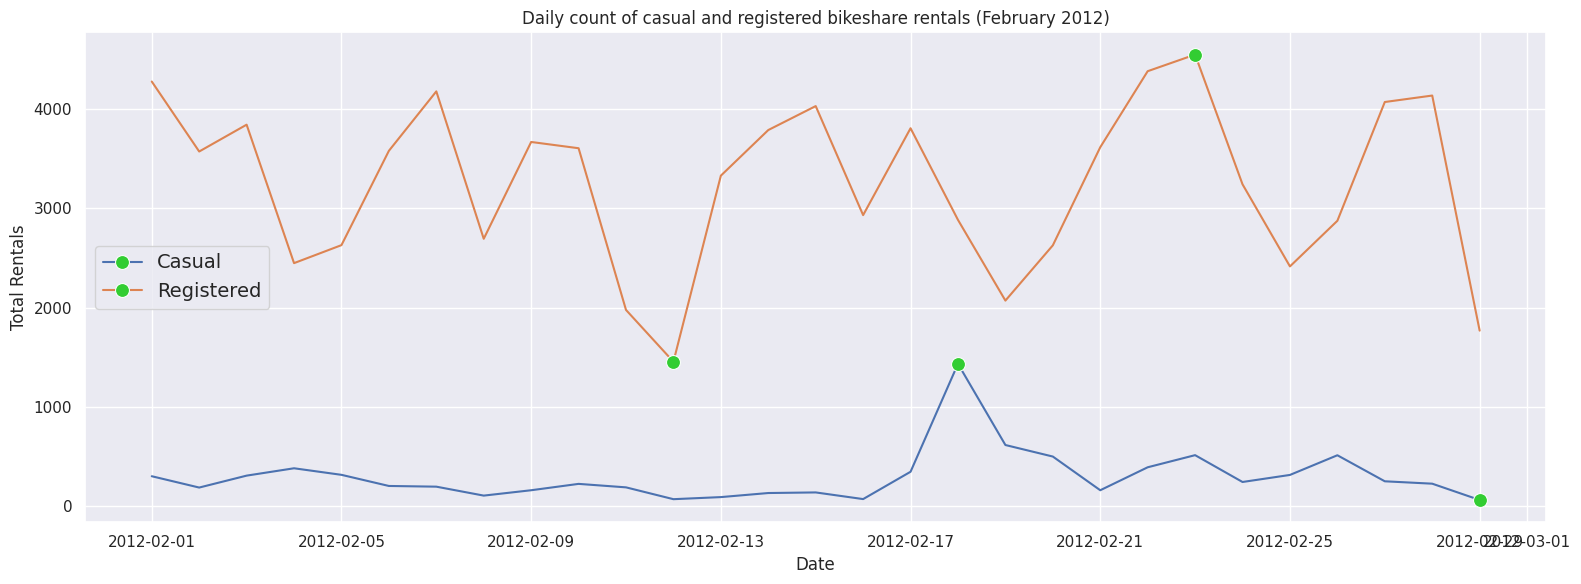

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=feb12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[17, 28])
sns.lineplot(x="dteday", y="registered", data=feb12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[11, 22])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (February 2012)")

# Add a legend to the plot at center left
plt.legend(loc="center left", fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 65 on Wednesday, February 29 2012 (working day) in the winter season

The highest number of rentals with casual status was 1435 on Saturday, February 18 2012 (weekend) in the winter season

The lowest number of rentals with registered status was 1456 on Sunday, February 12 2012 (weekend) in the winter season

The highest number of rentals with registered status was 4546 on Thursday, February 23 2012 (working day) in the winter season

In [ ]:
#Select data in March 2012
march12_df = daily_df.loc[(daily_df.month == "March") & (daily_df.year == 2012)]

march12_df

dteday  month  season  year    weekday  casual  registered  count
425 2012-03-01  March  Winter  2012   Thursday     325        4665   4990
426 2012-03-02  March  Winter  2012     Friday     246        2948   3194
427 2012-03-03  March  Winter  2012   Saturday     956        3110   4066
428 2012-03-04  March  Winter  2012     Sunday     710        2713   3423
429 2012-03-05  March  Winter  2012     Monday     203        3130   3333
430 2012-03-06  March  Winter  2012    Tuesday     221        3735   3956
431 2012-03-07  March  Winter  2012  Wednesday     432        4484   4916
432 2012-03-08  March  Winter  2012   Thursday     486        4896   5382
433 2012-03-09  March  Winter  2012     Friday     447        4122   4569
434 2012-03-10  March  Winter  2012   Saturday     968        3150   4118
435 2012-03-11  March  Winter  2012     Sunday    1658        3253   4911
436 2012-03-12  March  Winter  2012     Monday     838        4460   5298
437 2012-03-13  March  Winter  2012    Tuesday     762        5085   5847
438 2012-03-14  March  Winter  2012  Wednesday     997        5315   6312
439 2012-03-15  March  Winter  2012   Thursday    1005        5187   6192
440 2012-03-16  March  Winter  2012     Friday     548        3830   4378
441 2012-03-17  March  Winter  2012   Saturday    3155        4681   7836
442 2012-03-18  March  Winter  2012     Sunday    2207        3685   5892
443 2012-03-19  March  Winter  2012     Monday     982        5171   6153
444 2012-03-20  March  Winter  2012    Tuesday    1051        5042   6093
445 2012-03-21  March  Spring  2012  Wednesday    1122        5108   6230
446 2012-03-22  March  Spring  2012   Thursday    1334        5537   6871
447 2012-03-23  March  Spring  2012     Friday    2469        5893   8362
448 2012-03-24  March  Spring  2012   Saturday    1033        2339   3372
449 2012-03-25  March  Spring  2012     Sunday    1532        3464   4996
450 2012-03-26  March  Spring  2012     Monday     795        4763   5558
451 2012-03-27  March  Spring  2012    Tuesday     531        4571   5102
452 2012-03-28  March  Spring  2012  Wednesday     674        5024   5698
453 2012-03-29  March  Spring  2012   Thursday     834        5299   6133
454 2012-03-30  March  Spring  2012     Friday     796        4663   5459
455 2012-03-31  March  Spring  2012   Saturday    2301        3934   6235

In [ ]:
print("casual min: ", march12_df.casual.min())
print("casual max: ", march12_df.casual.max())

print("registered min: ", march12_df.registered.min())
print("registered max: ", march12_df.registered.max())

casual min:  203
casual max:  3155
registered min:  2339
registered max:  5893


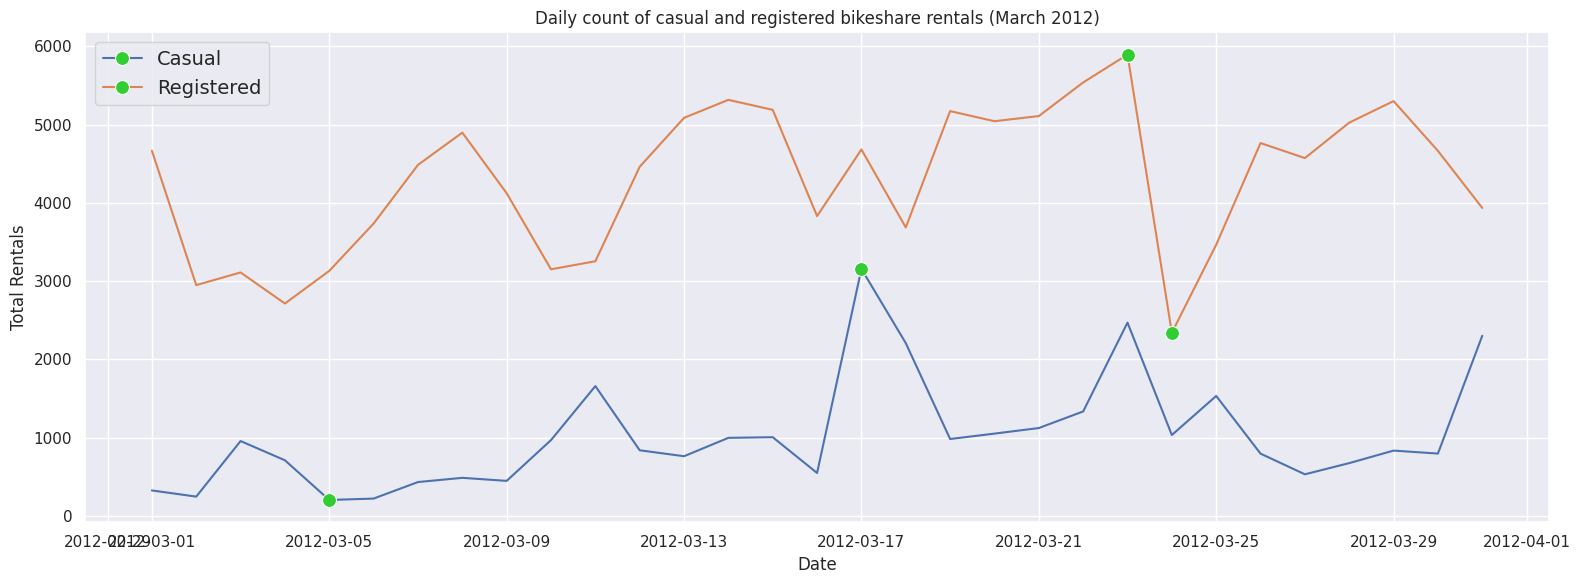

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=march12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[4, 16])
sns.lineplot(x="dteday", y="registered", data=march12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[22, 23])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (March 2012)")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 203 on Monday, March 5 2012 (working day) in the winter season

The highest number of rentals with casual status was 3155 on Saturday, March 17 2012 (weekend) in the late winter season

The lowest number of rentals with registered status was 2339 on Saturday, March 24 2012 (weekend) in the spring season

The highest number of rentals with registered status was 5893 on Friday, March 23 2012 (working day) in the spring season

In [ ]:
#Select data in April 2012
april12_df = daily_df.loc[(daily_df.month == "April") & (daily_df.year == 2012)]

april12_df

dteday  month  season  year    weekday  casual  registered  count
456 2012-04-01  April  Spring  2012     Sunday    2347        3694   6041
457 2012-04-02  April  Spring  2012     Monday    1208        4728   5936
458 2012-04-03  April  Spring  2012    Tuesday    1348        5424   6772
459 2012-04-04  April  Spring  2012  Wednesday    1058        5378   6436
460 2012-04-05  April  Spring  2012   Thursday    1192        5265   6457
461 2012-04-06  April  Spring  2012     Friday    1807        4653   6460
462 2012-04-07  April  Spring  2012   Saturday    3252        3605   6857
463 2012-04-08  April  Spring  2012     Sunday    2230        2939   5169
464 2012-04-09  April  Spring  2012     Monday     905        4680   5585
465 2012-04-10  April  Spring  2012    Tuesday     819        5099   5918
466 2012-04-11  April  Spring  2012  Wednesday     482        4380   4862
467 2012-04-12  April  Spring  2012   Thursday     663        4746   5409
468 2012-04-13  April  Spring  2012     Friday    1252        5146   6398
469 2012-04-14  April  Spring  2012   Saturday    2795        4665   7460
470 2012-04-15  April  Spring  2012     Sunday    2846        4286   7132
471 2012-04-16  April  Spring  2012     Monday    1198        5172   6370
472 2012-04-17  April  Spring  2012    Tuesday     989        5702   6691
473 2012-04-18  April  Spring  2012  Wednesday     347        4020   4367
474 2012-04-19  April  Spring  2012   Thursday     846        5719   6565
475 2012-04-20  April  Spring  2012     Friday    1340        5950   7290
476 2012-04-21  April  Spring  2012   Saturday    2541        4083   6624
477 2012-04-22  April  Spring  2012     Sunday     120         907   1027
478 2012-04-23  April  Spring  2012     Monday     195        3019   3214
479 2012-04-24  April  Spring  2012    Tuesday     518        5115   5633
480 2012-04-25  April  Spring  2012  Wednesday     655        5541   6196
481 2012-04-26  April  Spring  2012   Thursday     475        4551   5026
482 2012-04-27  April  Spring  2012     Friday    1014        5219   6233
483 2012-04-28  April  Spring  2012   Saturday    1120        3100   4220
484 2012-04-29  April  Spring  2012     Sunday    2229        4075   6304
485 2012-04-30  April  Spring  2012     Monday     665        4907   5572

In [ ]:
print("casual min: ", april12_df.casual.min())
print("casual max: ", april12_df.casual.max())

print("registered min: ", april12_df.registered.min())
print("registered max: ", april12_df.registered.max())

casual min:  120
casual max:  3252
registered min:  907
registered max:  5950


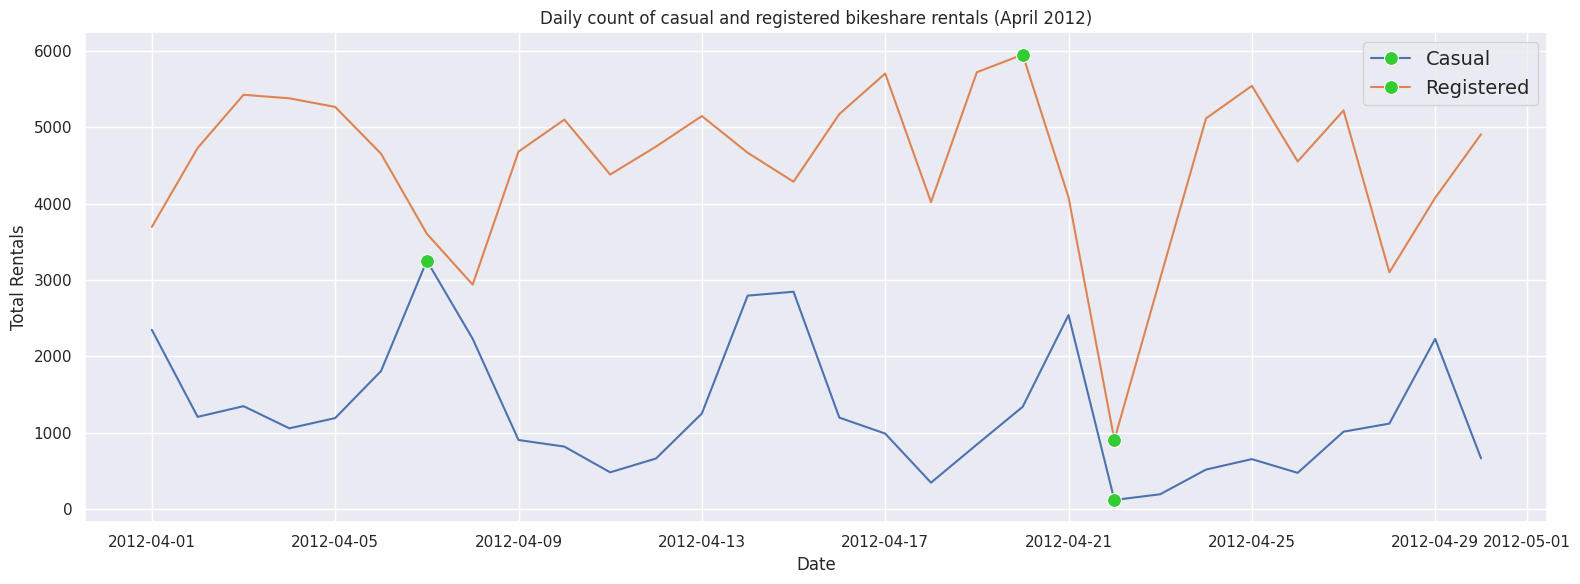

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=april12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[6, 21])
sns.lineplot(x="dteday", y="registered", data=april12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[19, 21])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (April 2012)")

# Add a legend to the plot at upper right
plt.legend(loc="upper right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 120 on Sunday, April 22 2012 (weekend) in the spring season

The highest number of rentals with casual status was 3252 on Saturday, April 7 2012 (weekend) in the spring season

The lowest number of rentals with registered status was 907 on Sunday, April 22 2012 (weekend) in the spring season

The highest number of rentals with registered status was 5950 on Friday, April 20 2012 (working day) in the spring season

In [ ]:
#Select data in May 2012
may12_df = daily_df.loc[(daily_df.month == "May") & (daily_df.year == 2012)]

may12_df

dteday month  season  year    weekday  casual  registered  count
486 2012-05-01   May  Spring  2012    Tuesday     653        5087   5740
487 2012-05-02   May  Spring  2012  Wednesday     667        5502   6169
488 2012-05-03   May  Spring  2012   Thursday     764        5657   6421
489 2012-05-04   May  Spring  2012     Friday    1069        5227   6296
490 2012-05-05   May  Spring  2012   Saturday    2496        4387   6883
491 2012-05-06   May  Spring  2012     Sunday    2135        4224   6359
492 2012-05-07   May  Spring  2012     Monday    1008        5265   6273
493 2012-05-08   May  Spring  2012    Tuesday     738        4990   5728
494 2012-05-09   May  Spring  2012  Wednesday     620        4097   4717
495 2012-05-10   May  Spring  2012   Thursday    1026        5546   6572
496 2012-05-11   May  Spring  2012     Friday    1319        5711   7030
497 2012-05-12   May  Spring  2012   Saturday    2622        4807   7429
498 2012-05-13   May  Spring  2012     Sunday    2172        3946   6118
499 2012-05-14   May  Spring  2012     Monday     342        2501   2843
500 2012-05-15   May  Spring  2012    Tuesday     625        4490   5115
501 2012-05-16   May  Spring  2012  Wednesday     991        6433   7424
502 2012-05-17   May  Spring  2012   Thursday    1242        6142   7384
503 2012-05-18   May  Spring  2012     Friday    1521        6118   7639
504 2012-05-19   May  Spring  2012   Saturday    3410        4884   8294
505 2012-05-20   May  Spring  2012     Sunday    2704        4425   7129
506 2012-05-21   May  Spring  2012     Monday     630        3729   4359
507 2012-05-22   May  Spring  2012    Tuesday     819        5254   6073
508 2012-05-23   May  Spring  2012  Wednesday     766        4494   5260
509 2012-05-24   May  Spring  2012   Thursday    1059        5711   6770
510 2012-05-25   May  Spring  2012     Friday    1417        5317   6734
511 2012-05-26   May  Spring  2012   Saturday    2855        3681   6536
512 2012-05-27   May  Spring  2012     Sunday    3283        3308   6591
513 2012-05-28   May  Spring  2012     Monday    2557        3486   6043
514 2012-05-29   May  Spring  2012    Tuesday     880        4863   5743
515 2012-05-30   May  Spring  2012  Wednesday     745        6110   6855
516 2012-05-31   May  Spring  2012   Thursday    1100        6238   7338

In [ ]:
print("casual min: ", may12_df.casual.min())
print("casual max: ", may12_df.casual.max())

print("registered min: ", may12_df.registered.min())
print("registered max: ", may12_df.registered.max())

casual min:  342
casual max:  3410
registered min:  2501
registered max:  6433


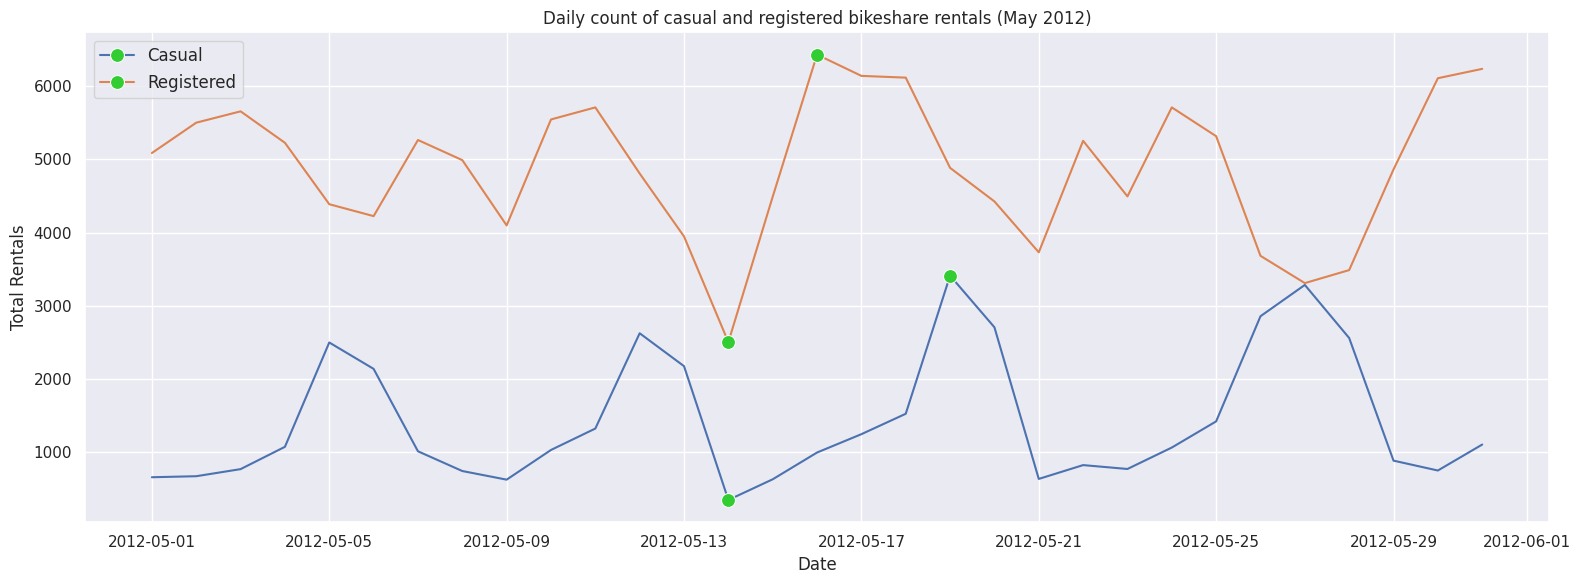

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=may12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[13, 18])
sns.lineplot(x="dteday", y="registered", data=may12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[13, 15])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (May 2012)")

# Add a legend to the plot at upper left
plt.legend(loc="upper left", fontsize=12)


# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 342 on Monday, 1 4 May 2012 (working day) in the spring season

The highest number of rentals with casual status was 3410 on Saturday, May 19 2012 (weekend) in the late spring season

The lowest number of rentals with registered status was 2501 on Monday, May 14 2012 (weekend) in the spring season

The highest number of rentals with registered status was 6433 on Wednesday, May 16 2012 (working day) in the spring season

In [ ]:
#Select data in June 2012
june12_df = daily_df.loc[(daily_df.month == "June") & (daily_df.year == 2012)]

june12_df

dteday month  season  year    weekday  casual  registered  count
517 2012-06-01  June  Spring  2012     Friday     533        3594   4127
518 2012-06-02  June  Spring  2012   Saturday    2795        5325   8120
519 2012-06-03  June  Spring  2012     Sunday    2494        5147   7641
520 2012-06-04  June  Spring  2012     Monday    1071        5927   6998
521 2012-06-05  June  Spring  2012    Tuesday     968        6033   7001
522 2012-06-06  June  Spring  2012  Wednesday    1027        6028   7055
523 2012-06-07  June  Spring  2012   Thursday    1038        6456   7494
524 2012-06-08  June  Spring  2012     Friday    1488        6248   7736
525 2012-06-09  June  Spring  2012   Saturday    2708        4790   7498
526 2012-06-10  June  Spring  2012     Sunday    2224        4374   6598
527 2012-06-11  June  Spring  2012     Monday    1017        5647   6664
528 2012-06-12  June  Spring  2012    Tuesday     477        4495   4972
529 2012-06-13  June  Spring  2012  Wednesday    1173        6248   7421
530 2012-06-14  June  Spring  2012   Thursday    1180        6183   7363
531 2012-06-15  June  Spring  2012     Friday    1563        6102   7665
532 2012-06-16  June  Spring  2012   Saturday    2963        4739   7702
533 2012-06-17  June  Spring  2012     Sunday    2634        4344   6978
534 2012-06-18  June  Spring  2012     Monday     653        4446   5099
535 2012-06-19  June  Spring  2012    Tuesday     968        5857   6825
536 2012-06-20  June  Spring  2012  Wednesday     872        5339   6211
537 2012-06-21  June  Summer  2012   Thursday     778        5127   5905
538 2012-06-22  June  Summer  2012     Friday     964        4859   5823
539 2012-06-23  June  Summer  2012   Saturday    2657        4801   7458
540 2012-06-24  June  Summer  2012     Sunday    2551        4340   6891
541 2012-06-25  June  Summer  2012     Monday    1139        5640   6779
542 2012-06-26  June  Summer  2012    Tuesday    1077        6365   7442
543 2012-06-27  June  Summer  2012  Wednesday    1077        6258   7335
544 2012-06-28  June  Summer  2012   Thursday     921        5958   6879
545 2012-06-29  June  Summer  2012     Friday     829        4634   5463
546 2012-06-30  June  Summer  2012   Saturday    1455        4232   5687

In [ ]:
print("casual min: ", june12_df.casual.min())
print("casual max: ", june12_df.casual.max())

print("registered min: ", june12_df.registered.min())
print("registered max: ", june12_df.registered.max())

casual min:  477
casual max:  2963
registered min:  3594
registered max:  6456


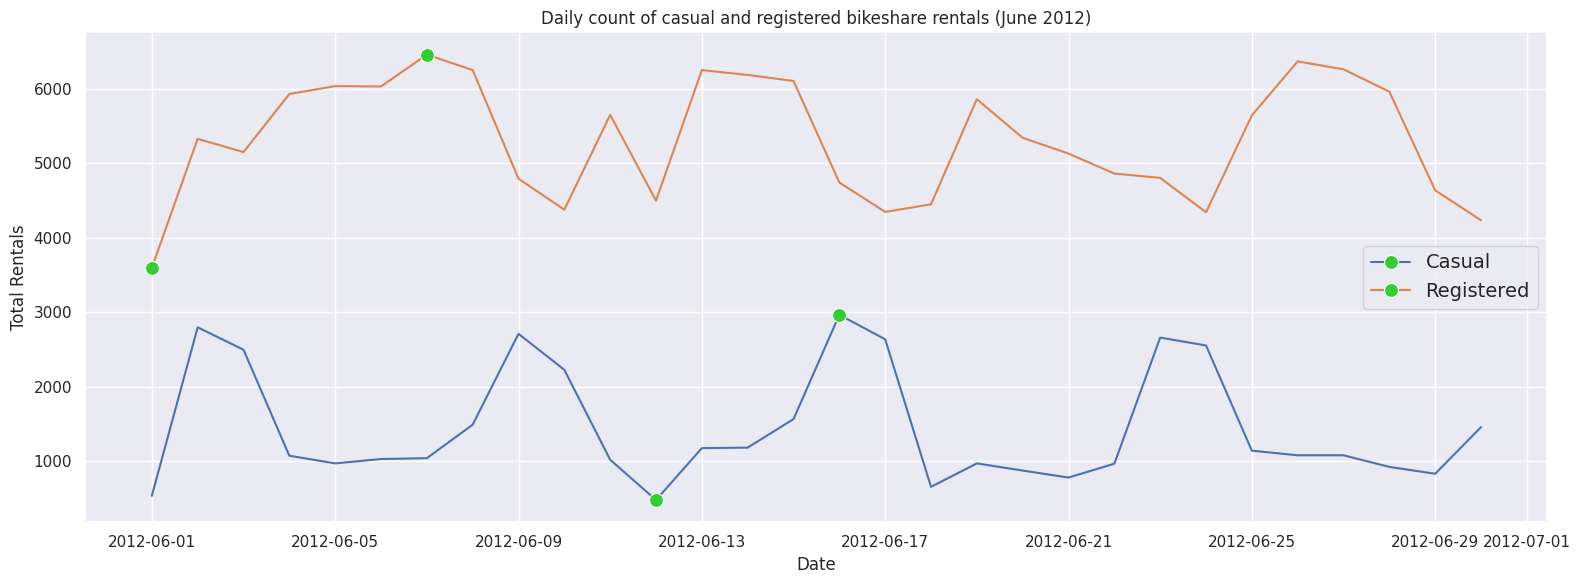

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=june12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[11, 15])
sns.lineplot(x="dteday", y="registered", data=june12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 6])


# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (June 2012)")

# Add a legend to the plot at center right
plt.legend(loc="center right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 477 on Tuesday, June 12 2012 (working day) in the spring season

The highest number of rentals with casual status was 2963 on Saturday, June 16 2012 (weekend) in the spring season

The lowest number of rentals with registered status was 3594 on Friday, June 1 2012 (working day) in the spring season

The highest number of rentals with registered status was 6456 on Thursday, June 7 2012 (working day) in the spring season

In [ ]:
#Select data in July 2012
july12_df = daily_df.loc[(daily_df.month == "July") & (daily_df.year == 2012)]

july12_df

dteday month  season  year    weekday  casual  registered  count
547 2012-07-01  July  Summer  2012     Sunday    1421        4110   5531
548 2012-07-02  July  Summer  2012     Monday     904        5323   6227
549 2012-07-03  July  Summer  2012    Tuesday    1052        5608   6660
550 2012-07-04  July  Summer  2012  Wednesday    2562        4841   7403
551 2012-07-05  July  Summer  2012   Thursday    1405        4836   6241
552 2012-07-06  July  Summer  2012     Friday    1366        4841   6207
553 2012-07-07  July  Summer  2012   Saturday    1448        3392   4840
554 2012-07-08  July  Summer  2012     Sunday    1203        3469   4672
555 2012-07-09  July  Summer  2012     Monday     998        5571   6569
556 2012-07-10  July  Summer  2012    Tuesday     954        5336   6290
557 2012-07-11  July  Summer  2012  Wednesday     975        6289   7264
558 2012-07-12  July  Summer  2012   Thursday    1032        6414   7446
559 2012-07-13  July  Summer  2012     Friday    1511        5988   7499
560 2012-07-14  July  Summer  2012   Saturday    2355        4614   6969
561 2012-07-15  July  Summer  2012     Sunday    1920        4111   6031
562 2012-07-16  July  Summer  2012     Monday    1088        5742   6830
563 2012-07-17  July  Summer  2012    Tuesday     921        5865   6786
564 2012-07-18  July  Summer  2012  Wednesday     799        4914   5713
565 2012-07-19  July  Summer  2012   Thursday     888        5703   6591
566 2012-07-20  July  Summer  2012     Friday     747        5123   5870
567 2012-07-21  July  Summer  2012   Saturday    1264        3195   4459
568 2012-07-22  July  Summer  2012     Sunday    2544        4866   7410
569 2012-07-23  July  Summer  2012     Monday    1135        5831   6966
570 2012-07-24  July  Summer  2012    Tuesday    1140        6452   7592
571 2012-07-25  July  Summer  2012  Wednesday    1383        6790   8173
572 2012-07-26  July  Summer  2012   Thursday    1036        5825   6861
573 2012-07-27  July  Summer  2012     Friday    1259        5645   6904
574 2012-07-28  July  Summer  2012   Saturday    2234        4451   6685
575 2012-07-29  July  Summer  2012     Sunday    2153        4444   6597
576 2012-07-30  July  Summer  2012     Monday    1040        6065   7105
577 2012-07-31  July  Summer  2012    Tuesday     968        6248   7216

In [ ]:
print("casual min: ", july12_df.casual.min())
print("casual max: ", july12_df.casual.max())

print("registered min: ", july12_df.registered.min())
print("registered max: ", july12_df.registered.max())

casual min:  747
casual max:  2562
registered min:  3195
registered max:  6790


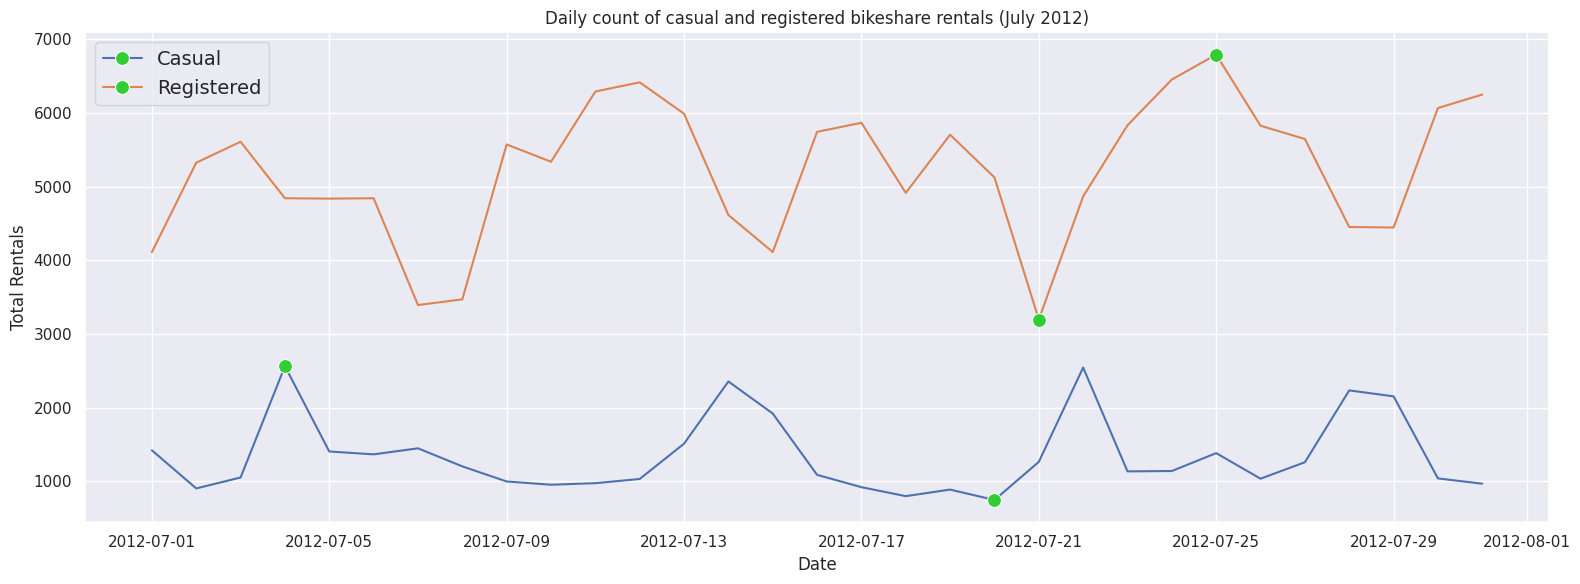

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=july12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[3, 19])
sns.lineplot(x="dteday", y="registered", data=july12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[20, 24])


# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (July 2012)")

# Add a legend to the plot at upper left
plt.legend(loc='upper left', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

Insight:

The lowest number of rentals with casual status was 747 on Friday, July 20 2012 (working day) in the summer season

The highest number of rentals with casual status was 2562 on Wednesday, July 4 2012 in the American Summer/holiday season

The lowest number of rentals with registered status was 3195 on Saturday, July 21 2012 (weekend) in the summer season

The highest number of rentals with registered status was 6790 on Wednesday, July 25 2012 (working day) in the summer season

In [ ]:
#Select data in August 2012
aug12_df = daily_df.loc[(daily_df.month == 'August') & (daily_df.year == 2012)]

aug12_df

dteday   month  season  year    weekday  casual  registered  count
578 2012-08-01  August  Summer  2012  Wednesday    1074        6506   7580
579 2012-08-02  August  Summer  2012   Thursday     983        6278   7261
580 2012-08-03  August  Summer  2012     Friday    1328        5847   7175
581 2012-08-04  August  Summer  2012   Saturday    2345        4479   6824
582 2012-08-05  August  Summer  2012     Sunday    1707        3757   5464
583 2012-08-06  August  Summer  2012     Monday    1233        5780   7013
584 2012-08-07  August  Summer  2012    Tuesday    1278        5995   7273
585 2012-08-08  August  Summer  2012  Wednesday    1263        6271   7534
586 2012-08-09  August  Summer  2012   Thursday    1196        6090   7286
587 2012-08-10  August  Summer  2012     Friday    1065        4721   5786
588 2012-08-11  August  Summer  2012   Saturday    2247        4052   6299
589 2012-08-12  August  Summer  2012     Sunday    2182        4362   6544
590 2012-08-13  August  Summer  2012     Monday    1207        5676   6883
591 2012-08-14  August  Summer  2012    Tuesday    1128        5656   6784
592 2012-08-15  August  Summer  2012  Wednesday    1198        6149   7347
593 2012-08-16  August  Summer  2012   Thursday    1338        6267   7605
594 2012-08-17  August  Summer  2012     Friday    1483        5665   7148
595 2012-08-18  August  Summer  2012   Saturday    2827        5038   7865
596 2012-08-19  August  Summer  2012     Sunday    1208        3341   4549
597 2012-08-20  August  Summer  2012     Monday    1026        5504   6530
598 2012-08-21  August  Summer  2012    Tuesday    1081        5925   7006
599 2012-08-22  August  Summer  2012  Wednesday    1094        6281   7375
600 2012-08-23  August  Summer  2012   Thursday    1363        6402   7765
601 2012-08-24  August  Summer  2012     Friday    1325        6257   7582
602 2012-08-25  August  Summer  2012   Saturday    1829        4224   6053
603 2012-08-26  August  Summer  2012     Sunday    1483        3772   5255
604 2012-08-27  August  Summer  2012     Monday     989        5928   6917
605 2012-08-28  August  Summer  2012    Tuesday     935        6105   7040
606 2012-08-29  August  Summer  2012  Wednesday    1177        6520   7697
607 2012-08-30  August  Summer  2012   Thursday    1172        6541   7713
608 2012-08-31  August  Summer  2012     Friday    1433        5917   7350

In [ ]:
print("casual min: ", aug12_df.casual.min())
print("casual max: ", aug12_df.casual.max())

print("registered min: ", aug12_df.registered.min())
print("registered max: ", aug12_df.registered.max())

casual min:  935
casual max:  2827
registered min:  3341
registered max:  6541


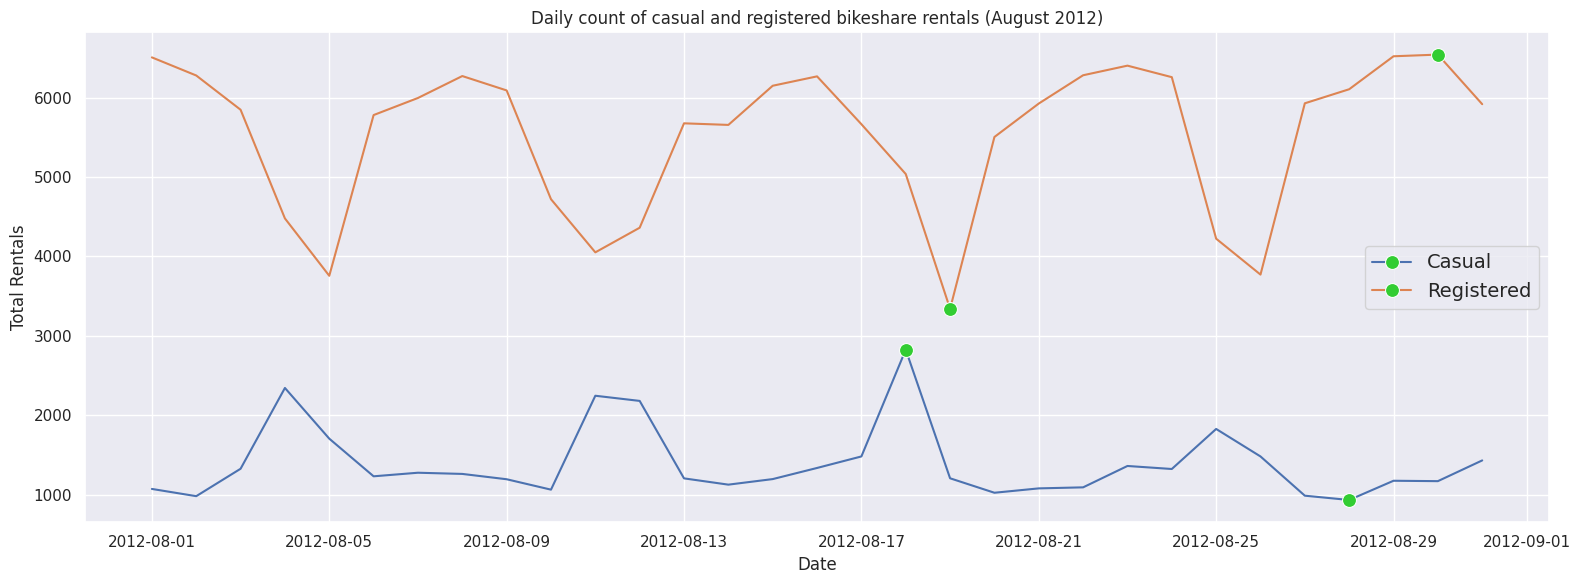

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=aug12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[17, 27])
sns.lineplot(x="dteday", y="registered", data=aug12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[18, 29] )

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily count of casual and registered bikeshare rentals (August 2012)")

# Add a legend to the plot at center right
plt.legend(loc="center right", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

Insight:

Jumlah rental terendah dengan status casual adalah 226  pada hari Sabtu, 27 Agustus 2012 (weekend) di musim summer

Jumlah rental tertinggi dengan status casual adalah 1914  pada hari Sabtu, 20 Agustus 2012 (weekend) di musim summer

Jumlah rental terendah dengan status registered adalah 889  pada hari Sabtu, 27 Agustus 2012 (weekend) summer

Jumlah rental tertinggi dengan status registered adalah 4614  pada hari Selasa, 23 Agustus 2012 (workingday) di musim akhir summer


In [ ]:
#Select data in September 2012
sept12_df = daily_df.loc[(daily_df.month == "September") & (daily_df.year == 2012)]

sept12_df

dteday      month  season  year    weekday  casual  registered  count
609 2012-09-01  September  Summer  2012   Saturday    2352        3788   6140
610 2012-09-02  September  Summer  2012     Sunday    2613        3197   5810
611 2012-09-03  September  Summer  2012     Monday    1965        4069   6034
612 2012-09-04  September  Summer  2012    Tuesday     867        5997   6864
613 2012-09-05  September  Summer  2012  Wednesday     832        6280   7112
614 2012-09-06  September  Summer  2012   Thursday     611        5592   6203
615 2012-09-07  September  Summer  2012     Friday    1045        6459   7504
616 2012-09-08  September  Summer  2012   Saturday    1557        4419   5976
617 2012-09-09  September  Summer  2012     Sunday    2570        5657   8227
618 2012-09-10  September  Summer  2012     Monday    1118        6407   7525
619 2012-09-11  September  Summer  2012    Tuesday    1070        6697   7767
620 2012-09-12  September  Summer  2012  Wednesday    1050        6820   7870
621 2012-09-13  September  Summer  2012   Thursday    1054        6750   7804
622 2012-09-14  September  Summer  2012     Friday    1379        6630   8009
623 2012-09-15  September  Summer  2012   Saturday    3160        5554   8714
624 2012-09-16  September  Summer  2012     Sunday    2166        5167   7333
625 2012-09-17  September  Summer  2012     Monday    1022        5847   6869
626 2012-09-18  September  Summer  2012    Tuesday     371        3702   4073
627 2012-09-19  September  Summer  2012  Wednesday     788        6803   7591
628 2012-09-20  September  Summer  2012   Thursday     939        6781   7720
629 2012-09-21  September  Summer  2012     Friday    1250        6917   8167
630 2012-09-22  September  Summer  2012   Saturday    2512        5883   8395
631 2012-09-23  September    Fall  2012     Sunday    2454        5453   7907
632 2012-09-24  September    Fall  2012     Monday    1001        6435   7436
633 2012-09-25  September    Fall  2012    Tuesday     845        6693   7538
634 2012-09-26  September    Fall  2012  Wednesday     787        6946   7733
635 2012-09-27  September    Fall  2012   Thursday     751        6642   7393
636 2012-09-28  September    Fall  2012     Friday    1045        6370   7415
637 2012-09-29  September    Fall  2012   Saturday    2589        5966   8555
638 2012-09-30  September    Fall  2012     Sunday    2015        4874   6889

In [ ]:
print("casual min: ", sept12_df.casual.min())
print("casual max: ", sept12_df.casual.max())

print("registered min: ", sept12_df.registered.min())
print("registered max: ", sept12_df.registered.max())

casual min:  371
casual max:  3160
registered min:  3197
registered max:  6946


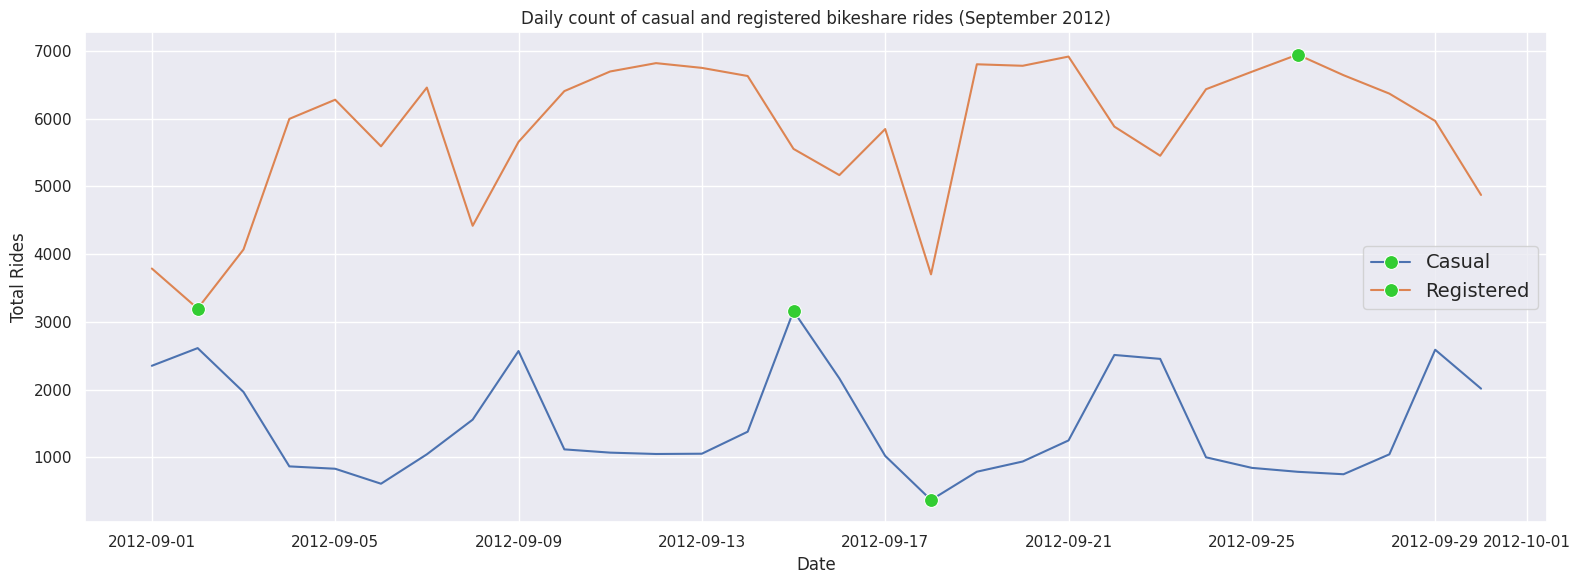

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot
sns.lineplot(x="dteday", y="casual", data=sept12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[14, 17])
sns.lineplot(x="dteday", y="registered", data=sept12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[1, 25])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Daily count of casual and registered bikeshare rides (September 2012)")

# Add a legend to the plot
plt.legend(loc='center right', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("casual min: ", sept12_df.casual.min())
print("casual max: ", sept12_df.casual.max())

print("registered min: ", sept12_df.registered.min())
print("registered max: ", sept12_df.registered.max())

casual min:  371
casual max:  3160
registered min:  3197
registered max:  6946


Insight:

The lowest number of rentals with casual status was 371 on Tuesday, September 18 2012 (working day) in the summer season

The highest number of rentals with casual status was 3160 on Saturday, September 15 2012 (weekend) in the summer season

The lowest number of rentals with registered status was 3197 on Sunday, September 2 2012 (weekend) in the summer season

The highest number of rentals with registered status was 6946 on Wednesday, September 26 2012 (working day) in the fall season

In [ ]:
#Select data in October 2012
oct12_df = daily_df.loc[(daily_df.month == "October") & (daily_df.year == 2012)]

oct12_df

dteday    month season  year    weekday  casual  registered  count
639 2012-10-01  October   Fall  2012     Monday     763        6015   6778
640 2012-10-02  October   Fall  2012    Tuesday     315        4324   4639
641 2012-10-03  October   Fall  2012  Wednesday     728        6844   7572
642 2012-10-04  October   Fall  2012   Thursday     891        6437   7328
643 2012-10-05  October   Fall  2012     Friday    1516        6640   8156
644 2012-10-06  October   Fall  2012   Saturday    3031        4934   7965
645 2012-10-07  October   Fall  2012     Sunday     781        2729   3510
646 2012-10-08  October   Fall  2012     Monday     874        4604   5478
647 2012-10-09  October   Fall  2012    Tuesday     601        5791   6392
648 2012-10-10  October   Fall  2012  Wednesday     780        6911   7691
649 2012-10-11  October   Fall  2012   Thursday     834        6736   7570
650 2012-10-12  October   Fall  2012     Friday    1060        6222   7282
651 2012-10-13  October   Fall  2012   Saturday    2252        4857   7109
652 2012-10-14  October   Fall  2012     Sunday    2080        4559   6639
653 2012-10-15  October   Fall  2012     Monday     760        5115   5875
654 2012-10-16  October   Fall  2012    Tuesday     922        6612   7534
655 2012-10-17  October   Fall  2012  Wednesday     979        6482   7461
656 2012-10-18  October   Fall  2012   Thursday    1008        6501   7509
657 2012-10-19  October   Fall  2012     Friday     753        4671   5424
658 2012-10-20  October   Fall  2012   Saturday    2806        5284   8090
659 2012-10-21  October   Fall  2012     Sunday    2132        4692   6824
660 2012-10-22  October   Fall  2012     Monday     830        6228   7058
661 2012-10-23  October   Fall  2012    Tuesday     841        6625   7466
662 2012-10-24  October   Fall  2012  Wednesday     795        6898   7693
663 2012-10-25  October   Fall  2012   Thursday     875        6484   7359
664 2012-10-26  October   Fall  2012     Friday    1182        6262   7444
665 2012-10-27  October   Fall  2012   Saturday    2643        5209   7852
666 2012-10-28  October   Fall  2012     Sunday     998        3461   4459
667 2012-10-29  October   Fall  2012     Monday       2          20     22
668 2012-10-30  October   Fall  2012    Tuesday      87        1009   1096
669 2012-10-31  October   Fall  2012  Wednesday     419        5147   5566

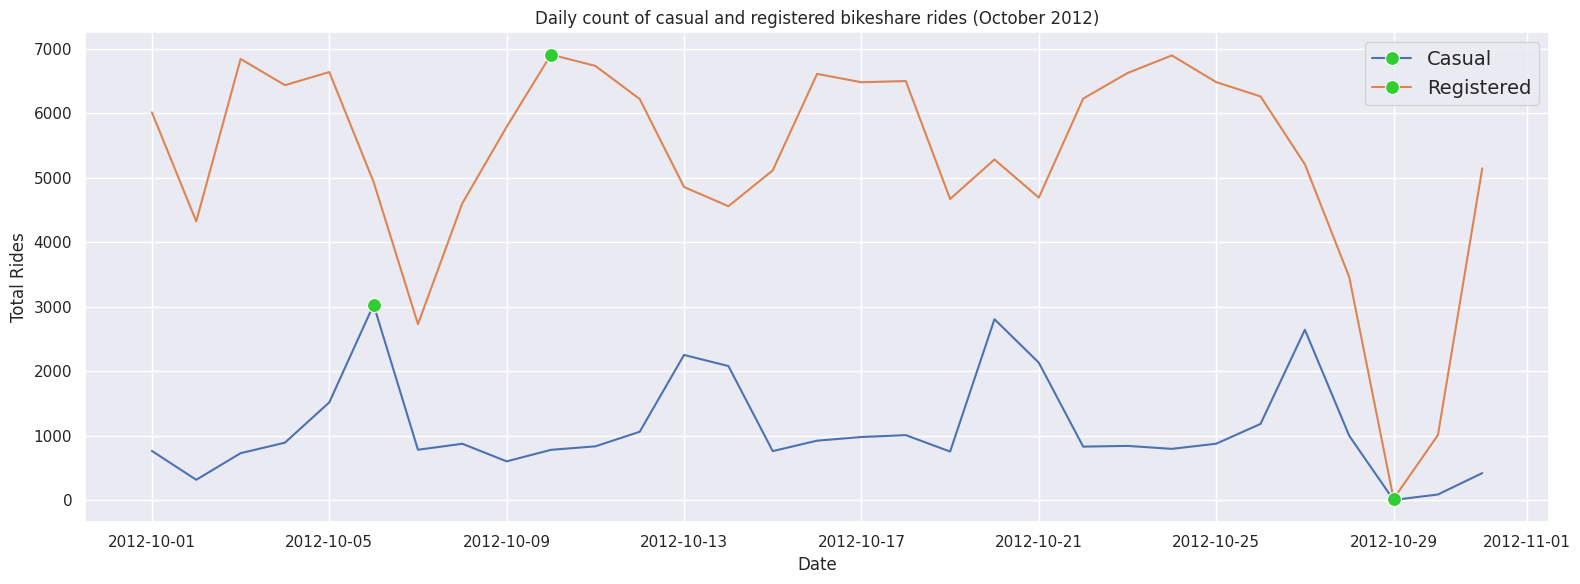

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=oct12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[5, 28])
sns.lineplot(x="dteday", y="registered", data=oct12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[9, 28])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Daily count of casual and registered bikeshare rides (October 2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("casual min: ", oct12_df.casual.min())
print("casual max: ", oct12_df.casual.max())

print("registered min: ", oct12_df.registered.min())
print("registered max: ", oct12_df.registered.max())

casual min:  2
casual max:  3031
registered min:  20
registered max:  6911


Insight:

The lowest number of rentals with casual status was 2 on Monday, October 29 2012 (working day) in the fall season

The highest number of rentals with casual status was 3031 on Saturday, October 6 2012 (weekend) in the fall season

The lowest number of rentals with registered status was 20 on Monday, October 29 2012 (working day) in the fall season

The highest number of rentals with registered status was 6911 on Wednesday, October 10 2012 (working day) in the fall season

In [ ]:
nov12_df = daily_df.loc[(daily_df.month == 'November') & (daily_df.year == 2012)]

nov12_df

dteday     month season  year    weekday  casual  registered  count
670 2012-11-01  November   Fall  2012   Thursday     466        5520   5986
671 2012-11-02  November   Fall  2012     Friday     618        5229   5847
672 2012-11-03  November   Fall  2012   Saturday    1029        4109   5138
673 2012-11-04  November   Fall  2012     Sunday    1201        3906   5107
674 2012-11-05  November   Fall  2012     Monday     378        4881   5259
675 2012-11-06  November   Fall  2012    Tuesday     466        5220   5686
676 2012-11-07  November   Fall  2012  Wednesday     326        4709   5035
677 2012-11-08  November   Fall  2012   Thursday     340        4975   5315
678 2012-11-09  November   Fall  2012     Friday     709        5283   5992
679 2012-11-10  November   Fall  2012   Saturday    2090        4446   6536
680 2012-11-11  November   Fall  2012     Sunday    2290        4562   6852
681 2012-11-12  November   Fall  2012     Monday    1097        5172   6269
682 2012-11-13  November   Fall  2012    Tuesday     327        3767   4094
683 2012-11-14  November   Fall  2012  Wednesday     373        5122   5495
684 2012-11-15  November   Fall  2012   Thursday     320        5125   5445
685 2012-11-16  November   Fall  2012     Friday     484        5214   5698
686 2012-11-17  November   Fall  2012   Saturday    1313        4316   5629
687 2012-11-18  November   Fall  2012     Sunday     922        3747   4669
688 2012-11-19  November   Fall  2012     Monday     449        5050   5499
689 2012-11-20  November   Fall  2012    Tuesday     534        5100   5634
690 2012-11-21  November   Fall  2012  Wednesday     615        4531   5146
691 2012-11-22  November   Fall  2012   Thursday     955        1470   2425
692 2012-11-23  November   Fall  2012     Friday    1603        2307   3910
693 2012-11-24  November   Fall  2012   Saturday     532        1745   2277
694 2012-11-25  November   Fall  2012     Sunday     309        2115   2424
695 2012-11-26  November   Fall  2012     Monday     337        4750   5087
696 2012-11-27  November   Fall  2012    Tuesday     123        3836   3959
697 2012-11-28  November   Fall  2012  Wednesday     198        5062   5260
698 2012-11-29  November   Fall  2012   Thursday     243        5080   5323
699 2012-11-30  November   Fall  2012     Friday     362        5306   5668

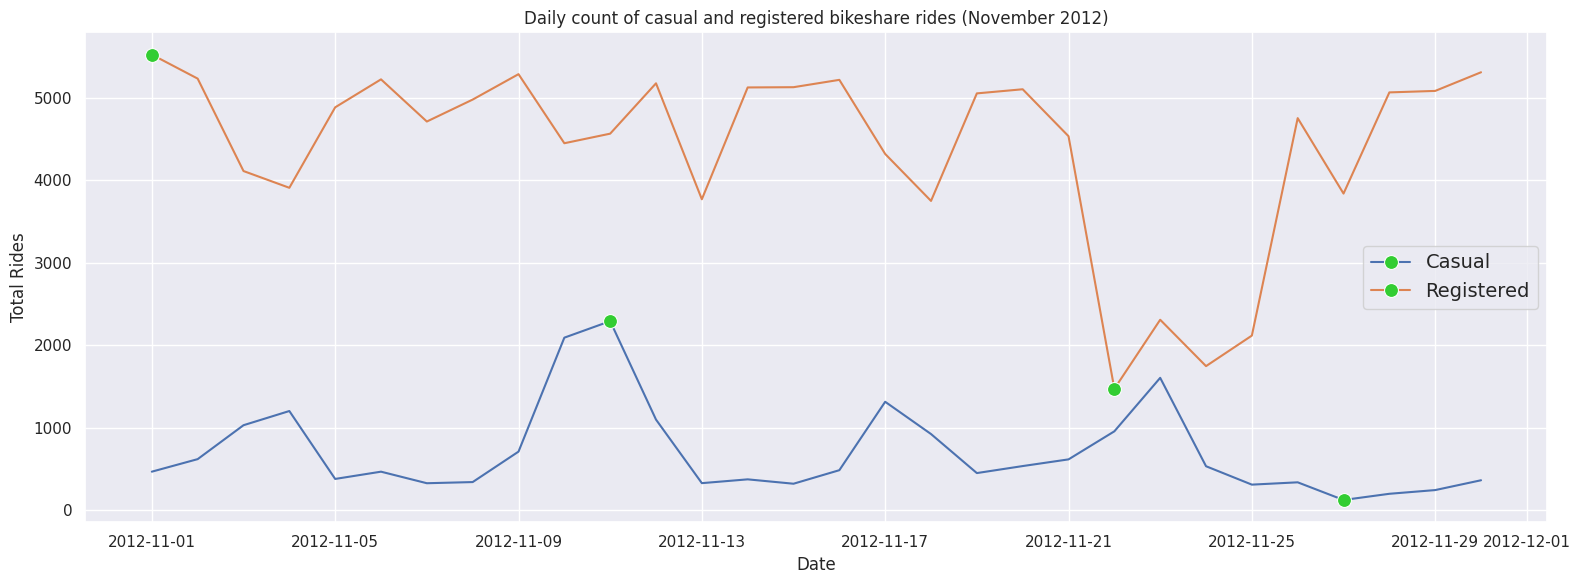

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=nov12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[10, 26])
sns.lineplot(x="dteday", y="registered", data=nov12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[0, 21])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Daily count of casual and registered bikeshare rides (November 2012)")

# Add a legend to the plot
plt.legend(loc='center right', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("casual min: ", nov12_df.casual.min())
print("casual max: ", nov12_df.casual.max())

print("registered min: ", nov12_df.registered.min())
print("registered max: ", nov12_df.registered.max())

casual min:  123
casual max:  2290
registered min:  1470
registered max:  5520


Insight:

The lowest number of rentals with casual status was 123 on Tuesday, November 27 2012 (working day) in the fall season

The highest number of rentals with casual status was 2290 on Sunday, November 11 2012 (weekend) in the fall season

The lowest number of rentals with registered status was 1470 on Thursday, November 22 2012 (working day) in the fall season

The highest number of rentals with registered status was 5520 on Thursday, November 1 2012 (working day) in the fall season

In [ ]:
dec12_df = daily_df.loc[(daily_df.month == 'December') & (daily_df.year == 2012)]

dec12_df

dteday     month  season  year    weekday  casual  registered  count
700 2012-12-01  December    Fall  2012   Saturday     951        4240   5191
701 2012-12-02  December    Fall  2012     Sunday     892        3757   4649
702 2012-12-03  December    Fall  2012     Monday     555        5679   6234
703 2012-12-04  December    Fall  2012    Tuesday     551        6055   6606
704 2012-12-05  December    Fall  2012  Wednesday     331        5398   5729
705 2012-12-06  December    Fall  2012   Thursday     340        5035   5375
706 2012-12-07  December    Fall  2012     Friday     349        4659   5008
707 2012-12-08  December    Fall  2012   Saturday    1153        4429   5582
708 2012-12-09  December    Fall  2012     Sunday     441        2787   3228
709 2012-12-10  December    Fall  2012     Monday     329        4841   5170
710 2012-12-11  December    Fall  2012    Tuesday     282        5219   5501
711 2012-12-12  December    Fall  2012  Wednesday     310        5009   5319
712 2012-12-13  December    Fall  2012   Thursday     425        5107   5532
713 2012-12-14  December    Fall  2012     Friday     429        5182   5611
714 2012-12-15  December    Fall  2012   Saturday     767        4280   5047
715 2012-12-16  December    Fall  2012     Sunday     538        3248   3786
716 2012-12-17  December    Fall  2012     Monday     212        4373   4585
717 2012-12-18  December    Fall  2012    Tuesday     433        5124   5557
718 2012-12-19  December    Fall  2012  Wednesday     333        4934   5267
719 2012-12-20  December    Fall  2012   Thursday     314        3814   4128
720 2012-12-21  December  Winter  2012     Friday     221        3402   3623
721 2012-12-22  December  Winter  2012   Saturday     205        1544   1749
722 2012-12-23  December  Winter  2012     Sunday     408        1379   1787
723 2012-12-24  December  Winter  2012     Monday     174         746    920
724 2012-12-25  December  Winter  2012    Tuesday     440         573   1013
725 2012-12-26  December  Winter  2012  Wednesday       9         432    441
726 2012-12-27  December  Winter  2012   Thursday     247        1867   2114
727 2012-12-28  December  Winter  2012     Friday     644        2451   3095
728 2012-12-29  December  Winter  2012   Saturday     159        1182   1341
729 2012-12-30  December  Winter  2012     Sunday     364        1432   1796
730 2012-12-31  December  Winter  2012     Monday     439        2290   2729

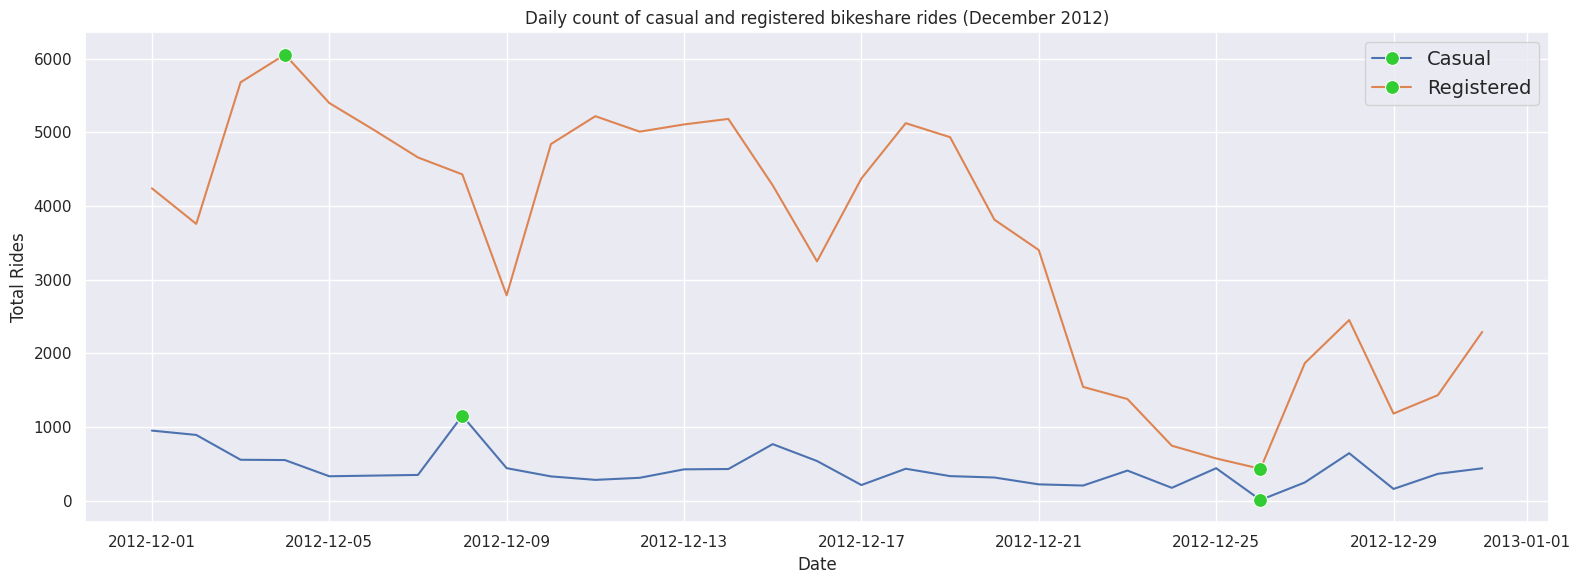

In [ ]:
plt.figure(figsize=(16,6))

# Create a line plot using the sns.lineplot() function
sns.lineplot(x="dteday", y="casual", data=dec12_df, label="Casual", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[7, 25])
sns.lineplot(x="dteday", y="registered", data=dec12_df, label="Registered", marker="o", markerfacecolor="limegreen", markersize=10, markevery=[3, 25])

# Add labels and a title to the plot
plt.xlabel("Date")
plt.ylabel("Total Rides")
plt.title("Daily count of casual and registered bikeshare rides (December 2012)")

# Add a legend to the plot
plt.legend(loc='upper right', fontsize=14)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print("casual min: ", dec12_df.casual.min())
print("casual max: ", dec12_df.casual.max())

print("registered min: ", dec12_df.registered.min())
print("registered max: ", dec12_df.registered.max())

casual min:  9
casual max:  1153
registered min:  432
registered max:  6055


Insight:

The lowest number of rentals with casual status was 123 on Tuesday, November 27 2012 (working day) in the fall season

The highest number of rentals with casual status was 2290 on Sunday, November 11 2012 (weekend) in the fall season

The lowest number of rentals with registered status was 1470 on Thursday, November 22 2012 (workingday) in the fall season

The highest number of rentals with registered status was 5520 on Thursday, November 1 2012 (workingday) in the fall season

## Conclusion

- Conclution question 1

The results of observations on number of rentals by casual per day (Monday to Sunday) show that the entire distribution is right-skewed

The result of observations on number of rentals by registered per day (Monday to Sunday) show that Monday, Tuesday, Wednesday, Thursday, and Saturday are left-skewed distribution. Meanwhile Friday and Sunday are right-skewed distribution.



- conclution question 2

**The 24 lowest points in the number of rentals with casual status observed were found to be 19 points occurring on weekdays and 5 points occurring on weekends. So the lowest number of rentals with casual status tends to occur on weekdays. After trying to carry out further observations by checking on weekends where the low numbers were apparently influenced by extreme weather, the results were obtained:**

April 16, 2011 a tornado occurred (source: https://www.weather.gov/lwx/events_20110416, https://www.weather.gov/mhx/Apr162011EventReview, https://en.wikipedia.org/wiki/Tornado_outbreak_of_April_14%E2%80%9316,_2011)

August 27, 2011 Hurricane Irene occurred (source:https://www.weather.gov/mhx/Aug272011EventReview, https://www.weather.gov/lwx/events_20110827_irene)

October 29, 2011 there was a snowstorm (source: https://www.weather.gov/lwx/20111029snow, https://www.weather.gov/media/phi/StormReports/October292011.pdf)

January 21, 2012 there was a snowstorm (source:https://www.weather.gov/phi/01212012wss, https://www.wbur.org/news/2012/01/21/boston-snow-jan)

April 22, 2012 heavy rain occured (source: https://www.dailytribune.com/2012/04/22/heavy-rain-in-east-and-april-snowflakes-for-some/)


**The 24 points with the highest number of rentals with casual status observed were 22 points occurring on weekends and 2 points occurring on working days which coincided with American independence day (4 July 2011 and 4 July 2012).**

**The 24 lowest points for the number of rentals with registered status that were observed were found to be 17 points occurring on weekends and 7 points occurring on working days. After trying to make further observations by checking working days which were low in number, it turned out to be influenced by extreme weather and holidays, the results were obtained:**

January 27, 2011 winter snow occured (source: https://www.wpc.ncep.noaa.gov/storm_summaries/event_reviews/2011/Mid-Atlantic_Northeast_WinterStorm_Jan2011.pdf, https://en.wikipedia.org/wiki/January_25%E2%80%9327,_2011_North_American_blizzard)

September 8, 2011 heavy rainfall occured (source: https://www.weather.gov/lwx/events_20110905_lee, https://storymaps.arcgis.com/stories/94bb7db898254b27a80cdb5617387d64)

November 24, 2011 is thanksgiving holiday (source: https://dpr.dc.gov/release/2011-thanksgiving-holiday-schedule)

May 14 2012 there was rain in the morning and afternoon (source: https://www.timeanddate.com/weather/usa/washington-dc/historic?month=5&year=2012)

June, 1 2012 there was thunderstorm in the afternoon until night (source: https://www.timeanddate.com/weather/usa/washington-dc/historic?month=6&year=2012)

November, 22 2012 is thanksgiving holiday (source: https://dmv.dc.gov/release/district-dmv-locations-close-thanksgiving-holiday2012, https://dpr.dc.gov/release/dpr-announces-2012-thanksgiving-holiday-schedule)

December, 26 2012 (winter holiday)

**The 24 points with the highest number of rentals with registered status observed were found to be 24 points occurring on working days.**

The record for the lowest number of rentals with casual status was 2 on Monday, October 29 2012 in the fall season

The record for the highest number of rentals with casual status was 3410 on Saturday, May 19 2012 in the spring season

The record for the lowest number of rentals with registered status was 20 on Monday, October 29 2012 in the fall season

The record for the highest number of rentals with registered status was 6946 on Wednesday 26 September 2012 in the fall season




In [ ]:
hour_df.to_csv("all_data.csv", index=False)